# Load Libraries & Dataset
## Libraries

In [204]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

import missingno

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, PowerTransformer, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, learning_curve
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error

## Dataset

In [2]:
pd.set_option("display.max_columns", None)
df_train = pd.read_csv("dataset/train.csv")
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [3]:
df_test = pd.read_csv("dataset/test.csv")
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd       None   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd       None   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   

# Pre-Processing

## Mapping Ordinal Features

In [4]:
qualCond_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'None': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'None': 0}

In [5]:
ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu', 'PoolQC']
for col in ord_col:
    df_train[col] = df_train[col].map(qualCond_map)
    df_test[col] = df_test[col].map(qualCond_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    df_train[col] = df_train[col].map(fintype_map)
    df_test[col] = df_test[col].map(fintype_map)

df_train['BsmtExposure'] = df_train['BsmtExposure'].map(expose_map)
df_test['BsmtExposure'] = df_test['BsmtExposure'].map(expose_map)
df_train['Fence'] = df_train['Fence'].map(fence_map)
df_test['Fence'] = df_test['Fence'].map(fence_map)

## Feature Engineering
### Remove Unnecessary Features

In [6]:
df_train = df_train.drop(['Id', 'Utilities', 'Street', 'PoolQC',], axis=1)
df_test = df_test.drop(['Id', 'Utilities', 'Street', 'PoolQC',], axis=1)

## Mapping Numerical & Categorical Features

In [7]:
df_train["MSSubClass"] = df_train["MSSubClass"].astype(str)
df_test["MSSubClass"] = df_test["MSSubClass"].astype(str)

In [8]:
def classify_variables(data):
    continuous_vars = []
    discrete_vars = []
    nominal_vars = []
    ordinal_vars = []

    for col in data.columns:
        if np.issubdtype(data[col].dtype, np.number):  # numerical
            if data[col].nunique() <= 12:  # heuristic: if less than 10 unique values, consider it discrete
                print(f'{col} is likely a discrete numerical variable.')
                discrete_vars.append(col)
            else:
                print(f'{col} is likely a continuous numerical variable.')
                continuous_vars.append(col)
        else:  # categorical
            if pd.api.types.is_categorical_dtype(data[col]):  # if the column type is already categorical
                if hasattr(data[col].cat, 'ordered') and data[col].cat.ordered:  # if it's an ordered category
                    print(f'{col} is likely an ordinal categorical variable.')
                    ordinal_vars.append(col)
                else:
                    print(f'{col} is likely a nominal categorical variable.')
                    nominal_vars.append(col)
            else:  # if it's object or something else
                print(f'{col} is likely a nominal categorical variable.')  # default to nominal, as we can't infer order
                nominal_vars.append(col)
                
    return continuous_vars, discrete_vars, nominal_vars, ordinal_vars

def len_variable(var, var_name):
    return f"{var_name} has {len(var)} index data"

In [9]:
continuous_vars, discrete_vars, nominal_vars, ordinal_vars = classify_variables(df_train)

ordinal_vars = ["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", 
 "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC", 
 "Fence"]

# continuous_vars.remove("Id")
continuous_vars = [i for i in continuous_vars if i not in ordinal_vars and i in df_train.columns.tolist()]
discrete_vars = [i for i in discrete_vars if i not in ordinal_vars and i in df_train.columns.tolist()]
nominal_vars = [i for i in nominal_vars if i not in ordinal_vars and i in df_train.columns.tolist()]
ordinal_vars = [i for i in ordinal_vars if i in df_train.columns.tolist()]

# discrete_vars.append(["YearBuilt", "YearRemodAdd", "GarageYrBlt"])

print("\n==============\n")
print(len_variable(continuous_vars, "Continuous Variable"))
print(len_variable(discrete_vars, "Discrete Variable"))
print(len_variable(nominal_vars, "Nominal Variable"))
print(len_variable(ordinal_vars, "Ordinal Variable"))

numeric_vars = continuous_vars + discrete_vars

MSSubClass is likely a nominal categorical variable.
MSZoning is likely a nominal categorical variable.
LotFrontage is likely a continuous numerical variable.
LotArea is likely a continuous numerical variable.
Alley is likely a nominal categorical variable.
LotShape is likely a nominal categorical variable.
LandContour is likely a nominal categorical variable.
LotConfig is likely a nominal categorical variable.
LandSlope is likely a nominal categorical variable.
Neighborhood is likely a nominal categorical variable.
Condition1 is likely a nominal categorical variable.
Condition2 is likely a nominal categorical variable.
BldgType is likely a nominal categorical variable.
HouseStyle is likely a nominal categorical variable.
OverallQual is likely a discrete numerical variable.
OverallCond is likely a discrete numerical variable.
YearBuilt is likely a continuous numerical variable.
YearRemodAdd is likely a continuous numerical variable.
RoofStyle is likely a nominal categorical variable.
R

### Combining Features

In [10]:
df_train['AgeSold'] = df_train['YrSold'] - df_train['YearBuilt']
df_train['AgeRemodSold'] = df_train['YrSold'] - df_train['YearRemodAdd']
df_train['OverallHouseScore'] = (df_train['OverallQual'] + df_train['OverallCond'])/2
df_train['GarageAge'] = df_train['YrSold'] - df_train['GarageYrBlt']
df_train['GarageAreaRatio'] = df_train['GarageArea'] / df_train["GarageCars"]
df_train['TotalLot'] = df_train['LotFrontage'] + df_train['LotArea']
df_train['TotalBsmtFin'] = df_train['BsmtFinSF1'] + df_train['BsmtFinSF2']
df_train['YrBltAndRemod']=df_train['YearBuilt']+df_train['YearRemodAdd']
df_train['TotalSF']=df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['Total_sqr_footage'] = (df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] +
                                 df_train['1stFlrSF'] + df_train['2ndFlrSF'])
df_train['Total_Bathrooms'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +
                               df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))
df_train['Total_porch_sf'] = (df_train['OpenPorchSF'] + df_train['3SsnPorch'] +
                              df_train['EnclosedPorch'] + df_train['ScreenPorch'] +
                              df_train['WoodDeckSF'])

df_train['haspool'] = df_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['has2ndfloor'] = df_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasgarage'] = df_train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasbsmt'] = df_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasfireplace'] = df_train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasmasvnr'] = df_train['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasbsmtfin'] = df_train['TotalBsmtFin'].apply(lambda x: 1 if x > 0 else 0)
df_train["hasporch"] = df_train["Total_porch_sf"].apply(lambda x: 1 if x > 0 else 0)

In [11]:
df_test['AgeSold'] = df_test['YrSold'] - df_test['YearBuilt']
df_test['AgeRemodSold'] = df_test['YrSold'] - df_test['YearRemodAdd']
df_test['OverallHouseScore'] = (df_test['OverallQual'] + df_test['OverallCond'])/2
df_test['GarageAge'] = df_test['YrSold'] - df_test['GarageYrBlt']
df_test['GarageAreaRatio'] = df_test['GarageArea'] / df_test["GarageCars"]
df_test['TotalLot'] = df_test['LotFrontage'] + df_test['LotArea']
df_test['TotalBsmtFin'] = df_test['BsmtFinSF1'] + df_test['BsmtFinSF2']
df_test['YrBltAndRemod']=df_test['YearBuilt']+df_test['YearRemodAdd']
df_test['TotalSF']=df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']
df_test['Total_sqr_footage'] = (df_test['BsmtFinSF1'] + df_test['BsmtFinSF2'] +
                                 df_test['1stFlrSF'] + df_test['2ndFlrSF'])
df_test['Total_Bathrooms'] = (df_test['FullBath'] + (0.5 * df_test['HalfBath']) +
                               df_test['BsmtFullBath'] + (0.5 * df_test['BsmtHalfBath']))
df_test['Total_porch_sf'] = (df_test['OpenPorchSF'] + df_test['3SsnPorch'] +
                              df_test['EnclosedPorch'] + df_test['ScreenPorch'] +
                              df_test['WoodDeckSF'])

df_test['haspool'] = df_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_test['has2ndfloor'] = df_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasgarage'] = df_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasbsmt'] = df_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasfireplace'] = df_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasmasvnr'] = df_test['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasbsmtfin'] = df_test['TotalBsmtFin'].apply(lambda x: 1 if x > 0 else 0)
df_test["hasporch"] = df_test["Total_porch_sf"].apply(lambda x: 1 if x > 0 else 0)

### Remove Features that mostly contain only 1 value

In [12]:
# categorical
cat_col = df_train.select_dtypes(include=['object']).columns
overfit_cat = []
for i in cat_col:
    counts = df_train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(df_train) * 100 > 96:
        overfit_cat.append(i)

overfit_cat = list(overfit_cat)
df_train = df_train.drop(overfit_cat, axis=1)
df_test = df_test.drop(overfit_cat, axis=1)

# numerical
num_col = df_train.select_dtypes(exclude=['object']).columns
overfit_num = []
for i in num_col:
    counts = df_train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(df_train) * 100 > 96:
        overfit_num.append(i)

overfit_num = list(overfit_num)
df_train = df_train.drop(overfit_num, axis=1)
df_test = df_test.drop(overfit_num, axis=1)

## Transform Target Feature into Log

In [13]:
# log(1+x) transform
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

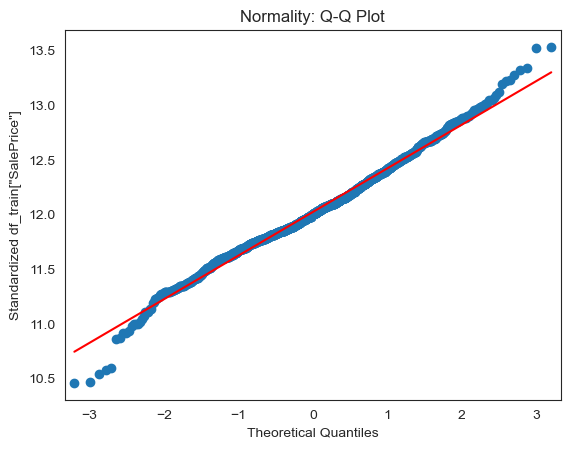

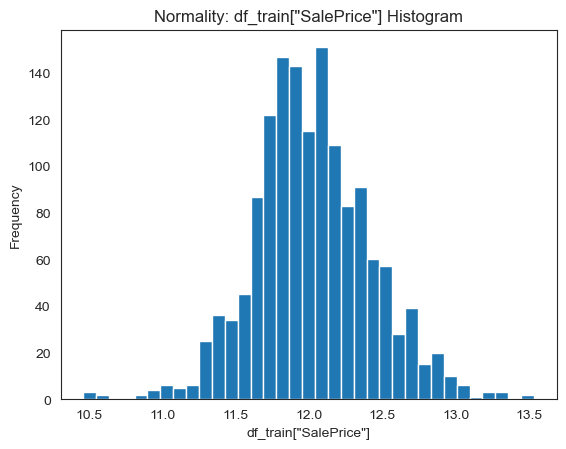

Shapiro-Wilk Test:
Test Statistic: 0.9912075400352478
p-value: 1.1504476304935451e-07
The df_train["SalePrice"] do not appear to be normally distributed (reject H0)


In [14]:
sm.qqplot(df_train["SalePrice"], line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized df_train["SalePrice"]')
plt.title('Normality: Q-Q Plot')
plt.show()

plt.hist(df_train["SalePrice"], bins='auto')
plt.xlabel('df_train["SalePrice"]')
plt.ylabel('Frequency')
plt.title('Normality: df_train["SalePrice"] Histogram')
plt.show()

# Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(df_train["SalePrice"])
print('Shapiro-Wilk Test:')
print('Test Statistic:', stat)
print('p-value:', p_value)

alpha = 0.05
if p_value > alpha:
    print('The df_train["SalePrice"] appear to be normally distributed (fail to reject H0)')
else:
    print('The df_train["SalePrice"] do not appear to be normally distributed (reject H0)')

## Splitting Data

We split train data into train and validation sets

In [15]:
df_train_X = df_train.drop(["SalePrice"], axis=1)
df_train_y = df_train["SalePrice"]

# Split the df into training and validation sets
X_train_val, X_val, y_train_val, y_val = train_test_split(df_train_X, df_train_y, test_size=0.3, random_state=42)

In [16]:
numeric_vars = [i for i in numeric_vars if i in df_train_X.columns.tolist()]
nominal_vars = [i for i in nominal_vars if i in df_train_X.columns.tolist()]
ordinal_vars = [i for i in ordinal_vars if i in df_train_X.columns.tolist()]

# Helper Function

## Pipeline
### Fill Missing Values

In [17]:
# fill missing values in numerical features
for col in numeric_vars:
    if col not in ["YearRemodAdd", "GarageYrBlt", "YrSold"]:
        median_num_features = X_train_val.groupby(["Neighborhood", "BldgType"])[col].median()
        X_train_val.loc[:, col] = X_train_val.apply(
            lambda row: median_num_features.loc[row["Neighborhood"], row["BldgType"]]
                         if pd.isnull(row[col])
                         else row[col],
            axis=1
        )
    else:
        #Fill GarageYrBlt column
        X_train_val.loc[:, col] = np.where(
            X_train_val[col] != 0,
            X_train_val["GarageYrBlt"].fillna(X_train_val["YearBuilt"]),
            0
        )

# fill missing values in nominal features
for col in nominal_vars:
    if col not in ['Alley', 'Utilities', 'PoolQC', 'MiscFeature']:
        mode_col = X_train_val.groupby("Neighborhood")[col].apply(lambda x: x.mode()[0])
        X_train_val.loc[:, col] = X_train_val.apply(
            lambda row: mode_col.loc[row["Neighborhood"]]
                         if pd.isnull(row[col])
                         else row[col],
            axis=1
        )
    else:
        X_train_val.loc[:, col] = X_train_val[col].fillna("None")

# fill missing values in ordinal features

# X_train_val[ordinal_vars] = X_train_val[ordinal_vars].fillna(0)
# X_val[ordinal_vars] = X_val[ordinal_vars].fillna(0)

C:\Users\fahmi\AppData\Local\Temp\ipykernel_2052\1510324511.py:13: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\fahmi\AppData\Local\Temp\ipykernel_2052\1510324511.py:13: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [18]:
# fill missing values in numerical features
for col in numeric_vars:
    if col not in ["YearRemodAdd", "GarageYrBlt", "YrSold"]:
        median_num_features = X_val.groupby(["Neighborhood", "BldgType"])[col].median()
        X_val.loc[:, col] = X_val.apply(
            lambda row: median_num_features.loc[row["Neighborhood"], row["BldgType"]]
                         if pd.isnull(row[col])
                         else row[col],
            axis=1
        )
    else:
        #Fill GarageYrBlt column
        X_val.loc[:, col] = np.where(
            X_val[col] != 0,
            X_val["GarageYrBlt"].fillna(X_val["YearBuilt"]),
            0
        )

# fill missing values in nominal features
for col in nominal_vars:
    if col not in ['Alley', 'Utilities', 'PoolQC', 'MiscFeature']:
        mode_col = X_val.groupby("Neighborhood")[col].apply(lambda x: x.mode()[0])
        X_val.loc[:, col] = X_val.apply(
            lambda row: mode_col.loc[row["Neighborhood"]]
                         if pd.isnull(row[col])
                         else row[col],
            axis=1
        )
    else:
        X_val.loc[:, col] = X_val[col].fillna("None")

C:\Users\fahmi\AppData\Local\Temp\ipykernel_2052\2616927637.py:13: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\fahmi\AppData\Local\Temp\ipykernel_2052\2616927637.py:13: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



### Create Pipeline Function

In [19]:
def create_pipeline(numeric_vars, nominal_vars, ordinal_vars, use_transformer=False, transformer_method='yeo-johnson',
                    use_scaler=False, scaler_method='robust', include_pca=False, pca_n_components=None,
                    model_name="linreg", model=LinearRegression()):
    """
    Create a customizable scikit-learn pipeline.

    Parameters:
    - numeric_vars (list): A list of column names for numerical variables.
    - nominal_vars (list): A list of column names for nominal variables.
    - ordinal_vars (list): A list of column names for ordinal variables.
    - use_transformer (bool): Whether to use a transformer (e.g., PowerTransformer) in the pipeline.
    - transformer_method (str): The method to use for the transformer if use_transformer is True.
    - use_scaler (bool): Whether to use a scaler (e.g., StandardScaler) in the pipeline.
    - scaler_method (str): The method to use for the scaler if use_scaler is True.
    - include_pca (bool): Whether to include PCA (Principal Component Analysis) in the pipeline.
    - pca_n_components (int): The number of components to keep in PCA if include_pca is True.
    - model (object): The machine learning model to use as the final estimator in the pipeline.
                      Default is LinearRegression().

    Returns:
    - pipeline (Pipeline): The scikit-learn pipeline.
    """

    # Nominal Features
    nom_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with most frequent
        ('label', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    # Ordinal Features
    
    ord_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0))
    ])
    
    # Num Features
    num_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with median
#         ('boxcox', PowerTransformer(method='yeo-johnson', standardize=False)),
#         ('scaler', RobustScaler())
    ])
    
    # Define the scaler based on the specified method
    if scaler_method == 'z-score':
        scaler = StandardScaler()
    elif scaler_method == 'robust':
        scaler = RobustScaler()
    elif scaler_method == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid scaler method specified. Choose 'standard', 'robust', or 'minmax'.")

    # Define the transformer based on the specified method
    if transformer_method == 'yeo-johnson':
        transformer = PowerTransformer(method='yeo-johnson')
    elif transformer_method == 'log':
        transformer = FunctionTransformer(np.log1p)
    elif transformer_method == 'box-cox':
        transformer = PowerTransformer(method='box-cox')
    else:
        raise ValueError("Invalid transformer method specified. Choose 'yeo-johnson', 'log', or 'box-cox'.")

    # Define the PCA transformer if included
    if include_pca:
        pca = PCA(n_components=pca_n_components)
    else:
        pca = None
        
    if use_transformer:
        num_transformer.steps.insert(1, (transformer_method, transformer))
        
    if use_scaler:
        num_transformer.steps.insert(2, (scaler_method, scaler))
        
    if include_pca:
        num_transformer.steps.insert(3, ('pca', pca))
    
    # Combine the pre-processing steps into one using ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
        ('nom', nom_transformer, nominal_vars),
        ('ord', ord_transformer, ordinal_vars),
        ('num', num_transformer, numeric_vars)
    ])

    # Define the pipeline that includes the preprocessor and the estimator
    pipe_linreg = Pipeline(steps=[
        ('preprocessor', preprocessor),
        (model_name, model)
    ])
    
    return pipe_linreg


## Evaluation Metric
### Log Version

In [20]:
def evaluate_model_log(predictions, actual_values):
#     actual_values = np.expm1(actual_values) 
#     predictions = np.expm1(predictions)
    
    actual_values_non_negative = np.clip(actual_values, 0, None)
    predictions_non_negative = np.clip(predictions, 0, None)
    
    mae = mean_absolute_error(actual_values, predictions)
    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual_values, predictions)
    rmsle = np.sqrt(mean_squared_log_error(actual_values_non_negative, predictions_non_negative))
    mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100
    
    return mae, mse, rmse, r2, rmsle, mape

### Original Version

In [21]:
def evaluate_model(predictions, actual_values):
    actual_values = np.expm1(actual_values) 
    predictions = np.expm1(predictions)
    
    actual_values_non_negative = np.clip(actual_values, 0, None)
    predictions_non_negative = np.clip(predictions, 0, None)
    
    mae = mean_absolute_error(actual_values, predictions)
    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual_values, predictions)
    rmsle = np.sqrt(mean_squared_log_error(actual_values_non_negative, predictions_non_negative))
    mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100
    
    return mae, mse, rmse, r2, rmsle, mape

## Residual Plot

In [22]:
def check_normality(residuals):
    sm.qqplot(residuals, line='s')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Standardized Residuals')
    plt.title('Normality: Q-Q Plot')
    plt.show()

    plt.hist(residuals, bins='auto')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Normality: Residuals Histogram')
    plt.show()

    # Shapiro-Wilk test for normality
    stat, p_value = stats.shapiro(residuals)
    print('Shapiro-Wilk Test:')
    print('Test Statistic:', stat)
    print('p-value:', p_value)
    
    alpha = 0.05
    if p_value > alpha:
        print('The residuals appear to be normally distributed (fail to reject H0)')
    else:
        print('The residuals do not appear to be normally distributed (reject H0)')


def residual_plot(y_true, y_pred, r2_train=None, r2_test=None):
    residuals = y_true - y_pred
    g = sns.jointplot(x=y_pred, y=residuals, kind='resid', height=6)
    g.set_axis_labels('Predicted Values', 'Residuals')
    g.fig.suptitle('Residual Plot', y=1.02)

    if r2_train is not None and r2_test is not None:
        legend_text = ['R2 Train: {:.2f}'.format(r2_train), 'R2 Test: {:.2f}'.format(r2_test)]
        g.ax_joint.legend(legend_text, markerscale=0, handlelength=0)

    plt.show()
    
    check_normality(residuals)


## Learning Curve Plot

In [23]:
def plot_learning_curve(estimator, X, y, cv, scoring):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-Validation Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


# Build Regression Model

- Linear Regression
- Lasso Regression
- Kernel Ridge
- Elastic Net
- KNN Regressor
- SVR
- Gradient Boosting Regressor
- Extra Trees Regressor
- XGBOOST
- LightGBM
- Stacking Regressor
- Blending Regressor 
- Weight Regressor
- Voting Regressor

In [24]:
evaluation_metrics_models = []
evaluation_metrics_log_models = []

## Linear Regression Model
### With Transformer

In [25]:
#define ML models
linreg_tf = LinearRegression(n_jobs=-1)

#define the pipeline that includes the preprocessor and the estimator
pipe_linreg_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model=LinearRegression())

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_linreg_tf, X_train_val, y_train_val, cv=kf, scoring='r2')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



RMSE: 7150577409.18 +/- 7635636755.48


In [26]:
evaluation_metrics = {}

pipe_linreg_tf.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
linreg_tf_pred = pipe_linreg_tf.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_linreg_tf = pipe_linreg_tf.score(X_train_val, y_train_val)

# Compute the evaluation metrics
mae_linreg_tf, mse_linreg_tf, rmse_linreg_tf, r2_linreg_tf, rmsle_linreg_tf, mape_linreg_tf = evaluate_model(linreg_tf_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "linreg_tf"
evaluation_metrics['MAE'] = f'{mae_linreg_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_linreg_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_linreg_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_linreg_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_linreg_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_linreg_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_linreg_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\AppData\Local\Temp\ipykernel_2052\958664168.py:3: RuntimeWarning:

overflow encountered in expm1



ValueError: Input contains infinity or a value too large for dtype('float64').

In [27]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_linreg_tf, mse_linreg_tf, rmse_linreg_tf, r2_linreg_tf, rmsle_linreg_tf, mape_linreg_tf = evaluate_model_log(linreg_tf_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "linreg_tf"
evaluation_metrics_log['MAE'] = f'{mae_linreg_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_linreg_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_linreg_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_linreg_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_linreg_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_linreg_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_linreg_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: linreg_tf
MAE: 55866114.461174
MSE: 352369809976990336.000000
RMSE: 593607454.448637
R2_train: 0.930484
R2: -2077114021186789376.000000
RMSLE: 1.787867
MAPE: 471556347.781795


In [28]:
# residual_plot(y_val, predictions, r2_train=r2_train_linreg_tf, r2_test=r2_linreg_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

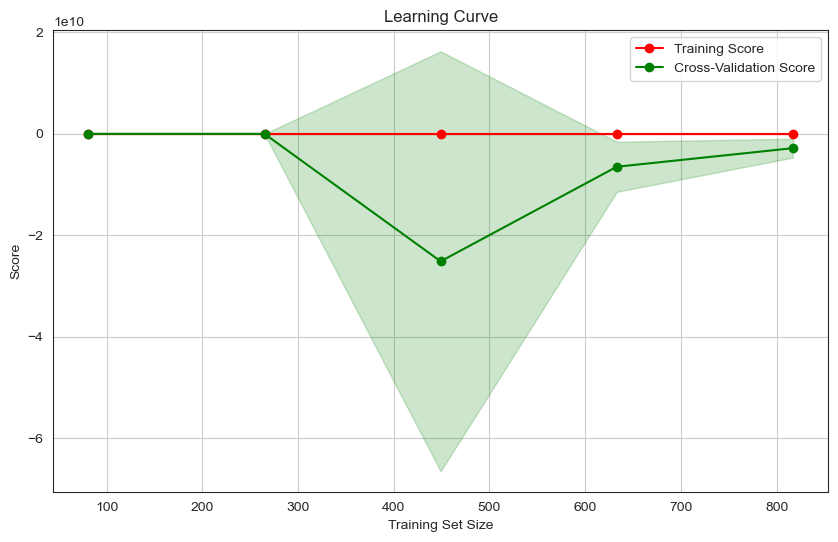

In [29]:
plot_learning_curve(pipe_linreg_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [30]:
#define ML models
linreg_ts = LinearRegression(n_jobs=-1)

#define the pipeline that includes the preprocessor and the estimator
pipe_linreg_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model=LinearRegression())

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_linreg_ts, X_train_val, y_train_val, cv=kf, scoring='r2')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



RMSE: 3641665372.31 +/- 4148515080.27


In [31]:
evaluation_metrics = {}

pipe_linreg_ts.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
linreg_ts_pred = pipe_linreg_ts.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_linreg_ts = pipe_linreg_ts.score(X_train_val, y_train_val)

# Compute the evaluation metrics
mae_linreg_ts, mse_linreg_ts, rmse_linreg_ts, r2_linreg_ts, rmsle_linreg_ts, mape_linreg_ts = evaluate_model(linreg_ts_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "linreg_ts"
evaluation_metrics['MAE'] = f'{mae_linreg_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_linreg_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_linreg_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_linreg_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_linreg_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_linreg_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_linreg_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\AppData\Local\Temp\ipykernel_2052\958664168.py:3: RuntimeWarning:

overflow encountered in expm1



ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_linreg_ts, mse_linreg_ts, rmse_linreg_ts, r2_linreg_ts, rmsle_linreg_ts, mape_linreg_ts = evaluate_model_log(linreg_ts_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "linreg_ts"
evaluation_metrics_log['MAE'] = f'{mae_linreg_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_linreg_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_linreg_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_linreg_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_linreg_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_linreg_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_linreg_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

In [ ]:
# residual_plot(y_val, predictions, r2_train=r2_train_linreg_ts, r2_test=r2_linreg_ts)

In [ ]:
plot_learning_curve(pipe_linreg_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [32]:
#define ML models
linreg_ts_pca = LinearRegression(n_jobs=-1)

#define the pipeline that includes the preprocessor and the estimator
pipe_linreg_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model=LinearRegression())

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_linreg_ts_pca, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



RMSE: 0.15 +/- 0.01


In [33]:
evaluation_metrics = {}

pipe_linreg_ts_pca.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
linreg_ts_pca_pred = pipe_linreg_ts_pca.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_linreg_ts_pca = pipe_linreg_ts_pca.score(X_train_val, y_train_val)

# Compute the evaluation metrics
mae_linreg_ts_pca, mse_linreg_ts_pca, rmse_linreg_ts_pca, r2_linreg_ts_pca, rmsle_linreg_ts_pca, mape_linreg_ts_pca = evaluate_model(linreg_ts_pca_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "linreg_ts_pca"
evaluation_metrics['MAE'] = f'{mae_linreg_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_linreg_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_linreg_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_linreg_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_linreg_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_linreg_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_linreg_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: linreg_ts_pca
MAE: 18570.775689
MSE: 881126733.911360
RMSE: 29683.778970
R2_train: 0.919179
R2: 0.873730
RMSLE: 0.143331
MAPE: 10.637767


In [34]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_linreg_ts_pca, mse_linreg_ts_pca, rmse_linreg_ts_pca, r2_linreg_ts_pca, rmsle_linreg_ts_pca, mape_linreg_ts_pca = evaluate_model_log(linreg_ts_pca_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "linreg_ts_pca"
evaluation_metrics_log['MAE'] = f'{mae_linreg_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_linreg_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_linreg_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_linreg_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_linreg_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_linreg_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_linreg_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: linreg_ts_pca
MAE: 0.104428
MSE: 0.020544
RMSE: 0.143331
R2_train: 0.919179
R2: 0.878901
RMSLE: 0.011138
MAPE: 0.874261


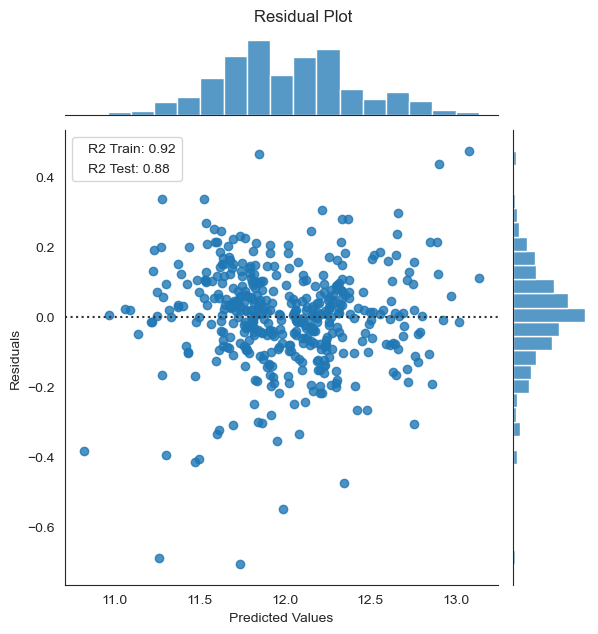

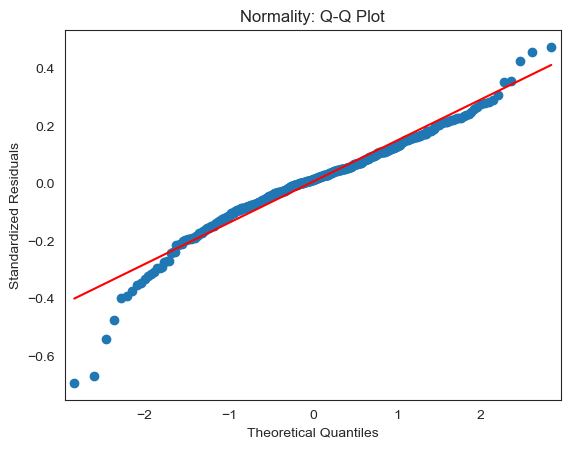

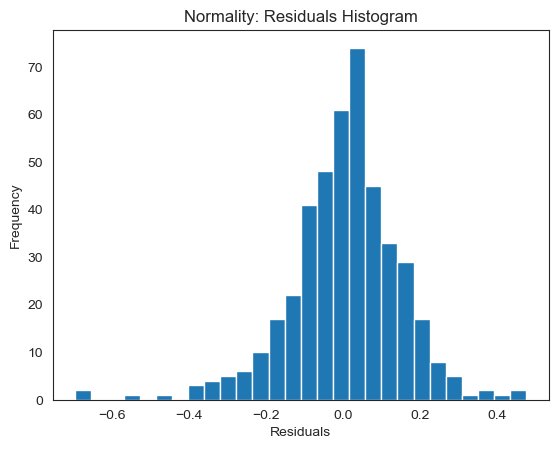

Shapiro-Wilk Test:
Test Statistic: 0.95943284034729
p-value: 1.2593065479293841e-09
The residuals do not appear to be normally distributed (reject H0)


In [35]:
residual_plot(y_val, linreg_ts_pca_pred, r2_train=r2_train_linreg_ts_pca, r2_test=r2_linreg_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

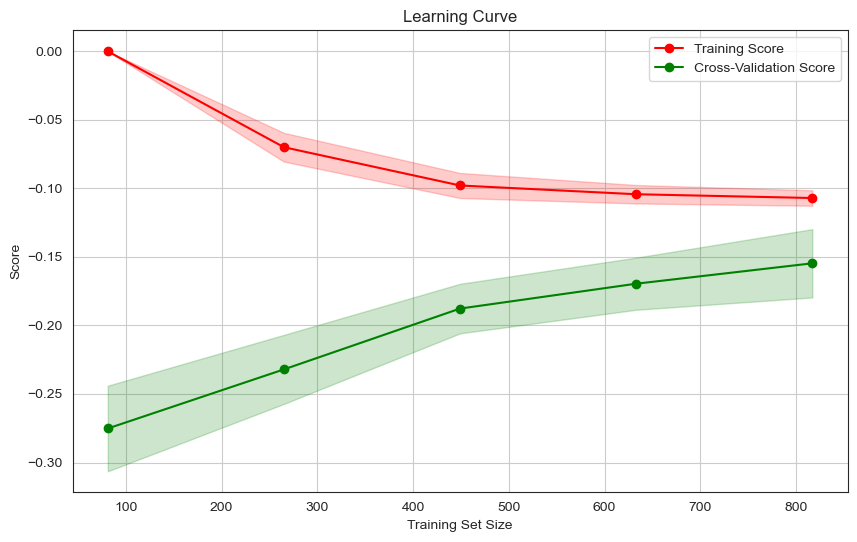

In [36]:
plot_learning_curve(pipe_linreg_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Lasso Regression
### With Transformer

In [41]:
#define ML models
lasso = Lasso(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_lasso_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lasso", model=lasso)

# Define the hyperparameters to search over
param_grid_lasso = {
        'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    }

# Perform grid search with 5-fold cross-validation
grid_search_lasso_tf = GridSearchCV(pipe_lasso_tf, param_grid_lasso, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_lasso_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'GrLivArea',
                                                                          'GarageYrBlt',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('lasso', Lasso(tol=0.01))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2', verbose=1)

In [42]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lasso_tf = round(grid_search_lasso_tf.cv_results_["std_test_score"][grid_search_lasso_tf.best_index_], 4)
print("Best hyperparameters: ", grid_search_lasso_tf.best_params_)
print("Best score: ", grid_search_lasso_tf.best_score_, f" ({std_lasso_tf})")

# valuate model on validation data
r2_train_lasso_tf = grid_search_lasso_tf.score(X_val, y_val)

best_model_lasso_tf = grid_search_lasso_tf.best_estimator_
y_pred_val_lasso_tf = best_model_lasso_tf.predict(X_val)

# Compute the evaluation metrics
mae_lasso_tf, mse_lasso_tf, rmse_lasso_tf, r2_lasso_tf, rmsle_lasso_tf, mape_lasso_tf = evaluate_model(y_pred_val_lasso_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lasso_tf"
evaluation_metrics['best_params_'] = grid_search_lasso_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_lasso_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_lasso_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lasso_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lasso_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_lasso_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lasso_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lasso_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lasso__alpha': 0.001}
Best score:  0.869642860257678  (0.072)
model: lasso_tf
best_params_: {'lasso__alpha': 0.001}
MAE: 15004.902130
MSE: 653398927.332075
RMSE: 25561.669103
R2_train: 0.909595
R2: 0.906364
RMSLE: 0.123841
MAPE: 8.697935


In [43]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_lasso_tf, mse_lasso_tf, rmse_lasso_tf, r2_lasso_tf, rmsle_lasso_tf, mape_lasso_tf = evaluate_model_log(y_pred_val_lasso_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "lasso_tf"
evaluation_metrics_log['best_params_'] = grid_search_lasso_tf.best_params_
evaluation_metrics_log['MAE'] = f'{mae_lasso_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_lasso_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_lasso_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_lasso_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_lasso_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_lasso_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_lasso_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: lasso_tf
best_params_: {'lasso__alpha': 0.001}
MAE: 0.084062
MSE: 0.015337
RMSE: 0.123841
R2_train: 0.909595
R2: 0.909595
RMSLE: 0.009719
MAPE: 0.705882


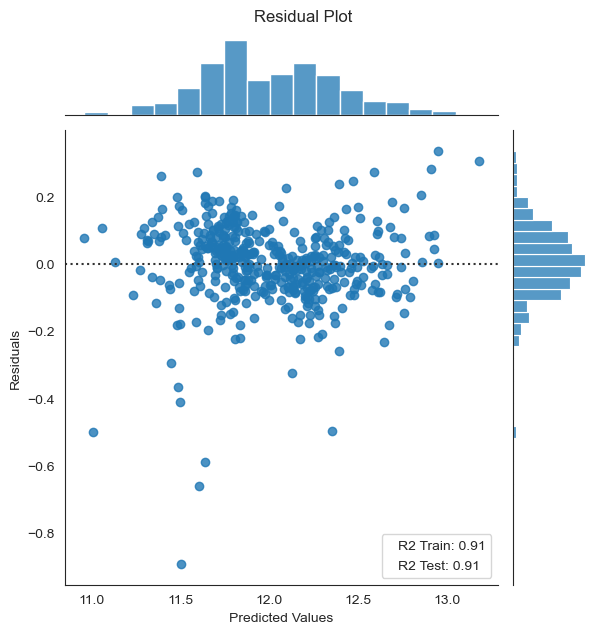

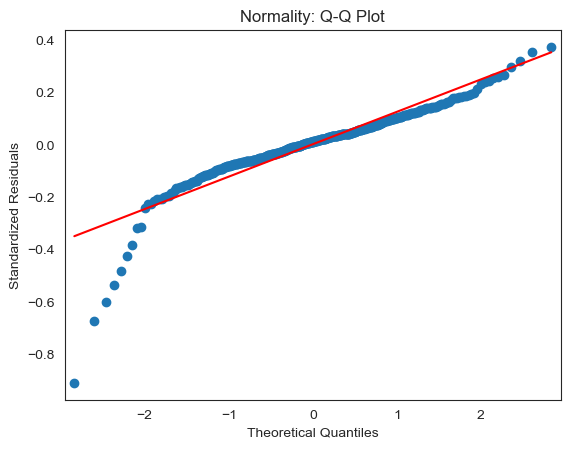

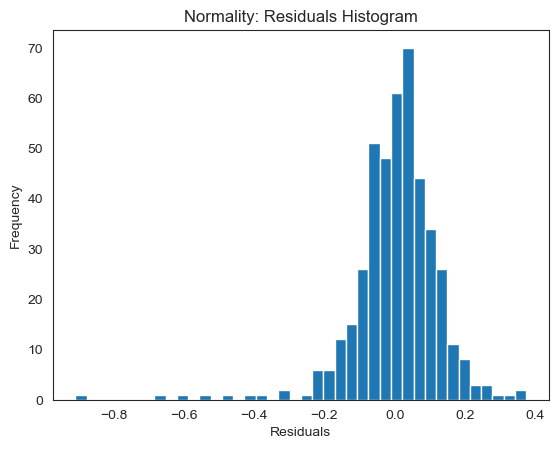

Shapiro-Wilk Test:
Test Statistic: 0.8761119246482849
p-value: 3.1256808223390797e-18
The residuals do not appear to be normally distributed (reject H0)


In [44]:
residual_plot(y_val, y_pred_val_lasso_tf, r2_train=r2_train_lasso_tf, r2_test=r2_lasso_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

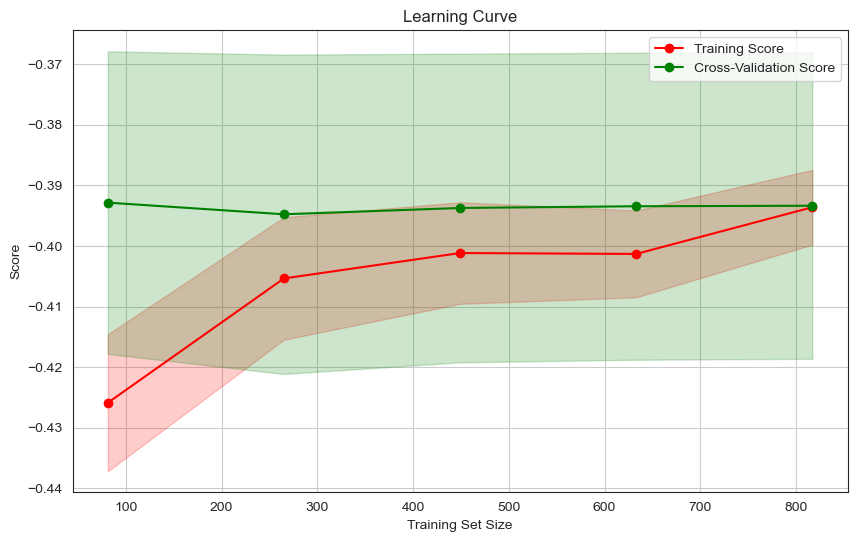

In [45]:
plot_learning_curve(pipe_lasso_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [46]:
#define ML models
lasso = Lasso(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_lasso_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lasso", model=lasso)

# Define the hyperparameters to search over
param_grid_lasso = {
        'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    }

# Perform grid search with 5-fold cross-validation
grid_search_lasso_ts = GridSearchCV(pipe_lasso_ts, param_grid_lasso, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_lasso_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'GrLivArea',
                                                                          'GarageYrBlt',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('lasso', Lasso(tol=0.01))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2', verbose=1)

In [47]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lasso_ts = round(grid_search_lasso_ts.cv_results_["std_test_score"][grid_search_lasso_ts.best_index_], 4)
print("Best hyperparameters: ", grid_search_lasso_ts.best_params_)
print("Best score: ", grid_search_lasso_ts.best_score_, f" ({std_lasso_ts})")

# valuate model on validation data
r2_train_lasso_ts = grid_search_lasso_ts.score(X_val, y_val)

best_model_lasso_ts = grid_search_lasso_ts.best_estimator_
y_pred_val_lasso_ts = best_model_lasso_ts.predict(X_val)

# Compute the evaluation metrics
mae_lasso_ts, mse_lasso_ts, rmse_lasso_ts, r2_lasso_ts, rmsle_lasso_ts, mape_lasso_ts = evaluate_model(y_pred_val_lasso_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lasso_ts"
evaluation_metrics['best_params_'] = grid_search_lasso_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_lasso_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_lasso_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lasso_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lasso_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_lasso_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lasso_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lasso_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lasso__alpha': 0.001}
Best score:  0.8693986832924029  (0.0719)
model: lasso_ts
best_params_: {'lasso__alpha': 0.001}
MAE: 14964.418464
MSE: 653654184.301026
RMSE: 25566.661579
R2_train: 0.908908
R2: 0.906328
RMSLE: 0.124311
MAPE: 8.682107


In [48]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_lasso_ts, mse_lasso_ts, rmse_lasso_ts, r2_lasso_ts, rmsle_lasso_ts, mape_lasso_ts = evaluate_model_log(y_pred_val_lasso_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "lasso_ts"
evaluation_metrics_log['best_params_'] = grid_search_lasso_ts.best_params_
evaluation_metrics_log['MAE'] = f'{mae_lasso_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_lasso_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_lasso_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_lasso_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_lasso_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_lasso_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_lasso_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: lasso_ts
best_params_: {'lasso__alpha': 0.001}
MAE: 0.083823
MSE: 0.015453
RMSE: 0.124311
R2_train: 0.908908
R2: 0.908908
RMSLE: 0.009760
MAPE: 0.703959


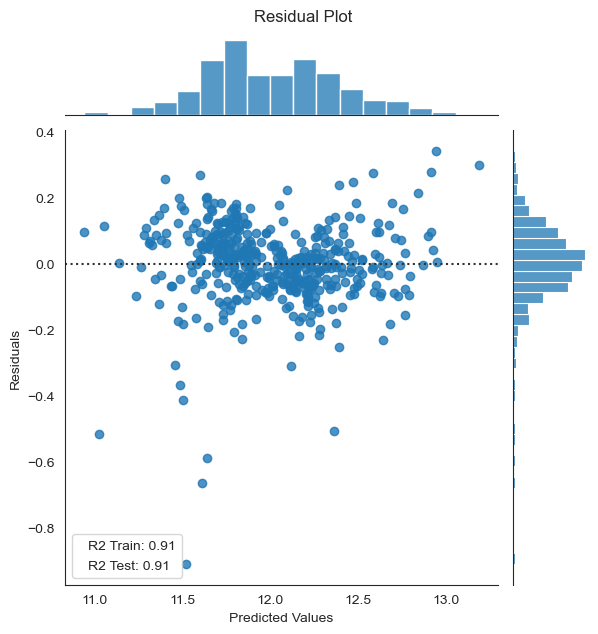

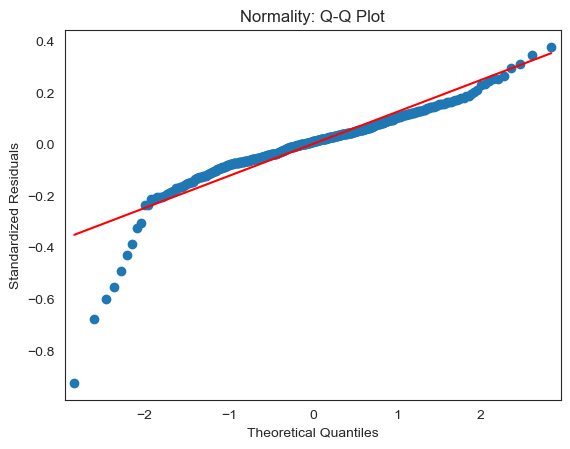

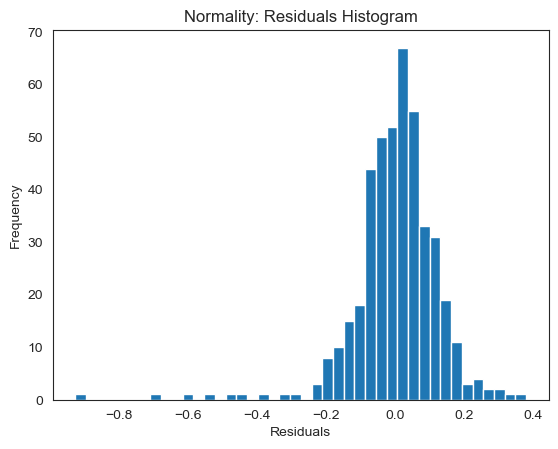

Shapiro-Wilk Test:
Test Statistic: 0.87160724401474
p-value: 1.4771410875890194e-18
The residuals do not appear to be normally distributed (reject H0)


In [49]:
residual_plot(y_val, y_pred_val_lasso_ts, r2_train=r2_train_lasso_ts, r2_test=r2_lasso_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

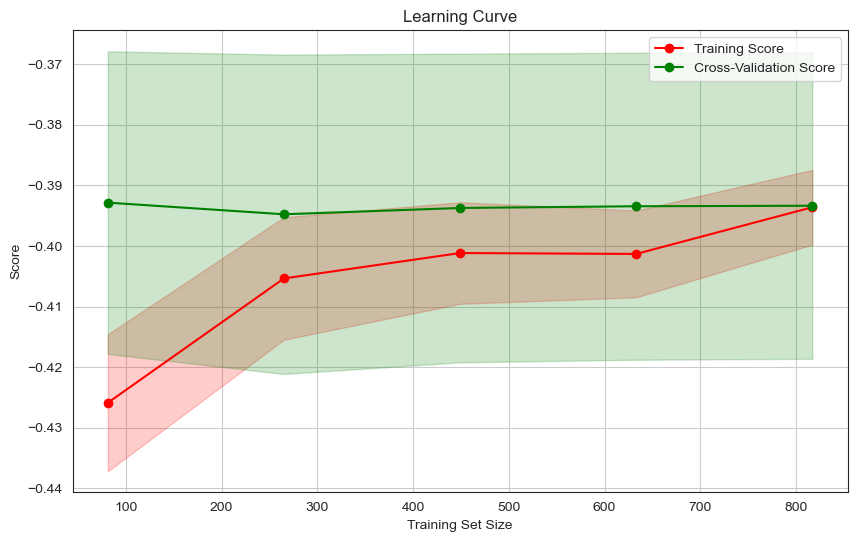

In [50]:
plot_learning_curve(pipe_lasso_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [51]:
#define ML models
lasso = Lasso(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_lasso_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="lasso", model=lasso)

# Define the hyperparameters to search over
param_grid_lasso = {
        'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    }

# Perform grid search with 5-fold cross-validation
grid_search_lasso_ts_pca = GridSearchCV(pipe_lasso_ts_pca, param_grid_lasso, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_lasso_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'GrLivArea',
                                                                          'GarageYrBlt',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('lasso', Lasso(tol=0.01))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2', verbose=1)

In [52]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lasso_ts_pca = round(grid_search_lasso_ts_pca.cv_results_["std_test_score"][grid_search_lasso_ts_pca.best_index_], 4)
print("Best hyperparameters: ", grid_search_lasso_ts_pca.best_params_)
print("Best score: ", grid_search_lasso_ts_pca.best_score_, f" ({std_lasso_ts_pca})")

# valuate model on validation data
r2_train_lasso_ts_pca = grid_search_lasso_ts_pca.score(X_val, y_val)

best_model_lasso_ts_pca = grid_search_lasso_ts_pca.best_estimator_
y_pred_val_lasso_ts_pca = best_model_lasso_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_lasso_ts_pca, mse_lasso_ts_pca, rmse_lasso_ts_pca, r2_lasso_ts_pca, rmsle_lasso_ts_pca, mape_lasso_ts_pca = evaluate_model(y_pred_val_lasso_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lasso_ts_pca"
evaluation_metrics['best_params_'] = grid_search_lasso_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_lasso_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_lasso_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lasso_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lasso_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_lasso_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lasso_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lasso_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lasso__alpha': 0.001}
Best score:  0.8657258733302047  (0.0519)
model: lasso_ts_pca
best_params_: {'lasso__alpha': 0.001}
MAE: 17477.135453
MSE: 828355903.292463
RMSE: 28781.172723
R2_train: 0.886016
R2: 0.881292
RMSLE: 0.139056
MAPE: 10.040552


In [53]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_lasso_ts_pca, mse_lasso_ts_pca, rmse_lasso_ts_pca, r2_lasso_ts_pca, rmsle_lasso_ts_pca, mape_lasso_ts_pca = evaluate_model_log(y_pred_val_lasso_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "lasso_ts_pca"
evaluation_metrics_log['best_params_'] = grid_search_lasso_ts_pca.best_params_
evaluation_metrics_log['MAE'] = f'{mae_lasso_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_lasso_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_lasso_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_lasso_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_lasso_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_lasso_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_lasso_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: lasso_ts_pca
best_params_: {'lasso__alpha': 0.001}
MAE: 0.097470
MSE: 0.019337
RMSE: 0.139056
R2_train: 0.886016
R2: 0.886016
RMSLE: 0.010886
MAPE: 0.817367


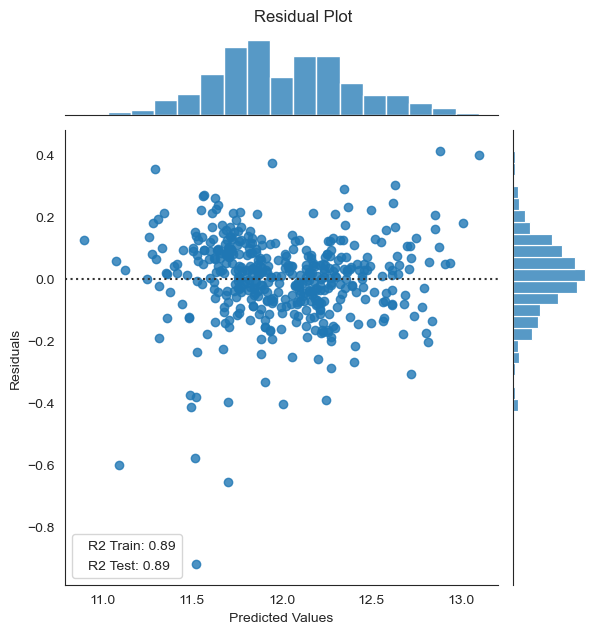

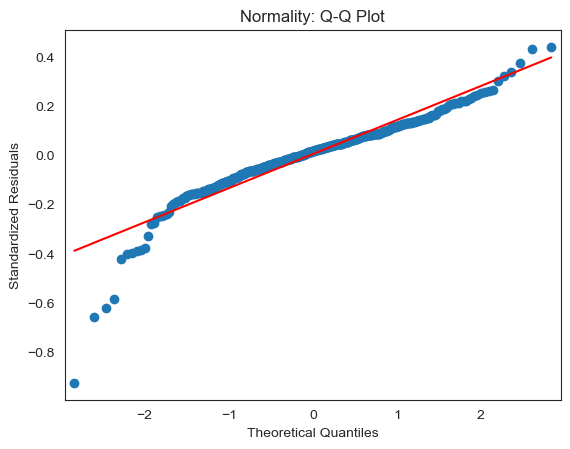

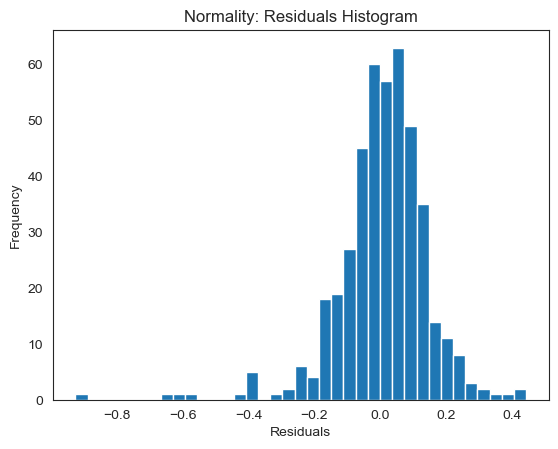

Shapiro-Wilk Test:
Test Statistic: 0.9091238975524902
p-value: 1.5425574288705792e-15
The residuals do not appear to be normally distributed (reject H0)


In [54]:
residual_plot(y_val, y_pred_val_lasso_ts_pca, r2_train=r2_train_lasso_ts_pca, r2_test=r2_lasso_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

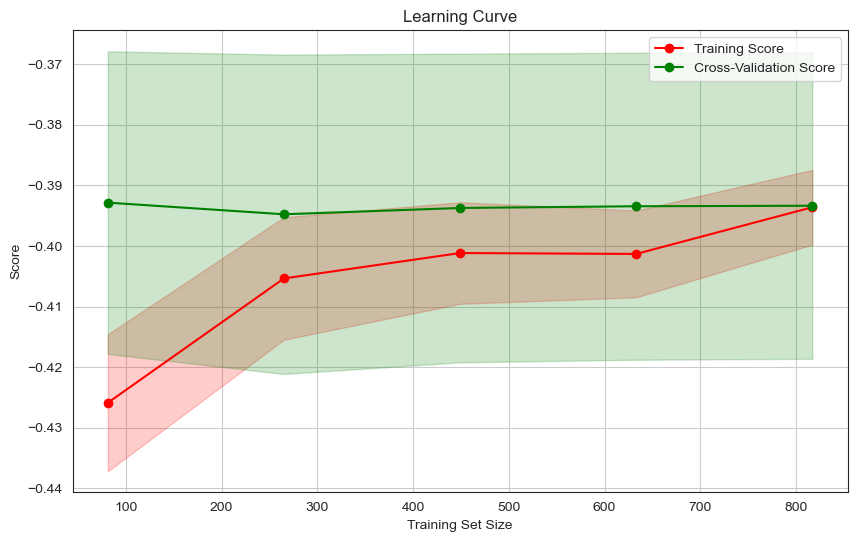

In [55]:
plot_learning_curve(pipe_lasso_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Ridge Regression
### With Transformer

In [56]:
#define ML models
krr = KernelRidge()

#define the pipeline that includes the preprocessor and the estimator
pipe_krr_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="krr", model=krr)

# Define the hyperparameters to search over
param_grid_krr = {
        'krr__alpha': [0.1, 1, 10, 100],
        'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'krr__degree': [1, 2, 3, 4],
        'krr__gamma': [0.1, 1, 10, 100]
    }

# Perform grid search with 5-fold cross-validation
grid_search_krr_tf = GridSearchCV(pipe_krr_tf, param_grid_krr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_krr_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('krr', KernelRidge())]),
             n_jobs=-1,
             param_grid={'krr__alpha': [0.1, 1, 10, 100],
                         'krr__degree': [1, 2, 3, 4],
                         'krr__gamma': [0.1, 1, 10, 100],
                         'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=1)

In [57]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_krr_tf = round(grid_search_krr_tf.cv_results_["std_test_score"][grid_search_krr_tf.best_index_], 4)
print("Best hyperparameters: ", grid_search_krr_tf.best_params_)
print("Best score: ", grid_search_krr_tf.best_score_, f" ({std_krr_tf})")

# valuate model on validation data
r2_train_krr_tf = grid_search_krr_tf.score(X_val, y_val)

best_model_krr_tf = grid_search_krr_tf.best_estimator_
y_pred_val_krr_tf = best_model_krr_tf.predict(X_val)

# Compute the evaluation metrics
mae_krr_tf, mse_krr_tf, rmse_krr_tf, r2_krr_tf, rmsle_krr_tf, mape_krr_tf = evaluate_model(y_pred_val_krr_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "krr_tf"
evaluation_metrics['best_params_'] = grid_search_krr_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_krr_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_krr_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_krr_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_krr_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_krr_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_krr_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_krr_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
Best score:  0.8480442859638728  (0.0708)
model: krr_tf
best_params_: {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
MAE: 15979.113893
MSE: 674705810.673268
RMSE: 25975.099820
R2_train: 0.907669
R2: 0.903311
RMSLE: 0.125154
MAPE: 9.119008


In [58]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_krr_tf, mse_krr_tf, rmse_krr_tf, r2_krr_tf, rmsle_krr_tf, mape_krr_tf = evaluate_model_log(y_pred_val_krr_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "krr_tf"
evaluation_metrics_log['best_params_'] = grid_search_krr_tf.best_params_
evaluation_metrics_log['MAE'] = f'{mae_krr_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_krr_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_krr_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_krr_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_krr_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_krr_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_krr_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: krr_tf
best_params_: {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
MAE: 0.089127
MSE: 0.015663
RMSE: 0.125154
R2_train: 0.907669
R2: 0.907669
RMSLE: 0.009759
MAPE: 0.746809


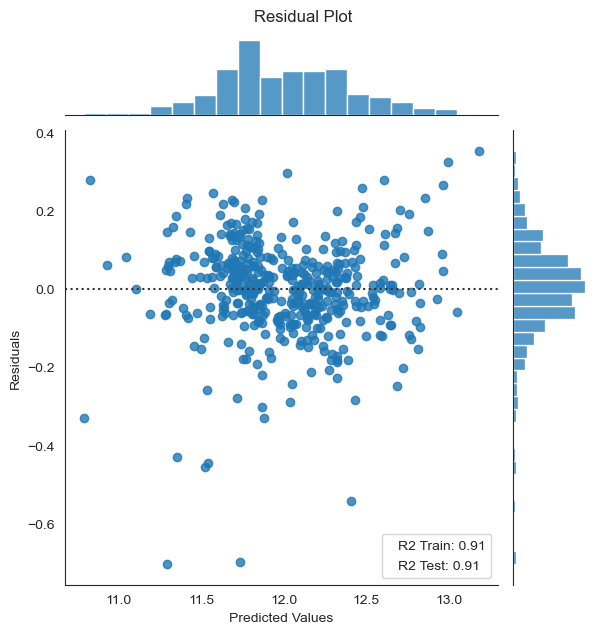

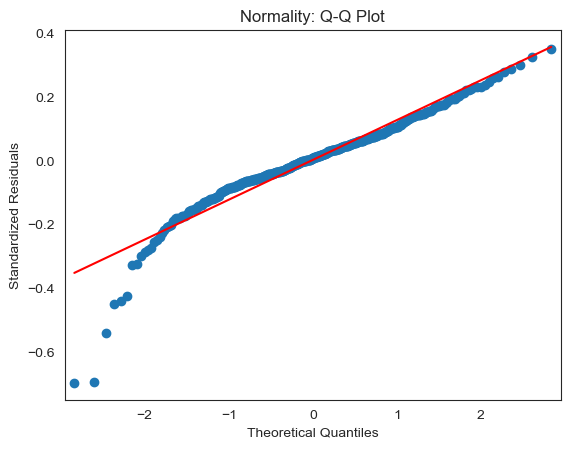

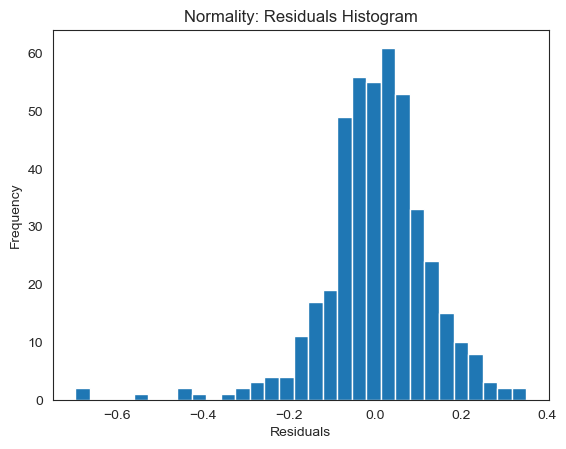

Shapiro-Wilk Test:
Test Statistic: 0.9290590286254883
p-value: 1.4858504238188935e-13
The residuals do not appear to be normally distributed (reject H0)


In [59]:
residual_plot(y_val, y_pred_val_krr_tf, r2_train=r2_train_krr_tf, r2_test=r2_krr_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

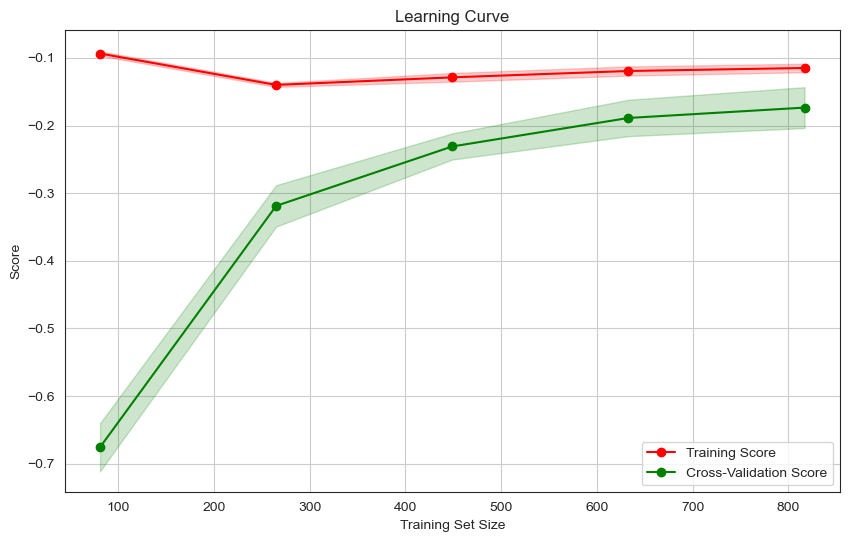

In [60]:
plot_learning_curve(pipe_krr_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [61]:
#define ML models
krr = KernelRidge()

#define the pipeline that includes the preprocessor and the estimator
pipe_krr_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="krr", model=krr)

# Define the hyperparameters to search over
param_grid_krr = {
        'krr__alpha': [0.1, 1, 10, 100],
        'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'krr__degree': [1, 2, 3, 4],
        'krr__gamma': [0.1, 1, 10, 100]
    }

# Perform grid search with 5-fold cross-validation
grid_search_krr_ts = GridSearchCV(pipe_krr_ts, param_grid_krr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_krr_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('krr', KernelRidge())]),
             n_jobs=-1,
             param_grid={'krr__alpha': [0.1, 1, 10, 100],
                         'krr__degree': [1, 2, 3, 4],
                         'krr__gamma': [0.1, 1, 10, 100],
                         'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=1)

In [62]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_krr_ts = round(grid_search_krr_ts.cv_results_["std_test_score"][grid_search_krr_ts.best_index_], 4)
print("Best hyperparameters: ", grid_search_krr_ts.best_params_)
print("Best score: ", grid_search_krr_ts.best_score_, f" ({std_krr_ts})")

# valuate model on validation data
r2_train_krr_ts = grid_search_krr_ts.score(X_val, y_val)

best_model_krr_ts = grid_search_krr_ts.best_estimator_
y_pred_val_krr_ts = best_model_krr_ts.predict(X_val)

# Compute the evaluation metrics
mae_krr_ts, mse_krr_ts, rmse_krr_ts, r2_krr_ts, rmsle_krr_ts, mape_krr_ts = evaluate_model(y_pred_val_krr_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "krr_ts"
evaluation_metrics['best_params_'] = grid_search_krr_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_krr_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_krr_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_krr_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_krr_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_krr_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_krr_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_krr_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
Best score:  0.8462081151792921  (0.0729)
model: krr_ts
best_params_: {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
MAE: 15958.894849
MSE: 665218509.676338
RMSE: 25791.830289
R2_train: 0.908133
R2: 0.904670
RMSLE: 0.124838
MAPE: 9.115562


In [63]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_krr_ts, mse_krr_ts, rmse_krr_ts, r2_krr_ts, rmsle_krr_ts, mape_krr_ts = evaluate_model_log(y_pred_val_krr_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "krr_ts"
evaluation_metrics_log['best_params_'] = grid_search_krr_ts.best_params_
evaluation_metrics_log['MAE'] = f'{mae_krr_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_krr_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_krr_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_krr_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_krr_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_krr_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_krr_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: krr_ts
best_params_: {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
MAE: 0.089074
MSE: 0.015585
RMSE: 0.124838
R2_train: 0.908133
R2: 0.908133
RMSLE: 0.009738
MAPE: 0.746382


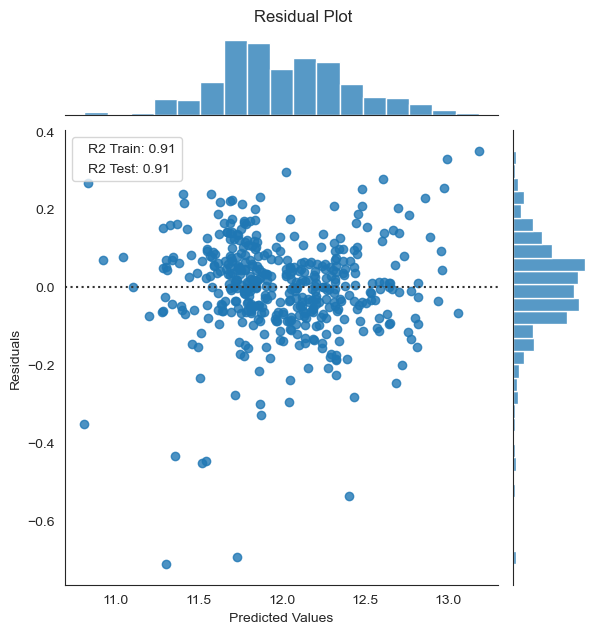

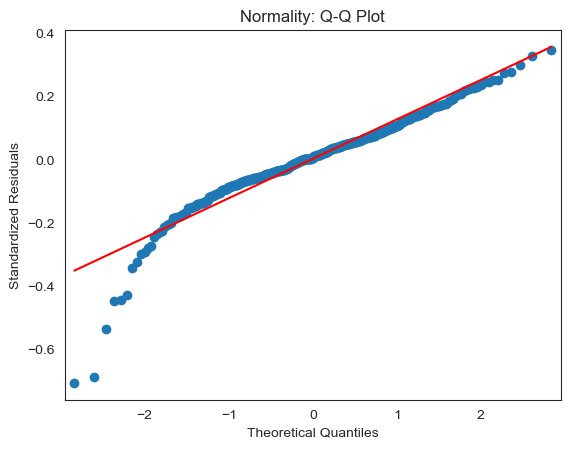

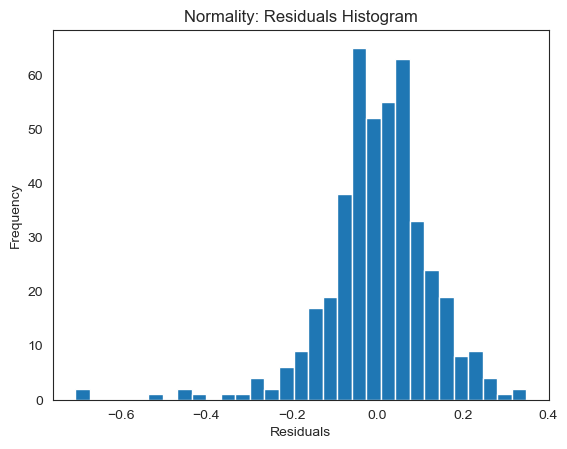

Shapiro-Wilk Test:
Test Statistic: 0.927761435508728
p-value: 1.076102775681223e-13
The residuals do not appear to be normally distributed (reject H0)


In [64]:
residual_plot(y_val, y_pred_val_krr_ts, r2_train=r2_train_krr_ts, r2_test=r2_krr_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

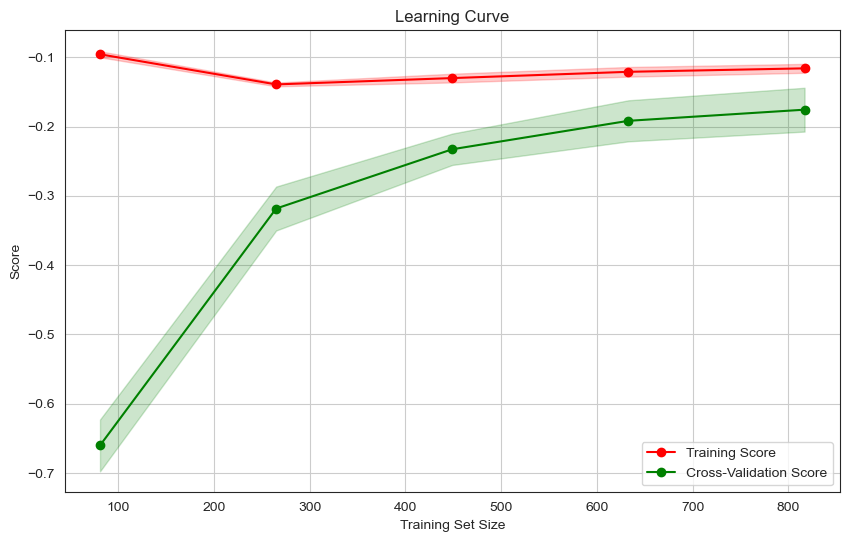

In [65]:
plot_learning_curve(pipe_krr_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [66]:
#define ML models
krr = KernelRidge()

#define the pipeline that includes the preprocessor and the estimator
pipe_krr_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="krr", model=krr)

# Define the hyperparameters to search over
param_grid_krr = {
        'krr__alpha': [0.1, 1, 10, 100],
        'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'krr__degree': [1, 2, 3, 4],
        'krr__gamma': [0.1, 1, 10, 100]
    }

# Perform grid search with 5-fold cross-validation
grid_search_krr_ts_pca = GridSearchCV(pipe_krr_ts_pca, param_grid_krr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_krr_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('krr', KernelRidge())]),
             n_jobs=-1,
             param_grid={'krr__alpha': [0.1, 1, 10, 100],
                         'krr__degree': [1, 2, 3, 4],
                         'krr__gamma': [0.1, 1, 10, 100],
                         'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=1)

In [67]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_krr_ts_pca = round(grid_search_krr_ts_pca.cv_results_["std_test_score"][grid_search_krr_ts_pca.best_index_], 4)
print("Best hyperparameters: ", grid_search_krr_ts_pca.best_params_)
print("Best score: ", grid_search_krr_ts_pca.best_score_, f" ({std_krr_ts_pca})")

# valuate model on validation data
r2_train_krr_ts_pca = grid_search_krr_ts_pca.score(X_val, y_val)

best_model_krr_ts_pca = grid_search_krr_ts_pca.best_estimator_
y_pred_val_krr_ts_pca = best_model_krr_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_krr_ts_pca, mse_krr_ts_pca, rmse_krr_ts_pca, r2_krr_ts_pca, rmsle_krr_ts_pca, mape_krr_ts_pca = evaluate_model(y_pred_val_krr_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "krr_ts_pca"
evaluation_metrics['best_params_'] = grid_search_krr_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_krr_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_krr_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_krr_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_krr_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_krr_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_krr_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_krr_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
Best score:  0.8459313848888446  (0.0499)
model: krr_ts_pca
best_params_: {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
MAE: 18004.397594
MSE: 829283124.865033
RMSE: 28797.276345
R2_train: 0.886385
R2: 0.881159
RMSLE: 0.138831
MAPE: 10.316520


In [68]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_krr_ts_pca, mse_krr_ts_pca, rmse_krr_ts_pca, r2_krr_ts_pca, rmsle_krr_ts_pca, mape_krr_ts_pca = evaluate_model_log(y_pred_val_krr_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "krr_ts_pca"
evaluation_metrics_log['best_params_'] = grid_search_krr_ts_pca.best_params_
evaluation_metrics_log['MAE'] = f'{mae_krr_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_krr_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_krr_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_krr_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_krr_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_krr_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_krr_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: krr_ts_pca
best_params_: {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
MAE: 0.101309
MSE: 0.019274
RMSE: 0.138831
R2_train: 0.886385
R2: 0.886385
RMSLE: 0.010806
MAPE: 0.848557


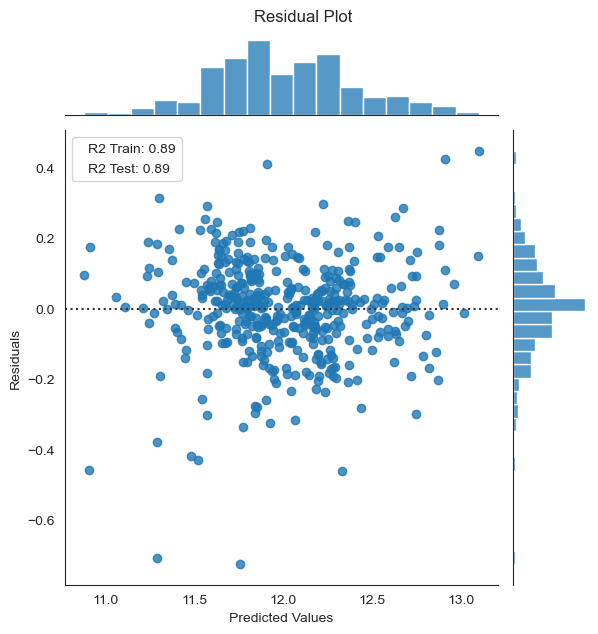

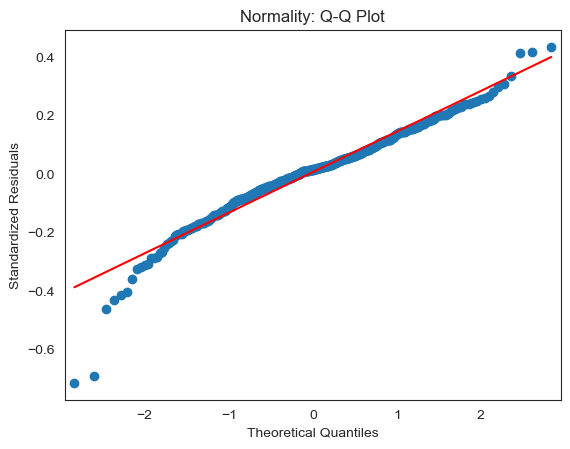

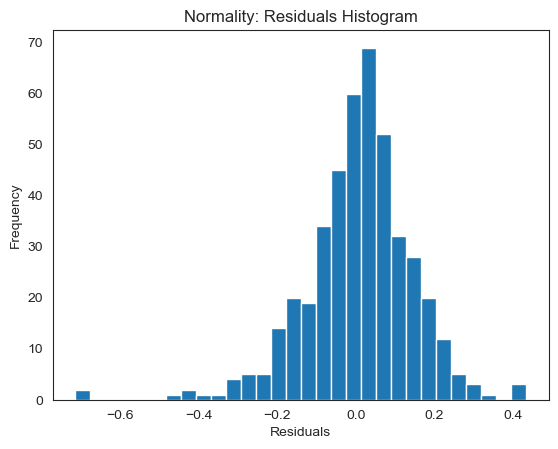

Shapiro-Wilk Test:
Test Statistic: 0.958010733127594
p-value: 7.583852434933647e-10
The residuals do not appear to be normally distributed (reject H0)


In [69]:
residual_plot(y_val, y_pred_val_krr_ts_pca, r2_train=r2_train_krr_ts_pca, r2_test=r2_krr_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

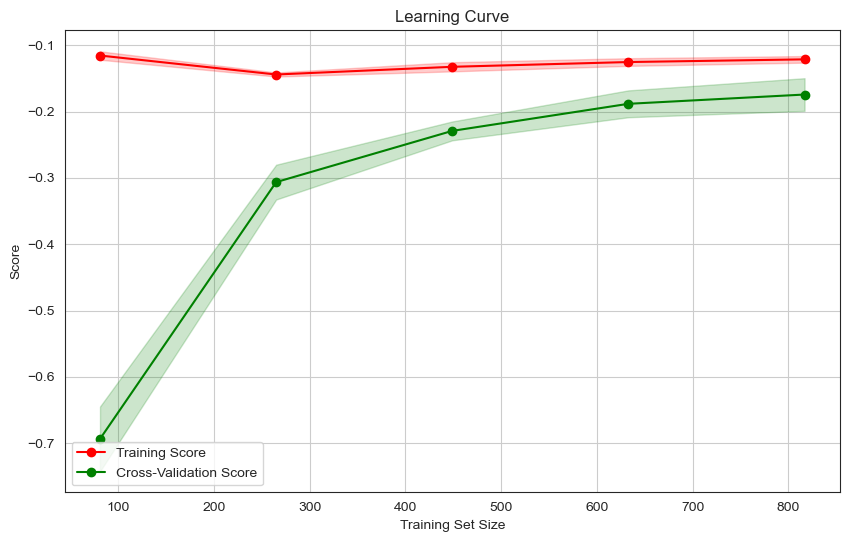

In [70]:
plot_learning_curve(pipe_krr_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Elastic Net
### With Transformer

In [71]:
#define ML models
enet = ElasticNet(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_enet_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="enet", model=enet)

# Define the hyperparameters to search over
param_grid_enet = {'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                  'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]}

# Perform grid search with 5-fold cross-validation
grid_search_enet_tf = GridSearchCV(pipe_enet_tf, param_grid_enet, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_enet_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('enet', ElasticNet(tol=0.01))]),
             n_jobs=-1,
             param_grid={'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]},
             scoring='r2', verbose=1)

In [72]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_enet_tf = round(grid_search_enet_tf.cv_results_["std_test_score"][grid_search_enet_tf.best_index_], 4)
print("Best hyperparameters: ", grid_search_enet_tf.best_params_)
print("Best score: ", grid_search_enet_tf.best_score_, f" ({std_enet_tf})")

# valuate model on validation data
r2_train_enet_tf = grid_search_enet_tf.score(X_val, y_val)

best_model_enet_tf = grid_search_enet_tf.best_estimator_
y_pred_val_enet_tf = best_model_enet_tf.predict(X_val)

# Compute the evaluation metrics
mae_enet_tf, mse_enet_tf, rmse_enet_tf, r2_enet_tf, rmsle_enet_tf, mape_enet_tf = evaluate_model(y_pred_val_enet_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "enet_tf"
evaluation_metrics['best_params_'] = grid_search_enet_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_enet_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_enet_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_enet_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_enet_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_enet_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_enet_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_enet_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'enet__alpha': 0.01, 'enet__l1_ratio': 0.1}
Best score:  0.8696717453462732  (0.0711)
model: enet_tf
best_params_: {'enet__alpha': 0.01, 'enet__l1_ratio': 0.1}
MAE: 15355.301729
MSE: 673307889.285778
RMSE: 25948.176993
R2_train: 0.908541
R2: 0.903511
RMSLE: 0.124561
MAPE: 8.828868


In [73]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_enet_tf, mse_enet_tf, rmse_enet_tf, r2_enet_tf, rmsle_enet_tf, mape_enet_tf = evaluate_model_log(y_pred_val_enet_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "enet_tf"
evaluation_metrics_log['best_params_'] = grid_search_enet_tf.best_params_
evaluation_metrics_log['MAE'] = f'{mae_enet_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_enet_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_enet_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_enet_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_enet_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_enet_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_enet_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: enet_tf
best_params_: {'enet__alpha': 0.01, 'enet__l1_ratio': 0.1}
MAE: 0.085524
MSE: 0.015515
RMSE: 0.124561
R2_train: 0.908541
R2: 0.908541
RMSLE: 0.009768
MAPE: 0.717658


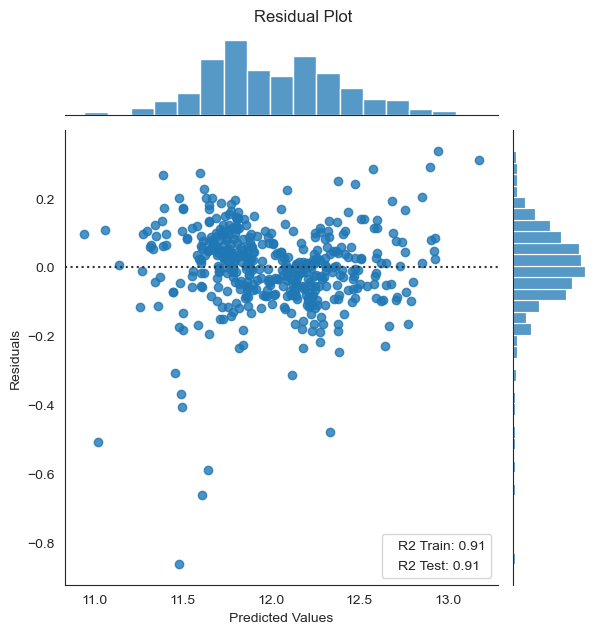

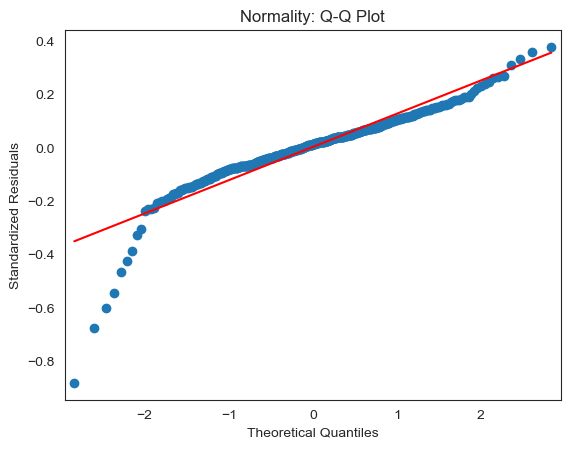

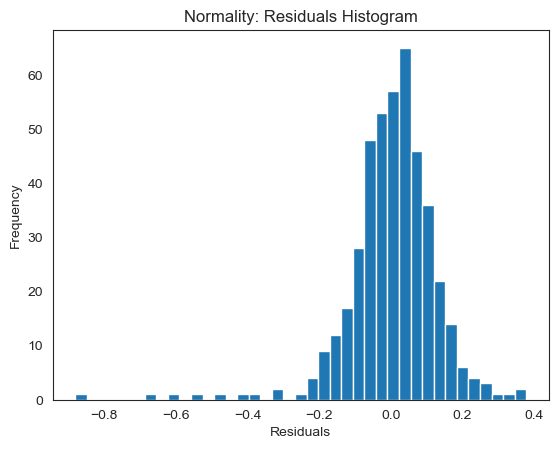

Shapiro-Wilk Test:
Test Statistic: 0.8846281170845032
p-value: 1.3636939283218617e-17
The residuals do not appear to be normally distributed (reject H0)


In [74]:
residual_plot(y_val, y_pred_val_enet_tf, r2_train=r2_train_enet_tf, r2_test=r2_enet_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

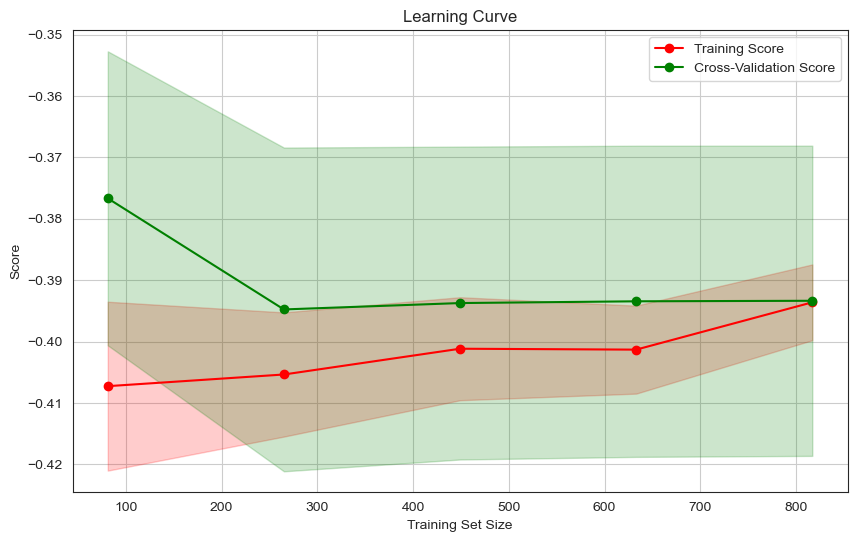

In [75]:
plot_learning_curve(pipe_enet_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [76]:
#define ML models
enet = ElasticNet(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_enet_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="enet", model=enet)

# Define the hyperparameters to search over
param_grid_enet = {'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                  'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]}

# Perform grid search with 5-fold cross-validation
grid_search_enet_ts = GridSearchCV(pipe_enet_ts, param_grid_enet, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_enet_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('enet', ElasticNet(tol=0.01))]),
             n_jobs=-1,
             param_grid={'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]},
             scoring='r2', verbose=1)

In [77]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_enet_ts = round(grid_search_enet_ts.cv_results_["std_test_score"][grid_search_enet_ts.best_index_], 4)
print("Best hyperparameters: ", grid_search_enet_ts.best_params_)
print("Best score: ", grid_search_enet_ts.best_score_, f" ({std_enet_ts})")

# valuate model on validation data
r2_train_enet_ts = grid_search_enet_ts.score(X_val, y_val)

best_model_enet_ts = grid_search_enet_ts.best_estimator_
y_pred_val_enet_ts = best_model_enet_ts.predict(X_val)

# Compute the evaluation metrics
mae_enet_ts, mse_enet_ts, rmse_enet_ts, r2_enet_ts, rmsle_enet_ts, mape_enet_ts = evaluate_model(y_pred_val_enet_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "enet_ts"
evaluation_metrics['best_params_'] = grid_search_enet_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_enet_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_enet_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_enet_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_enet_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_enet_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_enet_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_enet_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'enet__alpha': 0.01, 'enet__l1_ratio': 0.1}
Best score:  0.8698628473359055  (0.0698)
model: enet_ts
best_params_: {'enet__alpha': 0.01, 'enet__l1_ratio': 0.1}
MAE: 15371.843383
MSE: 672769052.337292
RMSE: 25937.791971
R2_train: 0.908085
R2: 0.903588
RMSLE: 0.124871
MAPE: 8.833332


In [78]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_enet_ts, mse_enet_ts, rmse_enet_ts, r2_enet_ts, rmsle_enet_ts, mape_enet_ts = evaluate_model_log(y_pred_val_enet_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "enet_ts"
evaluation_metrics_log['best_params_'] = grid_search_enet_ts.best_params_
evaluation_metrics_log['MAE'] = f'{mae_enet_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_enet_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_enet_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_enet_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_enet_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_enet_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_enet_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: enet_ts
best_params_: {'enet__alpha': 0.01, 'enet__l1_ratio': 0.1}
MAE: 0.085519
MSE: 0.015593
RMSE: 0.124871
R2_train: 0.908085
R2: 0.908085
RMSLE: 0.009795
MAPE: 0.717610


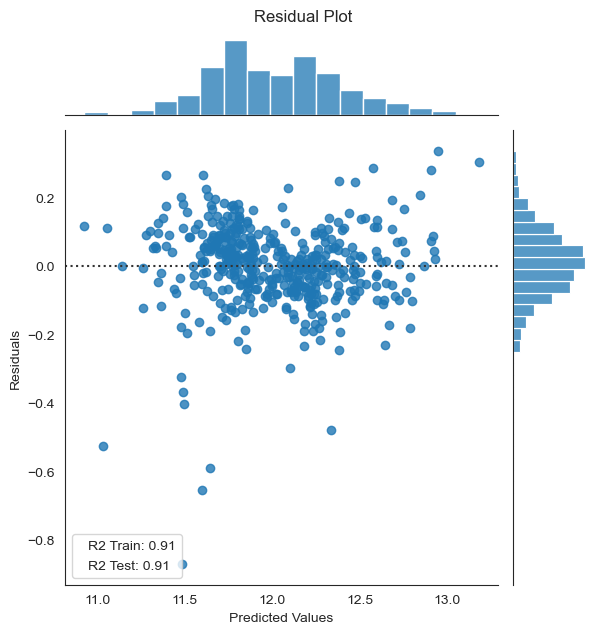

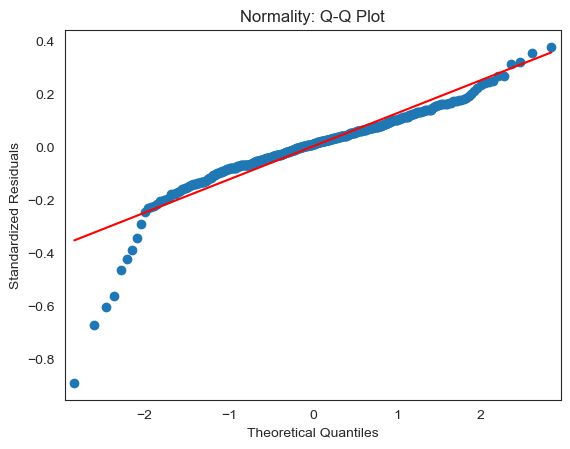

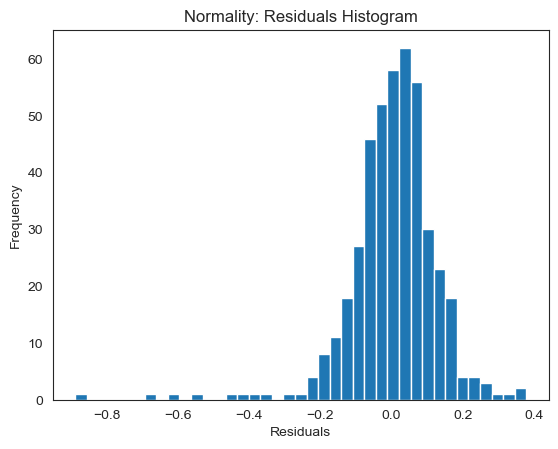

Shapiro-Wilk Test:
Test Statistic: 0.8832085132598877
p-value: 1.0610646899814774e-17
The residuals do not appear to be normally distributed (reject H0)


In [79]:
residual_plot(y_val, y_pred_val_enet_ts, r2_train=r2_train_enet_ts, r2_test=r2_enet_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

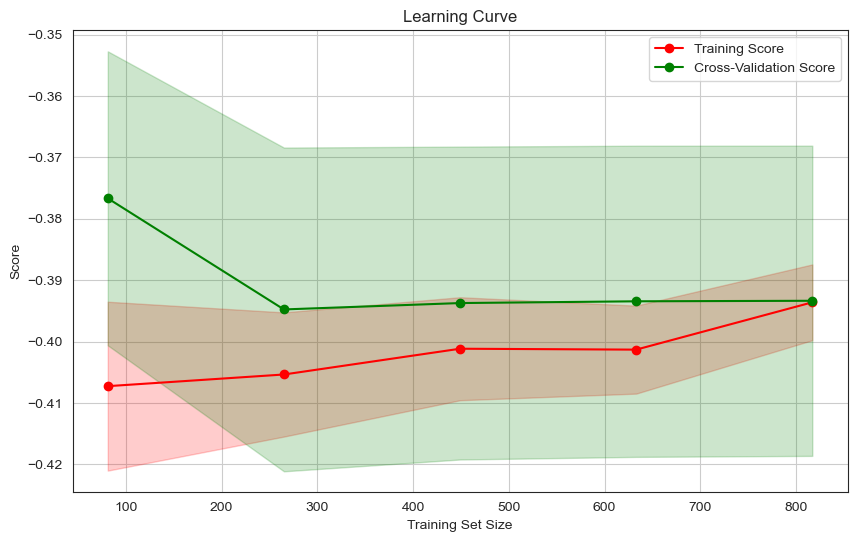

In [80]:
plot_learning_curve(pipe_enet_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [81]:
#define ML models
enet = ElasticNet(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_enet_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="enet", model=enet)

# Define the hyperparameters to search over
param_grid_enet = {'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                  'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]}

# Perform grid search with 5-fold cross-validation
grid_search_enet_ts_pca = GridSearchCV(pipe_enet_ts_pca, param_grid_enet, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_enet_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('enet', ElasticNet(tol=0.01))]),
             n_jobs=-1,
             param_grid={'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]},
             scoring='r2', verbose=1)

In [82]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_enet_ts_pca = round(grid_search_enet_ts_pca.cv_results_["std_test_score"][grid_search_enet_ts_pca.best_index_], 4)
print("Best hyperparameters: ", grid_search_enet_ts_pca.best_params_)
print("Best score: ", grid_search_enet_ts_pca.best_score_, f" ({std_enet_ts_pca})")

# valuate model on validation data
r2_train_enet_ts_pca = grid_search_enet_ts_pca.score(X_val, y_val)

best_model_enet_ts_pca = grid_search_enet_ts_pca.best_estimator_
y_pred_val_enet_ts_pca = best_model_enet_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_enet_ts_pca, mse_enet_ts_pca, rmse_enet_ts_pca, r2_enet_ts_pca, rmsle_enet_ts_pca, mape_enet_ts_pca = evaluate_model(y_pred_val_enet_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "enet_ts_pca"
evaluation_metrics['best_params_'] = grid_search_enet_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_enet_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_enet_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_enet_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_enet_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_enet_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_enet_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_enet_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'enet__alpha': 0.01, 'enet__l1_ratio': 0.01}
Best score:  0.8660664284431323  (0.0521)
model: enet_ts_pca
best_params_: {'enet__alpha': 0.01, 'enet__l1_ratio': 0.01}
MAE: 17403.720029
MSE: 811483826.217240
RMSE: 28486.555183
R2_train: 0.888388
R2: 0.883710
RMSLE: 0.137602
MAPE: 10.005786


In [83]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_enet_ts_pca, mse_enet_ts_pca, rmse_enet_ts_pca, r2_enet_ts_pca, rmsle_enet_ts_pca, mape_enet_ts_pca = evaluate_model_log(y_pred_val_enet_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "enet_ts_pca"
evaluation_metrics_log['best_params_'] = grid_search_enet_ts_pca.best_params_
evaluation_metrics_log['MAE'] = f'{mae_enet_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_enet_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_enet_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_enet_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_enet_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_enet_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_enet_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: enet_ts_pca
best_params_: {'enet__alpha': 0.01, 'enet__l1_ratio': 0.01}
MAE: 0.097349
MSE: 0.018934
RMSE: 0.137602
R2_train: 0.888388
R2: 0.888388
RMSLE: 0.010757
MAPE: 0.816172


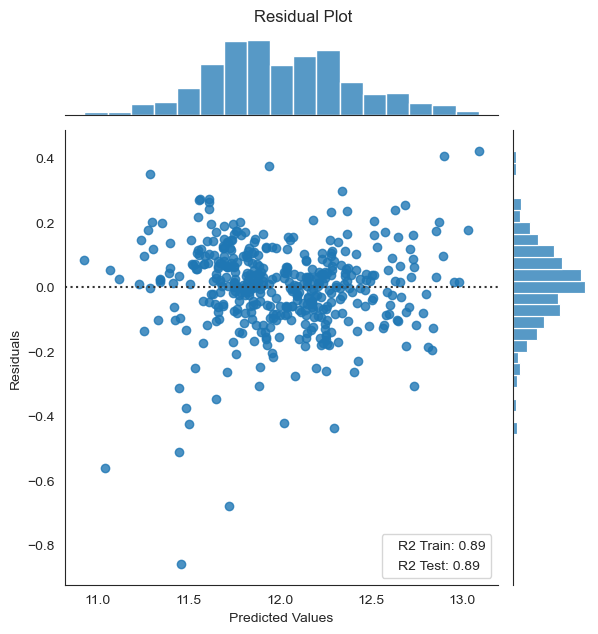

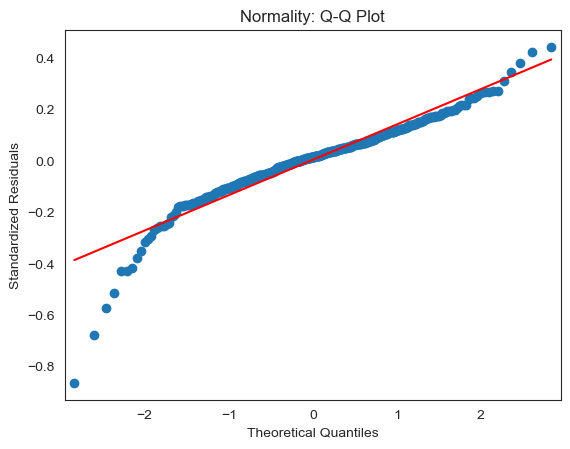

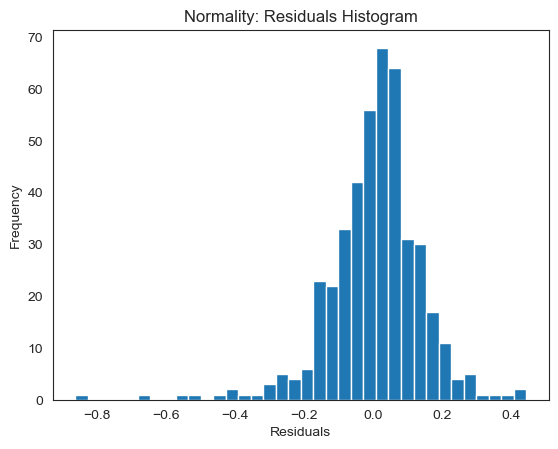

Shapiro-Wilk Test:
Test Statistic: 0.9248817563056946
p-value: 5.332823212970267e-14
The residuals do not appear to be normally distributed (reject H0)


In [84]:
residual_plot(y_val, y_pred_val_enet_ts_pca, r2_train=r2_train_enet_ts_pca, r2_test=r2_enet_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

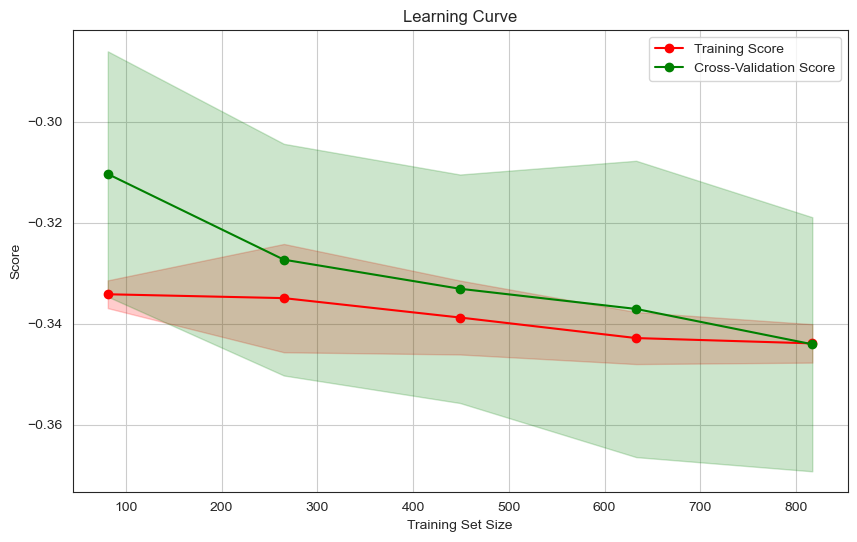

In [85]:
plot_learning_curve(pipe_enet_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Gradient Boosting Regressor
### With Transformer

In [86]:
%%time

#define ML models
gb = GradientBoostingRegressor(tol=0.01, max_features='log2')

#define the pipeline that includes the preprocessor and the estimator
pipe_gb_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="gb", model=gb)

# Define the hyperparameters to search over
param_grid_gb = {
    'gb__loss':  ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gb__max_depth': [3, 5, 7, 9],
    'gb__n_estimators': [50, 100, 200, 500],
    'gb__subsample': [0.5, 0.7, 1.0],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 2, 4],
}

# Perform randomized search with 5-fold cross-validation
random_search_gb_tf = RandomizedSearchCV(estimator=pipe_gb_tf, param_distributions=param_grid_gb, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_gb_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 19.2 s
Wall time: 12min 34s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                              GradientBoostingRegressor(max_features='log2',
                                                                        tol=0.01))]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'gb__learning_rate': [0.01, 0.05, 0.1,
                                                              0.2],
                                        'gb__loss': ['squared_error',
                                                     'absolute_error', 'huber',
                                                     'quantile'],
                                        'gb__max_depth': [3, 5, 7, 9],
                                        'gb__min_samples_leaf': [1, 2, 4],
                                        'gb__min_samples_split': [2, 5, 10],
                                        'gb__n_estimators': [50, 100, 200, 500],
                                        'gb__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [87]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_gb_tf = round(random_search_gb_tf.cv_results_["std_test_score"][random_search_gb_tf.best_index_], 4)
print("Best hyperparameters: ", random_search_gb_tf.best_params_)
print("Best score: ", random_search_gb_tf.best_score_, f" ({std_gb_tf})")

# valuate model on validation data
r2_train_gb_tf = random_search_gb_tf.score(X_val, y_val)

best_model_gb_tf = random_search_gb_tf.best_estimator_
y_pred_val_gb_tf = best_model_gb_tf.predict(X_val)

# Compute the evaluation metrics
mae_gb_tf, mse_gb_tf, rmse_gb_tf, r2_gb_tf, rmsle_gb_tf, mape_gb_tf = evaluate_model(y_pred_val_gb_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "gb_tf"
evaluation_metrics['best_params_'] = random_search_gb_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_gb_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_gb_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_gb_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_gb_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_gb_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_gb_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_gb_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'gb__subsample': 1.0, 'gb__n_estimators': 500, 'gb__min_samples_split': 2, 'gb__min_samples_leaf': 4, 'gb__max_depth': 5, 'gb__loss': 'squared_error', 'gb__learning_rate': 0.05}
Best score:  0.8843408873453461  (0.0365)
model: gb_tf
best_params_: {'gb__subsample': 1.0, 'gb__n_estimators': 500, 'gb__min_samples_split': 2, 'gb__min_samples_leaf': 4, 'gb__max_depth': 5, 'gb__loss': 'squared_error', 'gb__learning_rate': 0.05}
MAE: 15486.240980
MSE: 682513096.751641
RMSE: 26124.951612
R2_train: 0.901779
R2: 0.902192
RMSLE: 0.129084
MAPE: 8.860164


In [88]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_gb_tf, mse_gb_tf, rmse_gb_tf, r2_gb_tf, rmsle_gb_tf, mape_gb_tf = evaluate_model_log(y_pred_val_gb_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "gb_tf"
evaluation_metrics_log['best_params_'] = random_search_gb_tf.best_params_
evaluation_metrics_log['MAE'] = f'{mae_gb_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_gb_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_gb_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_gb_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_gb_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_gb_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_gb_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: gb_tf
best_params_: {'gb__subsample': 1.0, 'gb__n_estimators': 500, 'gb__min_samples_split': 2, 'gb__min_samples_leaf': 4, 'gb__max_depth': 5, 'gb__loss': 'squared_error', 'gb__learning_rate': 0.05}
MAE: 0.085613
MSE: 0.016663
RMSE: 0.129084
R2_train: 0.901779
R2: 0.901779
RMSLE: 0.010114
MAPE: 0.718078


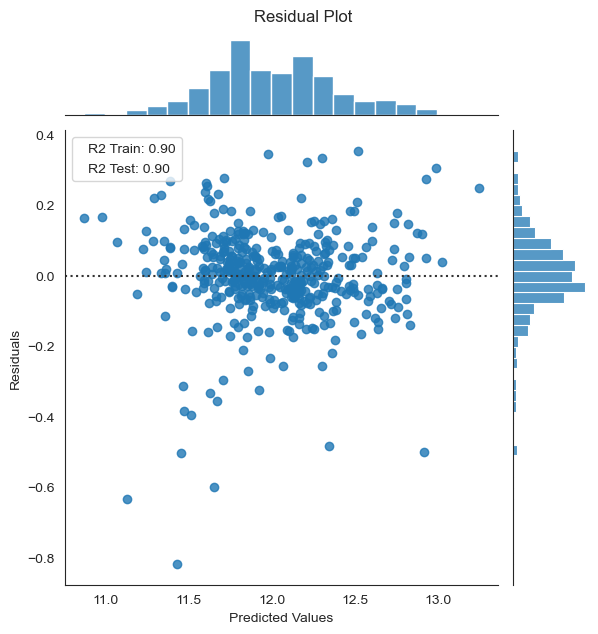

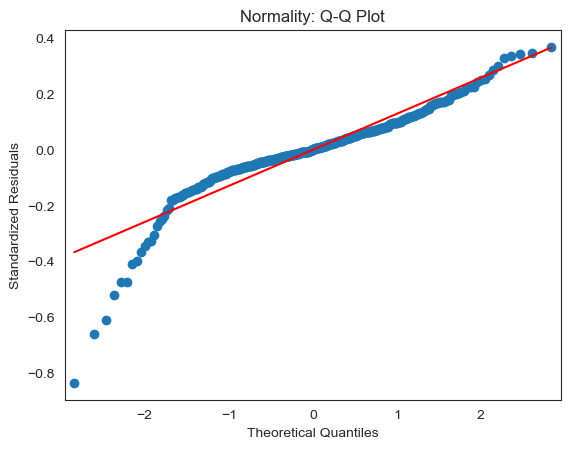

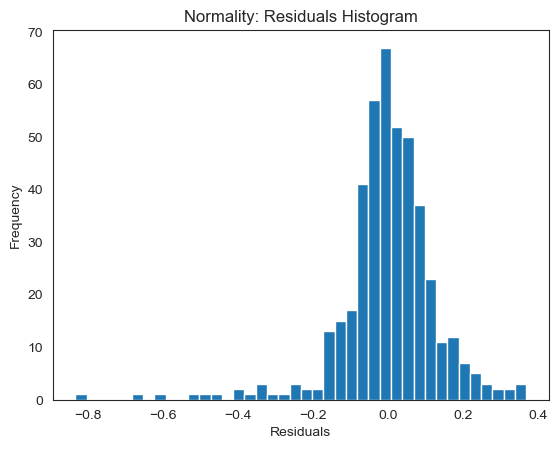

Shapiro-Wilk Test:
Test Statistic: 0.8850240707397461
p-value: 1.4631463496774797e-17
The residuals do not appear to be normally distributed (reject H0)


In [89]:
residual_plot(y_val, y_pred_val_gb_tf, r2_train=r2_train_gb_tf, r2_test=r2_gb_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

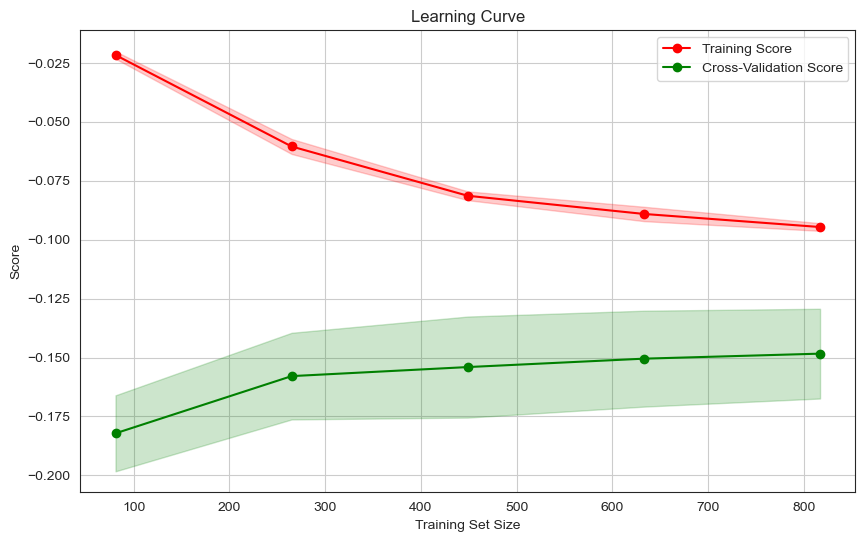

In [90]:
plot_learning_curve(pipe_gb_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [91]:
%%time

#define ML models
gb = GradientBoostingRegressor(tol=0.01, max_features='log2')

#define the pipeline that includes the preprocessor and the estimator
pipe_gb_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="gb", model=gb)

# Define the hyperparameters to search over
param_grid_gb = {
    'gb__loss':  ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gb__max_depth': [3, 5, 7, 9],
    'gb__n_estimators': [50, 100, 200, 500],
    'gb__subsample': [0.5, 0.7, 1.0],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 2, 4],
}

# Perform randomized search with 5-fold cross-validation
random_search_gb_ts = RandomizedSearchCV(estimator=pipe_gb_ts, param_distributions=param_grid_gb, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_gb_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 22.6 s
Wall time: 14min 11s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                              GradientBoostingRegressor(max_features='log2',
                                                                        tol=0.01))]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'gb__learning_rate': [0.01, 0.05, 0.1,
                                                              0.2],
                                        'gb__loss': ['squared_error',
                                                     'absolute_error', 'huber',
                                                     'quantile'],
                                        'gb__max_depth': [3, 5, 7, 9],
                                        'gb__min_samples_leaf': [1, 2, 4],
                                        'gb__min_samples_split': [2, 5, 10],
                                        'gb__n_estimators': [50, 100, 200, 500],
                                        'gb__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [92]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_gb_ts = round(random_search_gb_ts.cv_results_["std_test_score"][random_search_gb_ts.best_index_], 4)
print("Best hyperparameters: ", random_search_gb_ts.best_params_)
print("Best score: ", random_search_gb_ts.best_score_, f" ({std_gb_ts})")

# valuate model on validation data
r2_train_gb_ts = random_search_gb_ts.score(X_val, y_val)

best_model_gb_ts = random_search_gb_ts.best_estimator_
y_pred_val_gb_ts = best_model_gb_ts.predict(X_val)

# Compute the evaluation metrics
mae_gb_ts, mse_gb_ts, rmse_gb_ts, r2_gb_ts, rmsle_gb_ts, mape_gb_ts = evaluate_model(y_pred_val_gb_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "gb_ts"
evaluation_metrics['best_params_'] = random_search_gb_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_gb_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_gb_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_gb_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_gb_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_gb_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_gb_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_gb_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'gb__subsample': 0.7, 'gb__n_estimators': 500, 'gb__min_samples_split': 2, 'gb__min_samples_leaf': 2, 'gb__max_depth': 5, 'gb__loss': 'huber', 'gb__learning_rate': 0.05}
Best score:  0.8850180378331582  (0.0377)
model: gb_ts
best_params_: {'gb__subsample': 0.7, 'gb__n_estimators': 500, 'gb__min_samples_split': 2, 'gb__min_samples_leaf': 2, 'gb__max_depth': 5, 'gb__loss': 'huber', 'gb__learning_rate': 0.05}
MAE: 14711.564708
MSE: 653596050.595214
RMSE: 25565.524649
R2_train: 0.908655
R2: 0.906336
RMSLE: 0.124483
MAPE: 8.537417


In [93]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_gb_ts, mse_gb_ts, rmse_gb_ts, r2_gb_ts, rmsle_gb_ts, mape_gb_ts = evaluate_model_log(y_pred_val_gb_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "gb_ts"
evaluation_metrics_log['best_params_'] = random_search_gb_ts.best_params_
evaluation_metrics_log['MAE'] = f'{mae_gb_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_gb_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_gb_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_gb_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_gb_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_gb_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_gb_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: gb_ts
best_params_: {'gb__subsample': 0.7, 'gb__n_estimators': 500, 'gb__min_samples_split': 2, 'gb__min_samples_leaf': 2, 'gb__max_depth': 5, 'gb__loss': 'huber', 'gb__learning_rate': 0.05}
MAE: 0.082431
MSE: 0.015496
RMSE: 0.124483
R2_train: 0.908655
R2: 0.908655
RMSLE: 0.009759
MAPE: 0.692312


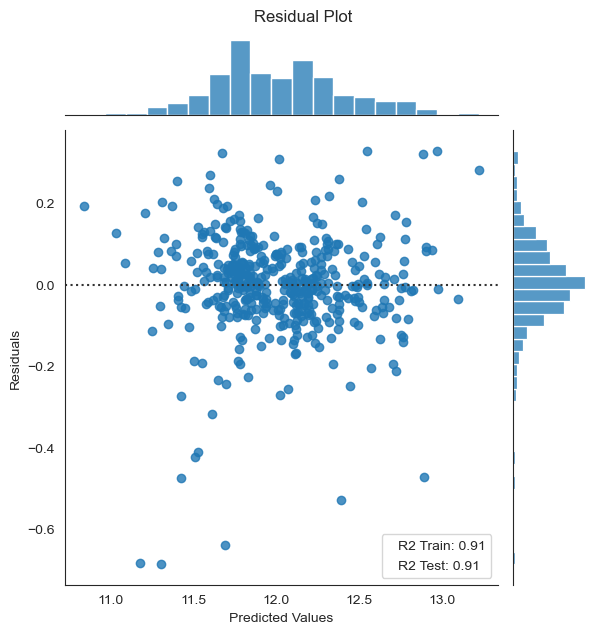

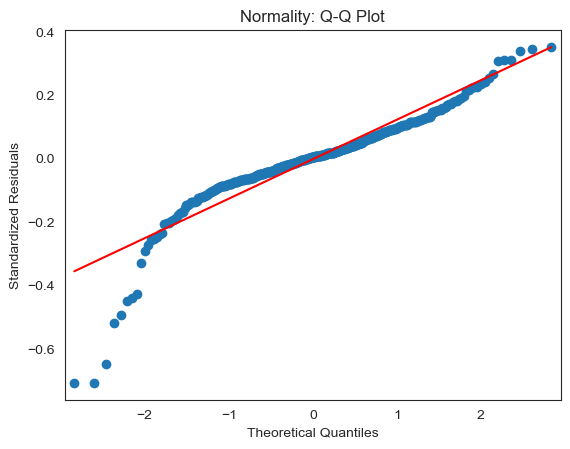

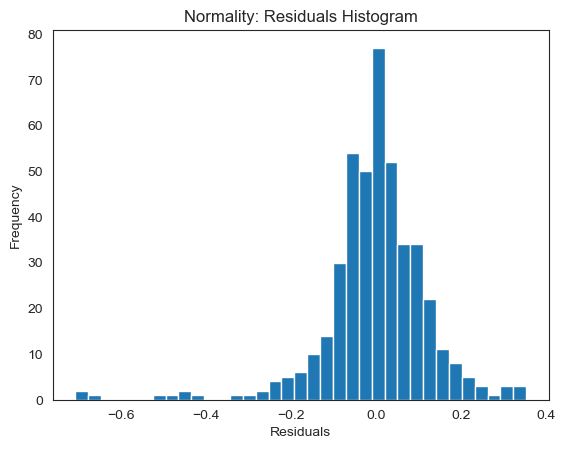

Shapiro-Wilk Test:
Test Statistic: 0.8830050826072693
p-value: 1.023759836972071e-17
The residuals do not appear to be normally distributed (reject H0)


In [94]:
residual_plot(y_val, y_pred_val_gb_ts, r2_train=r2_train_gb_ts, r2_test=r2_gb_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

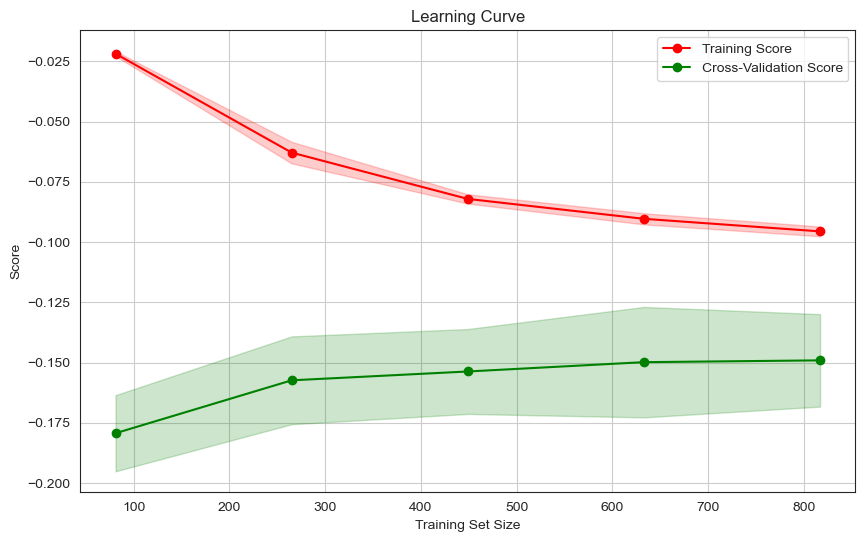

In [95]:
plot_learning_curve(pipe_gb_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [96]:
%%time

#define ML models
gb = GradientBoostingRegressor(tol=0.01, max_features='log2')

#define the pipeline that includes the preprocessor and the estimator
pipe_gb_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="gb", model=gb)

# Define the hyperparameters to search over
param_grid_gb = {
    'gb__loss':  ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gb__max_depth': [3, 5, 7, 9],
    'gb__n_estimators': [50, 100, 200, 500],
    'gb__subsample': [0.5, 0.7, 1.0],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 2, 4],
}

# Perform randomized search with 5-fold cross-validation
random_search_gb_ts_pca = RandomizedSearchCV(estimator=pipe_gb_ts_pca, param_distributions=param_grid_gb, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_gb_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 23.6 s
Wall time: 15min 40s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                              GradientBoostingRegressor(max_features='log2',
                                                                        tol=0.01))]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'gb__learning_rate': [0.01, 0.05, 0.1,
                                                              0.2],
                                        'gb__loss': ['squared_error',
                                                     'absolute_error', 'huber',
                                                     'quantile'],
                                        'gb__max_depth': [3, 5, 7, 9],
                                        'gb__min_samples_leaf': [1, 2, 4],
                                        'gb__min_samples_split': [2, 5, 10],
                                        'gb__n_estimators': [50, 100, 200, 500],
                                        'gb__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [97]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_gb_ts_pca = round(random_search_gb_ts_pca.cv_results_["std_test_score"][random_search_gb_ts_pca.best_index_], 4)
print("Best hyperparameters: ", random_search_gb_ts_pca.best_params_)
print("Best score: ", random_search_gb_ts_pca.best_score_, f" ({std_gb_ts_pca})")

# valuate model on validation data
r2_train_gb_ts_pca = random_search_gb_ts_pca.score(X_val, y_val)

best_model_gb_ts_pca = random_search_gb_ts_pca.best_estimator_
y_pred_val_gb_ts_pca = best_model_gb_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_gb_ts_pca, mse_gb_ts_pca, rmse_gb_ts_pca, r2_gb_ts_pca, rmsle_gb_ts_pca, mape_gb_ts_pca = evaluate_model(y_pred_val_gb_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "gb_ts_pca"
evaluation_metrics['best_params_'] = random_search_gb_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_gb_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_gb_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_gb_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_gb_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_gb_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_gb_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_gb_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'gb__subsample': 0.7, 'gb__n_estimators': 500, 'gb__min_samples_split': 10, 'gb__min_samples_leaf': 4, 'gb__max_depth': 5, 'gb__loss': 'huber', 'gb__learning_rate': 0.1}
Best score:  0.8655127531595579  (0.0143)
model: gb_ts_pca
best_params_: {'gb__subsample': 0.7, 'gb__n_estimators': 500, 'gb__min_samples_split': 10, 'gb__min_samples_leaf': 4, 'gb__max_depth': 5, 'gb__loss': 'huber', 'gb__learning_rate': 0.1}
MAE: 19103.706056
MSE: 957082375.147251
RMSE: 30936.747973
R2_train: 0.861572
R2: 0.862845
RMSLE: 0.153243
MAPE: 11.208545


In [98]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_gb_ts_pca, mse_gb_ts_pca, rmse_gb_ts_pca, r2_gb_ts_pca, rmsle_gb_ts_pca, mape_gb_ts_pca = evaluate_model_log(y_pred_val_gb_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "gb_ts_pca"
evaluation_metrics_log['best_params_'] = random_search_gb_ts_pca.best_params_
evaluation_metrics_log['MAE'] = f'{mae_gb_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_gb_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_gb_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_gb_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_gb_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_gb_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_gb_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: gb_ts_pca
best_params_: {'gb__subsample': 0.7, 'gb__n_estimators': 500, 'gb__min_samples_split': 10, 'gb__min_samples_leaf': 4, 'gb__max_depth': 5, 'gb__loss': 'huber', 'gb__learning_rate': 0.1}
MAE: 0.106775
MSE: 0.023484
RMSE: 0.153243
R2_train: 0.861572
R2: 0.861572
RMSLE: 0.011988
MAPE: 0.896288


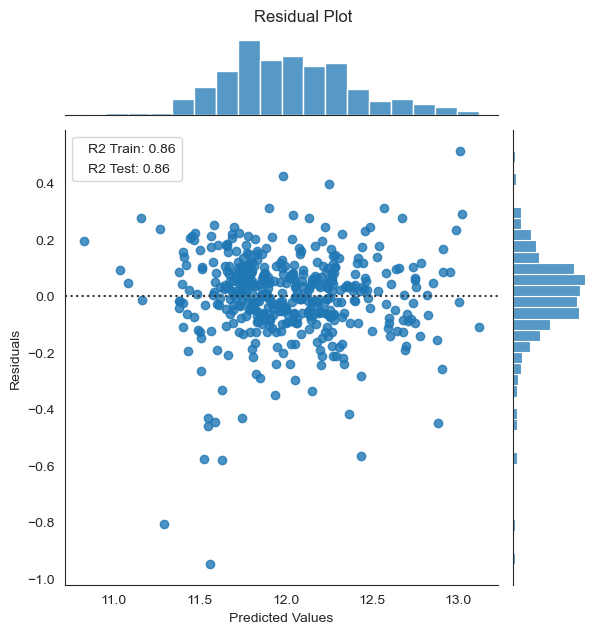

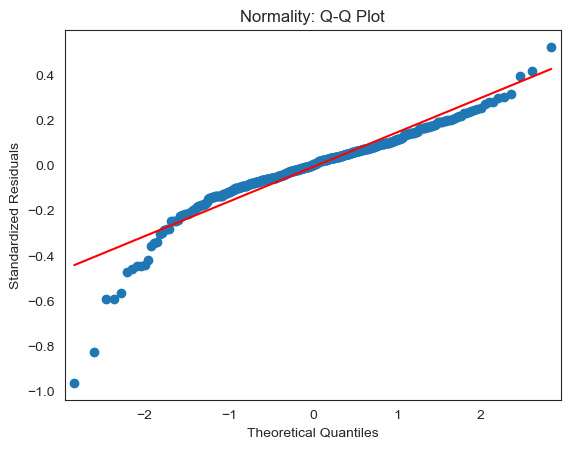

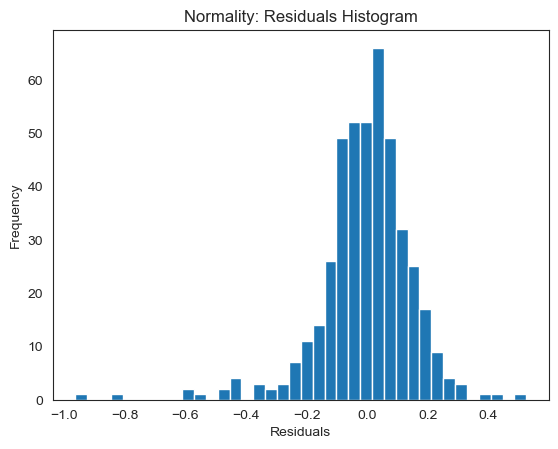

Shapiro-Wilk Test:
Test Statistic: 0.9126527309417725
p-value: 3.2775740841262547e-15
The residuals do not appear to be normally distributed (reject H0)


In [99]:
residual_plot(y_val, y_pred_val_gb_ts_pca, r2_train=r2_train_gb_ts_pca, r2_test=r2_gb_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

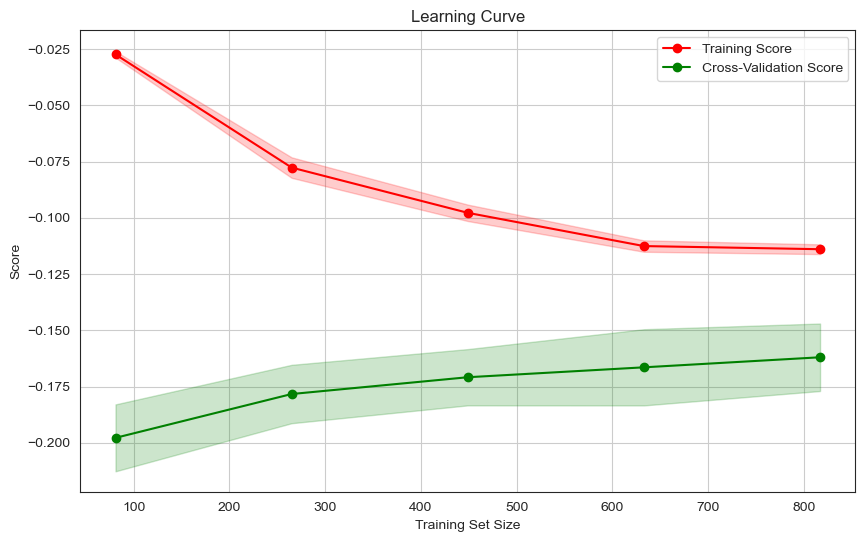

In [100]:
plot_learning_curve(pipe_gb_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## XGBOOST
### With Transformer

In [101]:
%%time

#define ML models
xgb = XGBRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_xgb_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="xgb", model=xgb)

# Define the hyperparameters to search over
param_grid_xgb = {
        'xgb__max_depth': [3, 5, 7, 9],
        'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'xgb__n_estimators': [100, 200, 300, 400],
        'xgb__colsample_bytree': [0.5, 0.7, 1],
        'xgb__subsample': [0.5, 0.7, 1],
        'xgb__gamma': [0, 0.1, 0.5, 1],
        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
        'xgb__reg_lambda': [0, 0.1, 0.5, 1]
}

# Perform randomized search with 5-fold cross-validation
random_search_xgb_tf = RandomizedSearchCV(estimator=pipe_xgb_tf, param_distributions=param_grid_xgb, n_iter=100, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_xgb_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 10.5 s
Wall time: 7min 3s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                           random_state=None, ...))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.5, 0.7, 1],
                                        'xgb__gamma': [0, 0.1, 0.5, 1],
                                        'xgb__learning_rate': [0.01, 0.1, 0.2,
                                                               0.3],
                                        'xgb__max_depth': [3, 5, 7, 9],
                                        'xgb__n_estimators': [100, 200, 300,
                                                              400],
                                        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
                                        'xgb__reg_lambda': [0, 0.1, 0.5, 1],
                                        'xgb__subsample': [0.5, 0.7, 1]},
                   scoring='r2', verbose=1)

In [102]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_xgb_tf = round(random_search_xgb_tf.cv_results_["std_test_score"][random_search_xgb_tf.best_index_], 4)
print("Best hyperparameters: ", random_search_xgb_tf.best_params_)
print("Best score: ", random_search_xgb_tf.best_score_, f" ({std_xgb_tf})")

# valuate model on validation data
r2_train_xgb_tf = random_search_xgb_tf.score(X_val, y_val)

best_model_xgb_tf = random_search_xgb_tf.best_estimator_
y_pred_val_xgb_tf = best_model_xgb_tf.predict(X_val)

# Compute the evaluation metrics
mae_xgb_tf, mse_xgb_tf, rmse_xgb_tf, r2_xgb_tf, rmsle_xgb_tf, mape_xgb_tf = evaluate_model(y_pred_val_xgb_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "xgb_tf"
evaluation_metrics['best_params_'] = random_search_xgb_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_xgb_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_xgb_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_xgb_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_xgb_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_xgb_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_xgb_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_xgb_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'xgb__subsample': 0.7, 'xgb__reg_lambda': 1, 'xgb__reg_alpha': 0.5, 'xgb__n_estimators': 100, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.7}
Best score:  0.8804108978694469  (0.018)
model: xgb_tf
best_params_: {'xgb__subsample': 0.7, 'xgb__reg_lambda': 1, 'xgb__reg_alpha': 0.5, 'xgb__n_estimators': 100, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.7}
MAE: 16259.966859
MSE: 729990198.786817
RMSE: 27018.330792
R2_train: 0.894828
R2: 0.895388
RMSLE: 0.133573
MAPE: 9.455468


In [103]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_xgb_tf, mse_xgb_tf, rmse_xgb_tf, r2_xgb_tf, rmsle_xgb_tf, mape_xgb_tf = evaluate_model_log(y_pred_val_xgb_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "xgb_tf"
evaluation_metrics_log['best_params_'] = random_search_xgb_tf.best_params_
evaluation_metrics_log['MAE'] = f'{mae_xgb_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_xgb_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_xgb_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_xgb_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_xgb_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_xgb_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_xgb_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: xgb_tf
best_params_: {'xgb__subsample': 0.7, 'xgb__reg_lambda': 1, 'xgb__reg_alpha': 0.5, 'xgb__n_estimators': 100, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.7}
MAE: 0.090707
MSE: 0.017842
RMSE: 0.133573
R2_train: 0.894828
R2: 0.894828
RMSLE: 0.010485
MAPE: 0.761535


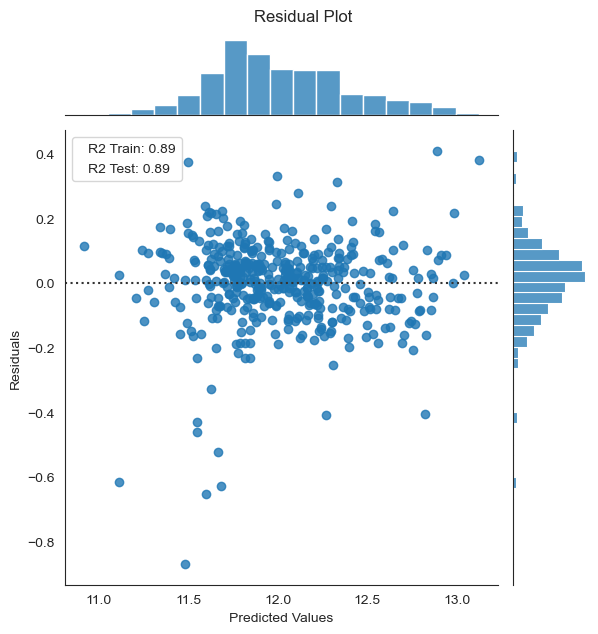

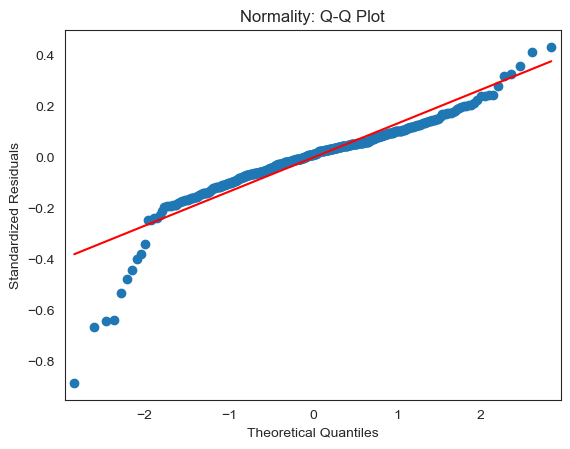

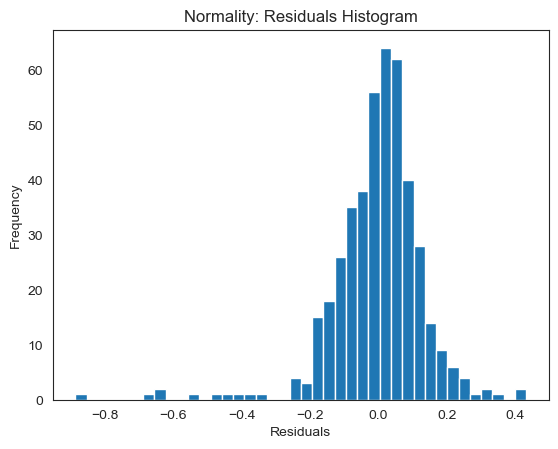

Shapiro-Wilk Test:
Test Statistic: 0.8834221959114075
p-value: 1.1017497338460206e-17
The residuals do not appear to be normally distributed (reject H0)


In [104]:
residual_plot(y_val, y_pred_val_xgb_tf, r2_train=r2_train_xgb_tf, r2_test=r2_xgb_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

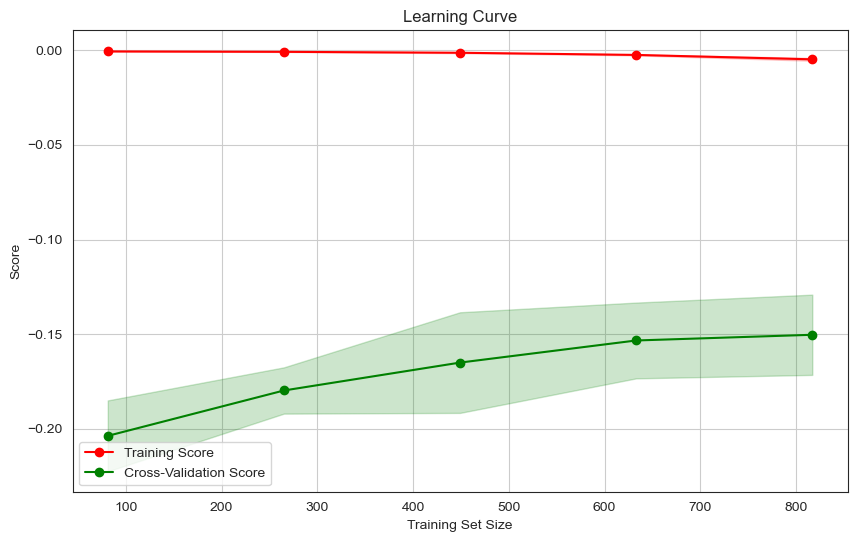

In [105]:
plot_learning_curve(pipe_xgb_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [106]:
%%time

#define ML models
xgb = XGBRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_xgb_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="xgb", model=xgb)

# Define the hyperparameters to search over
param_grid_xgb = {
        'xgb__max_depth': [3, 5, 7, 9],
        'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'xgb__n_estimators': [100, 200, 300, 400],
        'xgb__colsample_bytree': [0.5, 0.7, 1],
        'xgb__subsample': [0.5, 0.7, 1],
        'xgb__gamma': [0, 0.1, 0.5, 1],
        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
        'xgb__reg_lambda': [0, 0.1, 0.5, 1]
}

# Perform randomized search with 5-fold cross-validation
random_search_xgb_ts = RandomizedSearchCV(estimator=pipe_xgb_ts, param_distributions=param_grid_xgb, n_iter=100, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_xgb_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 13 s
Wall time: 9min 5s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                           random_state=None, ...))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.5, 0.7, 1],
                                        'xgb__gamma': [0, 0.1, 0.5, 1],
                                        'xgb__learning_rate': [0.01, 0.1, 0.2,
                                                               0.3],
                                        'xgb__max_depth': [3, 5, 7, 9],
                                        'xgb__n_estimators': [100, 200, 300,
                                                              400],
                                        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
                                        'xgb__reg_lambda': [0, 0.1, 0.5, 1],
                                        'xgb__subsample': [0.5, 0.7, 1]},
                   scoring='r2', verbose=1)

In [107]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_xgb_ts = round(random_search_xgb_ts.cv_results_["std_test_score"][random_search_xgb_ts.best_index_], 4)
print("Best hyperparameters: ", random_search_xgb_ts.best_params_)
print("Best score: ", random_search_xgb_ts.best_score_, f" ({std_xgb_ts})")

# valuate model on validation data
r2_train_xgb_ts = random_search_xgb_ts.score(X_val, y_val)

best_model_xgb_ts = random_search_xgb_ts.best_estimator_
y_pred_val_xgb_ts = best_model_xgb_ts.predict(X_val)

# Compute the evaluation metrics
mae_xgb_ts, mse_xgb_ts, rmse_xgb_ts, r2_xgb_ts, rmsle_xgb_ts, mape_xgb_ts = evaluate_model(y_pred_val_xgb_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "xgb_ts"
evaluation_metrics['best_params_'] = random_search_xgb_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_xgb_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_xgb_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_xgb_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_xgb_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_xgb_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_xgb_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_xgb_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'xgb__subsample': 0.7, 'xgb__reg_lambda': 0.1, 'xgb__reg_alpha': 0.1, 'xgb__n_estimators': 100, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 1}
Best score:  0.8801098667115739  (0.0404)
model: xgb_ts
best_params_: {'xgb__subsample': 0.7, 'xgb__reg_lambda': 0.1, 'xgb__reg_alpha': 0.1, 'xgb__n_estimators': 100, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 1}
MAE: 15843.141526
MSE: 691718838.532084
RMSE: 26300.548255
R2_train: 0.895524
R2: 0.900873
RMSLE: 0.133131
MAPE: 9.204923


In [108]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_xgb_ts, mse_xgb_ts, rmse_xgb_ts, r2_xgb_ts, rmsle_xgb_ts, mape_xgb_ts = evaluate_model_log(y_pred_val_xgb_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "xgb_ts"
evaluation_metrics_log['best_params_'] = random_search_xgb_ts.best_params_
evaluation_metrics_log['MAE'] = f'{mae_xgb_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_xgb_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_xgb_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_xgb_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_xgb_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_xgb_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_xgb_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: xgb_ts
best_params_: {'xgb__subsample': 0.7, 'xgb__reg_lambda': 0.1, 'xgb__reg_alpha': 0.1, 'xgb__n_estimators': 100, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 1}
MAE: 0.089074
MSE: 0.017724
RMSE: 0.133131
R2_train: 0.895524
R2: 0.895524
RMSLE: 0.010454
MAPE: 0.748048


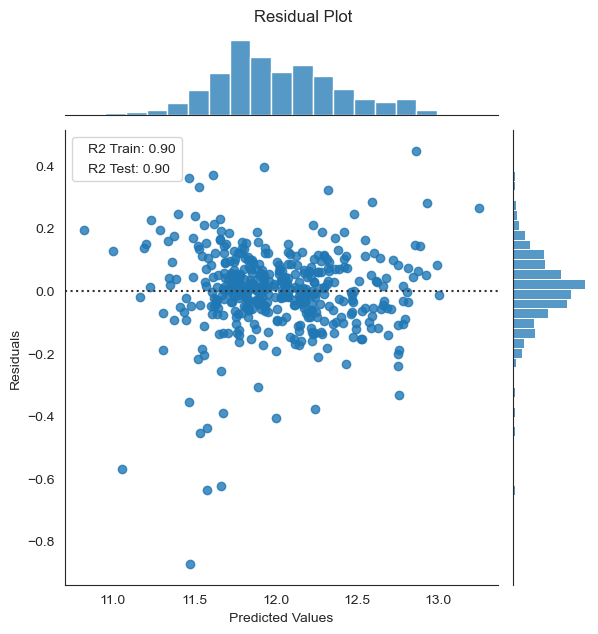

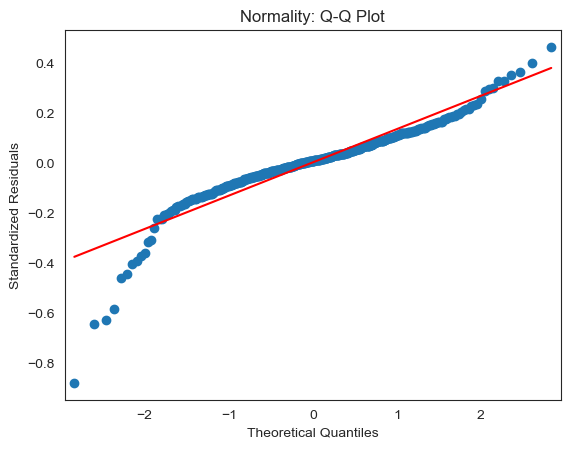

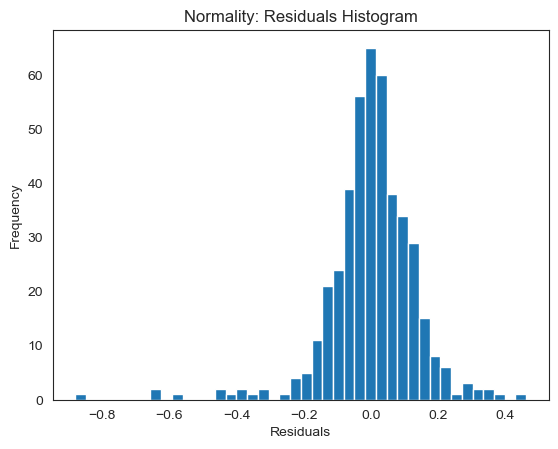

Shapiro-Wilk Test:
Test Statistic: 0.8927557468414307
p-value: 5.998837548454195e-17
The residuals do not appear to be normally distributed (reject H0)


In [109]:
residual_plot(y_val, y_pred_val_xgb_ts, r2_train=r2_train_xgb_ts, r2_test=r2_xgb_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

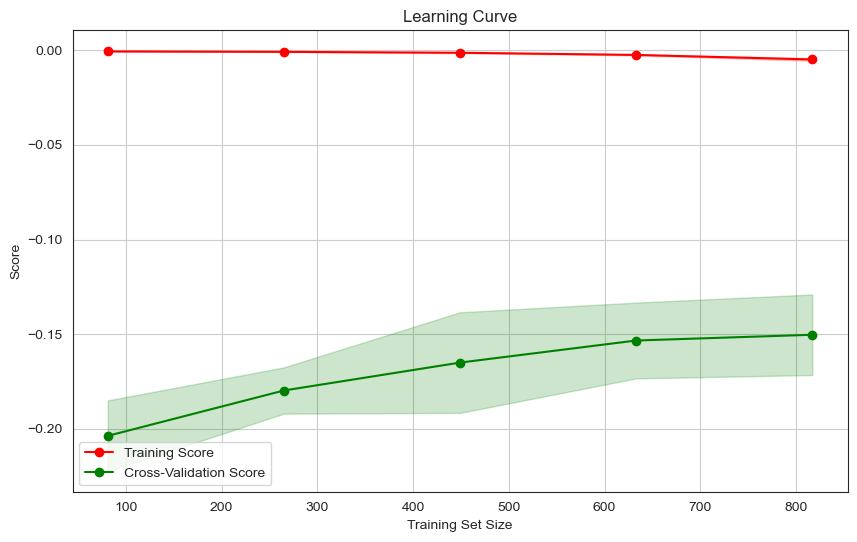

In [110]:
plot_learning_curve(pipe_xgb_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [111]:
%%time

#define ML models
xgb = XGBRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_xgb_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="xgb", model=xgb)

# Define the hyperparameters to search over
param_grid_xgb = {
        'xgb__max_depth': [3, 5, 7, 9],
        'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'xgb__n_estimators': [100, 200, 300, 400],
        'xgb__colsample_bytree': [0.5, 0.7, 1],
        'xgb__subsample': [0.5, 0.7, 1],
        'xgb__gamma': [0, 0.1, 0.5, 1],
        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
        'xgb__reg_lambda': [0, 0.1, 0.5, 1]
}

# Perform randomized search with 5-fold cross-validation
random_search_xgb_ts_pca = RandomizedSearchCV(estimator=pipe_xgb_ts_pca, param_distributions=param_grid_xgb, n_iter=100, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_xgb_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 9.66 s
Wall time: 3min 34s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                           random_state=None, ...))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.5, 0.7, 1],
                                        'xgb__gamma': [0, 0.1, 0.5, 1],
                                        'xgb__learning_rate': [0.01, 0.1, 0.2,
                                                               0.3],
                                        'xgb__max_depth': [3, 5, 7, 9],
                                        'xgb__n_estimators': [100, 200, 300,
                                                              400],
                                        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
                                        'xgb__reg_lambda': [0, 0.1, 0.5, 1],
                                        'xgb__subsample': [0.5, 0.7, 1]},
                   scoring='r2', verbose=1)

In [112]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_xgb_ts_pca = round(random_search_xgb_ts_pca.cv_results_["std_test_score"][random_search_xgb_ts_pca.best_index_], 4)
print("Best hyperparameters: ", random_search_xgb_ts_pca.best_params_)
print("Best score: ", random_search_xgb_ts_pca.best_score_, f" ({std_xgb_ts_pca})")

# valuate model on validation data
r2_train_xgb_ts_pca = random_search_xgb_ts_pca.score(X_val, y_val)

best_model_xgb_ts_pca = random_search_xgb_ts_pca.best_estimator_
y_pred_val_xgb_ts_pca = best_model_xgb_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_xgb_ts_pca, mse_xgb_ts_pca, rmse_xgb_ts_pca, r2_xgb_ts_pca, rmsle_xgb_ts_pca, mape_xgb_ts_pca = evaluate_model(y_pred_val_xgb_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "xgb_ts_pca"
evaluation_metrics['best_params_'] = random_search_xgb_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_xgb_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_xgb_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_xgb_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_xgb_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_xgb_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_xgb_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_xgb_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'xgb__subsample': 1, 'xgb__reg_lambda': 0.5, 'xgb__reg_alpha': 0, 'xgb__n_estimators': 100, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.7}
Best score:  0.871638202317396  (0.0275)
model: xgb_ts_pca
best_params_: {'xgb__subsample': 1, 'xgb__reg_lambda': 0.5, 'xgb__reg_alpha': 0, 'xgb__n_estimators': 100, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.7}
MAE: 18195.930936
MSE: 836174782.836694
RMSE: 28916.686927
R2_train: 0.878049
R2: 0.880171
RMSLE: 0.143834
MAPE: 10.507479


In [113]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_xgb_ts_pca, mse_xgb_ts_pca, rmse_xgb_ts_pca, r2_xgb_ts_pca, rmsle_xgb_ts_pca, mape_xgb_ts_pca = evaluate_model_log(y_pred_val_xgb_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "xgb_ts_pca"
evaluation_metrics_log['best_params_'] = random_search_xgb_ts_pca.best_params_
evaluation_metrics_log['MAE'] = f'{mae_xgb_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_xgb_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_xgb_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_xgb_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_xgb_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_xgb_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_xgb_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: xgb_ts_pca
best_params_: {'xgb__subsample': 1, 'xgb__reg_lambda': 0.5, 'xgb__reg_alpha': 0, 'xgb__n_estimators': 100, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.7}
MAE: 0.101962
MSE: 0.020688
RMSE: 0.143834
R2_train: 0.878049
R2: 0.878049
RMSLE: 0.011259
MAPE: 0.855222


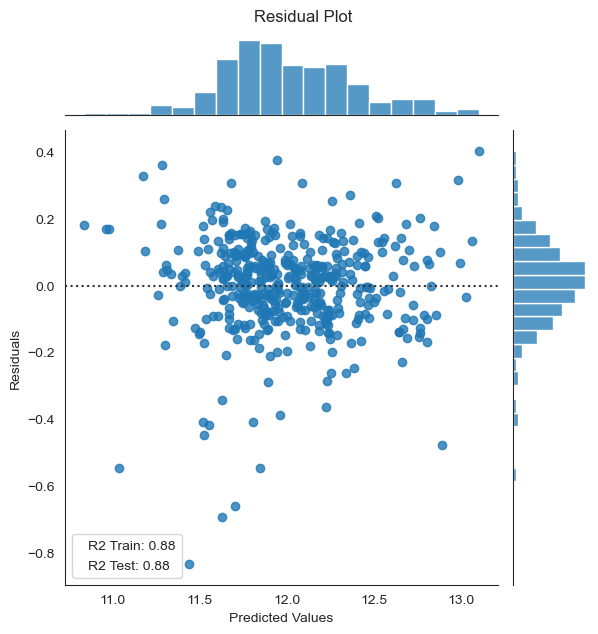

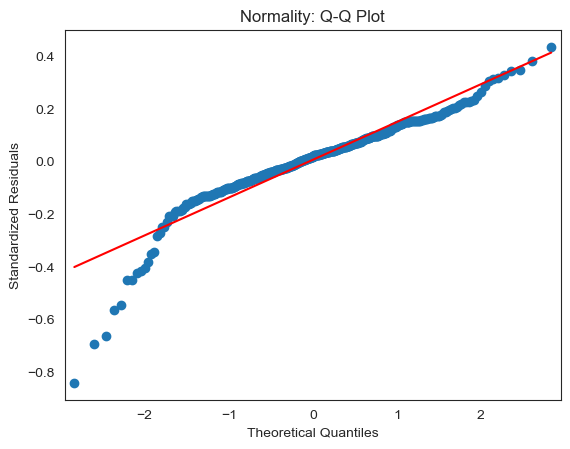

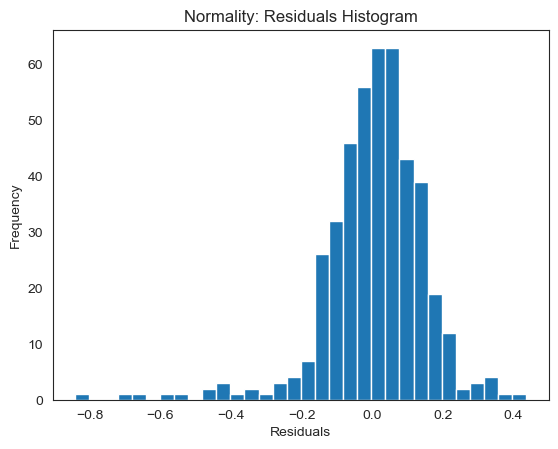

Shapiro-Wilk Test:
Test Statistic: 0.9111977815628052
p-value: 2.3960476259191543e-15
The residuals do not appear to be normally distributed (reject H0)


In [114]:
residual_plot(y_val, y_pred_val_xgb_ts_pca, r2_train=r2_train_xgb_ts_pca, r2_test=r2_xgb_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

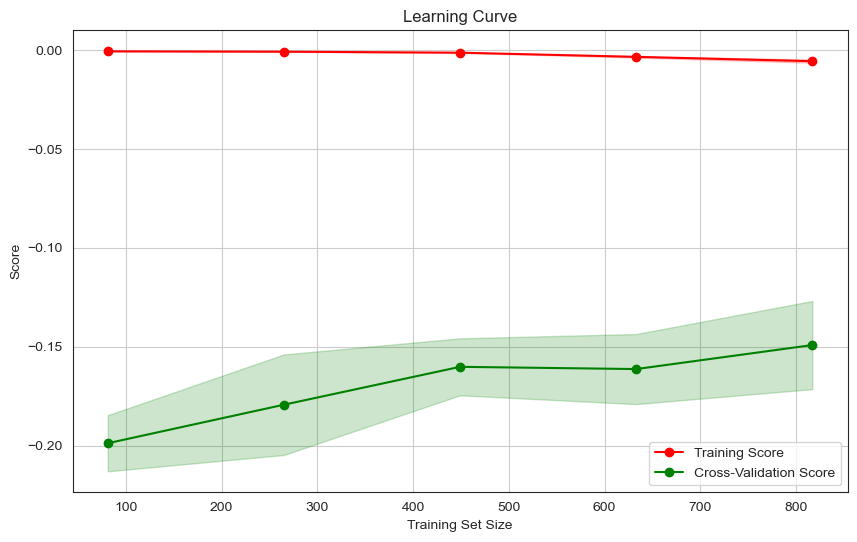

In [115]:
plot_learning_curve(pipe_xgb_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Light GBM
### With Transformer

In [116]:
%%time

#define ML models
lgbm = LGBMRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_lgbm_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lgbm", model=lgbm)

# Define the hyperparameters to search over
param_grid_lgbm = {
    'lgbm__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'lgbm__max_depth': [3, 5, 7, 9],
    'lgbm__n_estimators': [50, 100, 200, 500],
    'lgbm__subsample': [0.5, 0.7, 1.0],
    'lgbm__colsample_bytree': [0.5, 0.7, 1.0]
}

# Perform randomized search with 5-fold cross-validation
random_search_lgbm_tf = RandomizedSearchCV(estimator=pipe_lgbm_tf, param_distributions=param_grid_lgbm, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_lgbm_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 24.6 s
Wall time: 3min 5s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                                                'KitchenAbvGr',
                                                                                'TotRmsAbvGrd',
                                                                                'Fireplaces',
                                                                                'GarageCars',
                                                                                'MoSold',
                                                                                'YrSold'])])),
                                             ('lgbm', LGBMRegressor())]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'lgbm__colsample_bytree': [0.5, 0.7,
                                                                   1.0],
                                        'lgbm__learning_rate': [0.01, 0.05, 0.1,
                                                                0.2],
                                        'lgbm__max_depth': [3, 5, 7, 9],
                                        'lgbm__n_estimators': [50, 100, 200,
                                                               500],
                                        'lgbm__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [117]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lgbm_tf = round(random_search_lgbm_tf.cv_results_["std_test_score"][random_search_lgbm_tf.best_index_], 4)
print("Best hyperparameters: ", random_search_lgbm_tf.best_params_)
print("Best score: ", random_search_lgbm_tf.best_score_, f" ({std_lgbm_tf})")

# valuate model on validation data
r2_train_lgbm_tf = random_search_lgbm_tf.score(X_val, y_val)

best_model_lgbm_tf = random_search_lgbm_tf.best_estimator_
y_pred_val_lgbm_tf = best_model_lgbm_tf.predict(X_val)

# Compute the evaluation metrics
mae_lgbm_tf, mse_lgbm_tf, rmse_lgbm_tf, r2_lgbm_tf, rmsle_lgbm_tf, mape_lgbm_tf = evaluate_model(y_pred_val_lgbm_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lgbm_tf"
evaluation_metrics['best_params_'] = random_search_lgbm_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_lgbm_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_lgbm_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lgbm_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lgbm_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_lgbm_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lgbm_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lgbm_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lgbm__subsample': 0.5, 'lgbm__n_estimators': 500, 'lgbm__max_depth': 5, 'lgbm__learning_rate': 0.05, 'lgbm__colsample_bytree': 0.5}
Best score:  0.8815370066235412  (0.0349)
model: lgbm_tf
best_params_: {'lgbm__subsample': 0.5, 'lgbm__n_estimators': 500, 'lgbm__max_depth': 5, 'lgbm__learning_rate': 0.05, 'lgbm__colsample_bytree': 0.5}
MAE: 15552.262857
MSE: 672720607.530422
RMSE: 25936.858089
R2_train: 0.898872
R2: 0.903595
RMSLE: 0.130980
MAPE: 9.064613


In [118]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_lgbm_tf, mse_lgbm_tf, rmse_lgbm_tf, r2_lgbm_tf, rmsle_lgbm_tf, mape_lgbm_tf = evaluate_model_log(y_pred_val_lgbm_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "lgbm_tf"
evaluation_metrics_log['best_params_'] = random_search_lgbm_tf.best_params_
evaluation_metrics_log['MAE'] = f'{mae_lgbm_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_lgbm_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_lgbm_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_lgbm_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_lgbm_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_lgbm_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_lgbm_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: lgbm_tf
best_params_: {'lgbm__subsample': 0.5, 'lgbm__n_estimators': 500, 'lgbm__max_depth': 5, 'lgbm__learning_rate': 0.05, 'lgbm__colsample_bytree': 0.5}
MAE: 0.087265
MSE: 0.017156
RMSE: 0.130980
R2_train: 0.898872
R2: 0.898872
RMSLE: 0.010298
MAPE: 0.733260


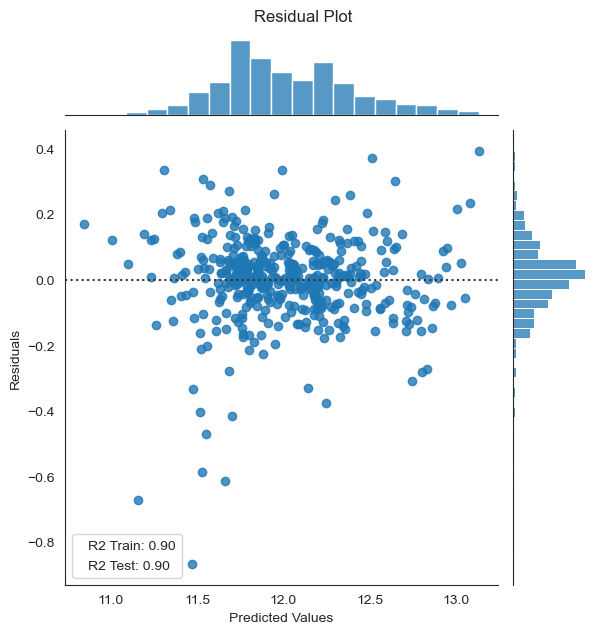

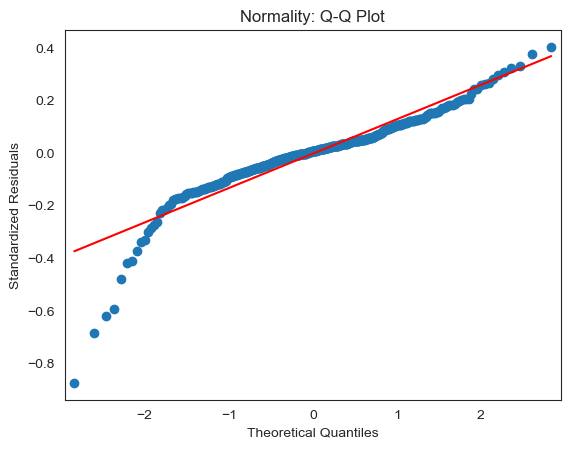

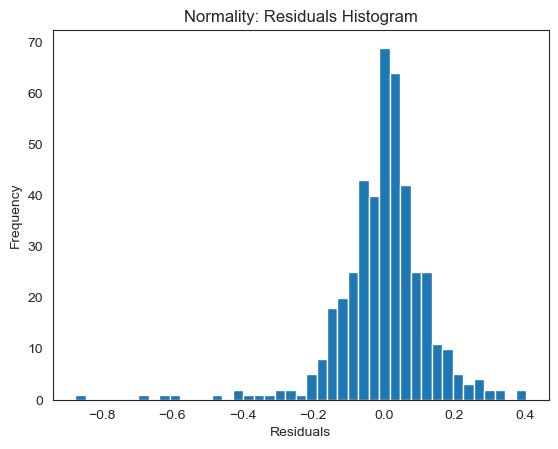

Shapiro-Wilk Test:
Test Statistic: 0.8900279998779297
p-value: 3.61694913703958e-17
The residuals do not appear to be normally distributed (reject H0)


In [119]:
residual_plot(y_val, y_pred_val_lgbm_tf, r2_train=r2_train_lgbm_tf, r2_test=r2_lgbm_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

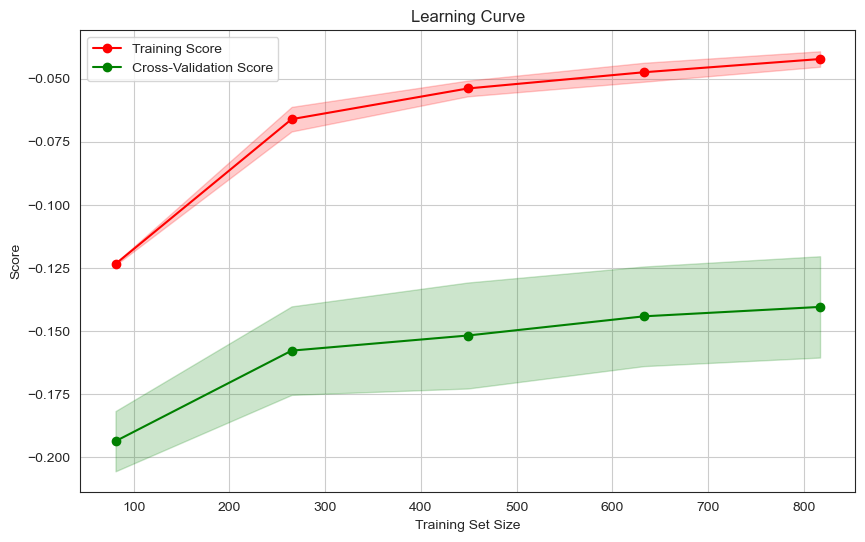

In [120]:
plot_learning_curve(pipe_lgbm_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [121]:
%%time

#define ML models
lgbm = LGBMRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_lgbm_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lgbm", model=lgbm)

# Define the hyperparameters to search over
param_grid_lgbm = {
    'lgbm__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'lgbm__max_depth': [3, 5, 7, 9],
    'lgbm__n_estimators': [50, 100, 200, 500],
    'lgbm__subsample': [0.5, 0.7, 1.0],
    'lgbm__colsample_bytree': [0.5, 0.7, 1.0]
}

# Perform randomized search with 5-fold cross-validation
random_search_lgbm_ts = RandomizedSearchCV(estimator=pipe_lgbm_ts, param_distributions=param_grid_lgbm, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_lgbm_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 17.6 s
Wall time: 2min 28s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                                                'KitchenAbvGr',
                                                                                'TotRmsAbvGrd',
                                                                                'Fireplaces',
                                                                                'GarageCars',
                                                                                'MoSold',
                                                                                'YrSold'])])),
                                             ('lgbm', LGBMRegressor())]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'lgbm__colsample_bytree': [0.5, 0.7,
                                                                   1.0],
                                        'lgbm__learning_rate': [0.01, 0.05, 0.1,
                                                                0.2],
                                        'lgbm__max_depth': [3, 5, 7, 9],
                                        'lgbm__n_estimators': [50, 100, 200,
                                                               500],
                                        'lgbm__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [122]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lgbm_ts = round(random_search_lgbm_ts.cv_results_["std_test_score"][random_search_lgbm_ts.best_index_], 4)
print("Best hyperparameters: ", random_search_lgbm_ts.best_params_)
print("Best score: ", random_search_lgbm_ts.best_score_, f" ({std_lgbm_ts})")

# valuate model on validation data
r2_train_lgbm_ts = random_search_lgbm_ts.score(X_val, y_val)

best_model_lgbm_ts = random_search_lgbm_ts.best_estimator_
y_pred_val_lgbm_ts = best_model_lgbm_ts.predict(X_val)

# Compute the evaluation metrics
mae_lgbm_ts, mse_lgbm_ts, rmse_lgbm_ts, r2_lgbm_ts, rmsle_lgbm_ts, mape_lgbm_ts = evaluate_model(y_pred_val_lgbm_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lgbm_ts"
evaluation_metrics['best_params_'] = random_search_lgbm_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_lgbm_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_lgbm_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lgbm_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lgbm_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_lgbm_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lgbm_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lgbm_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lgbm__subsample': 0.5, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 5, 'lgbm__learning_rate': 0.05, 'lgbm__colsample_bytree': 0.5}
Best score:  0.8823282197989281  (0.0341)
model: lgbm_ts
best_params_: {'lgbm__subsample': 0.5, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 5, 'lgbm__learning_rate': 0.05, 'lgbm__colsample_bytree': 0.5}
MAE: 15289.557725
MSE: 640397644.470240
RMSE: 25306.079200
R2_train: 0.904379
R2: 0.908227
RMSLE: 0.127364
MAPE: 8.914480


In [123]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_lgbm_ts, mse_lgbm_ts, rmse_lgbm_ts, r2_lgbm_ts, rmsle_lgbm_ts, mape_lgbm_ts = evaluate_model_log(y_pred_val_lgbm_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "lgbm_ts"
evaluation_metrics_log['best_params_'] = random_search_lgbm_ts.best_params_
evaluation_metrics_log['MAE'] = f'{mae_lgbm_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_lgbm_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_lgbm_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_lgbm_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_lgbm_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_lgbm_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_lgbm_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: lgbm_ts
best_params_: {'lgbm__subsample': 0.5, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 5, 'lgbm__learning_rate': 0.05, 'lgbm__colsample_bytree': 0.5}
MAE: 0.086061
MSE: 0.016222
RMSE: 0.127364
R2_train: 0.904379
R2: 0.904379
RMSLE: 0.010013
MAPE: 0.723045


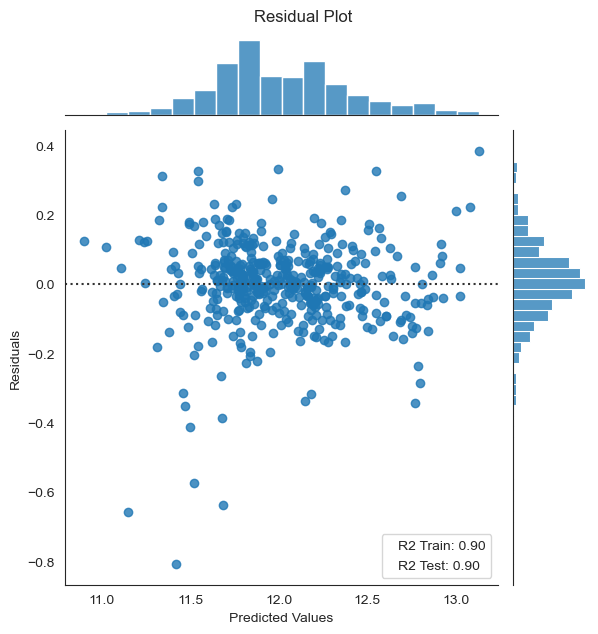

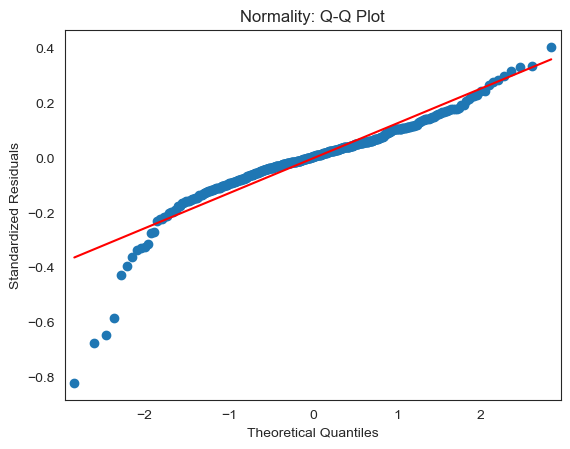

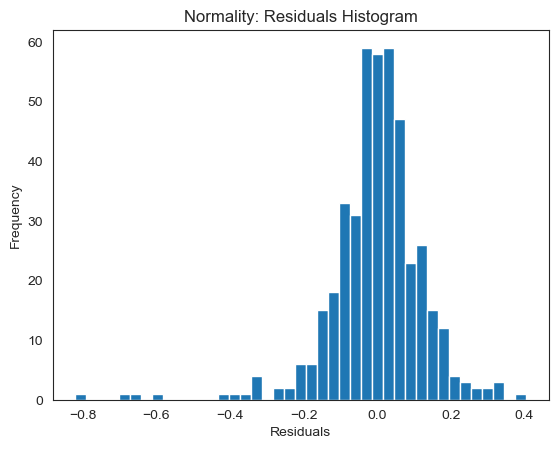

Shapiro-Wilk Test:
Test Statistic: 0.8959783315658569
p-value: 1.10381839675273e-16
The residuals do not appear to be normally distributed (reject H0)


In [124]:
residual_plot(y_val, y_pred_val_lgbm_ts, r2_train=r2_train_lgbm_ts, r2_test=r2_lgbm_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

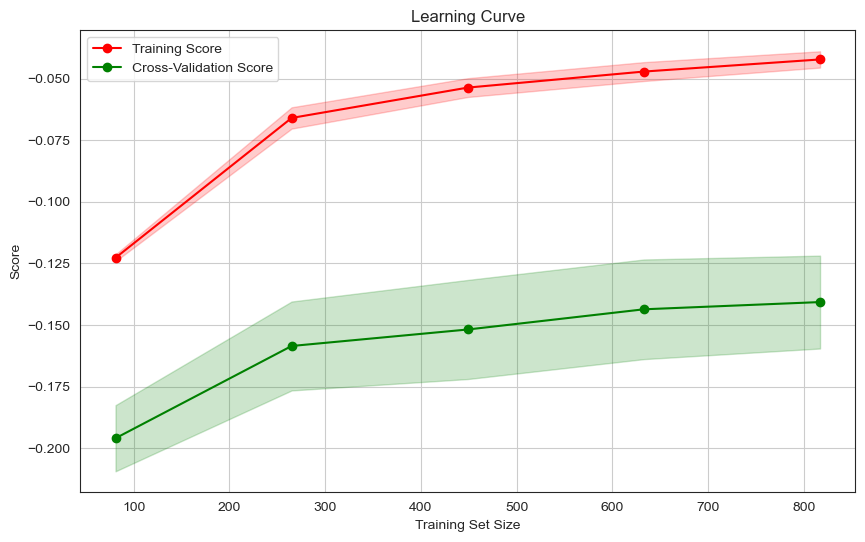

In [125]:
plot_learning_curve(pipe_lgbm_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [126]:
%%time

#define ML models
lgbm = LGBMRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_lgbm_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="lgbm", model=lgbm)

# Define the hyperparameters to search over
param_grid_lgbm = {
    'lgbm__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'lgbm__max_depth': [3, 5, 7, 9],
    'lgbm__n_estimators': [50, 100, 200, 500],
    'lgbm__subsample': [0.5, 0.7, 1.0],
    'lgbm__colsample_bytree': [0.5, 0.7, 1.0]
}

# Perform randomized search with 5-fold cross-validation
random_search_lgbm_ts_pca = RandomizedSearchCV(estimator=pipe_lgbm_ts_pca, param_distributions=param_grid_lgbm, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_lgbm_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 22 s
Wall time: 3min 4s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                                                'KitchenAbvGr',
                                                                                'TotRmsAbvGrd',
                                                                                'Fireplaces',
                                                                                'GarageCars',
                                                                                'MoSold',
                                                                                'YrSold'])])),
                                             ('lgbm', LGBMRegressor())]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'lgbm__colsample_bytree': [0.5, 0.7,
                                                                   1.0],
                                        'lgbm__learning_rate': [0.01, 0.05, 0.1,
                                                                0.2],
                                        'lgbm__max_depth': [3, 5, 7, 9],
                                        'lgbm__n_estimators': [50, 100, 200,
                                                               500],
                                        'lgbm__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [127]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lgbm_ts_pca = round(random_search_lgbm_ts_pca.cv_results_["std_test_score"][random_search_lgbm_ts_pca.best_index_], 4)
print("Best hyperparameters: ", random_search_lgbm_ts_pca.best_params_)
print("Best score: ", random_search_lgbm_ts_pca.best_score_, f" ({std_lgbm_ts_pca})")

# valuate model on validation data
r2_train_lgbm_ts_pca = random_search_lgbm_ts_pca.score(X_val, y_val)

best_model_lgbm_ts_pca = random_search_lgbm_ts_pca.best_estimator_
y_pred_val_lgbm_ts_pca = best_model_lgbm_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_lgbm_ts_pca, mse_lgbm_ts_pca, rmse_lgbm_ts_pca, r2_lgbm_ts_pca, rmsle_lgbm_ts_pca, mape_lgbm_ts_pca = evaluate_model(y_pred_val_lgbm_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lgbm_ts_pca"
evaluation_metrics['best_params_'] = random_search_lgbm_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_lgbm_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_lgbm_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lgbm_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lgbm_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_lgbm_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lgbm_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lgbm_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lgbm__subsample': 0.5, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 5, 'lgbm__learning_rate': 0.05, 'lgbm__colsample_bytree': 0.7}
Best score:  0.8779660540267489  (0.0254)
model: lgbm_ts_pca
best_params_: {'lgbm__subsample': 0.5, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 5, 'lgbm__learning_rate': 0.05, 'lgbm__colsample_bytree': 0.7}
MAE: 17859.013902
MSE: 886194012.414839
RMSE: 29769.010941
R2_train: 0.883800
R2: 0.873003
RMSLE: 0.140402
MAPE: 10.208160


In [128]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_lgbm_ts_pca, mse_lgbm_ts_pca, rmse_lgbm_ts_pca, r2_lgbm_ts_pca, rmsle_lgbm_ts_pca, mape_lgbm_ts_pca = evaluate_model_log(y_pred_val_lgbm_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "lgbm_ts_pca"
evaluation_metrics_log['best_params_'] = random_search_lgbm_ts_pca.best_params_
evaluation_metrics_log['MAE'] = f'{mae_lgbm_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_lgbm_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_lgbm_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_lgbm_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_lgbm_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_lgbm_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_lgbm_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: lgbm_ts_pca
best_params_: {'lgbm__subsample': 0.5, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 5, 'lgbm__learning_rate': 0.05, 'lgbm__colsample_bytree': 0.7}
MAE: 0.099453
MSE: 0.019713
RMSE: 0.140402
R2_train: 0.883800
R2: 0.883800
RMSLE: 0.010973
MAPE: 0.833831


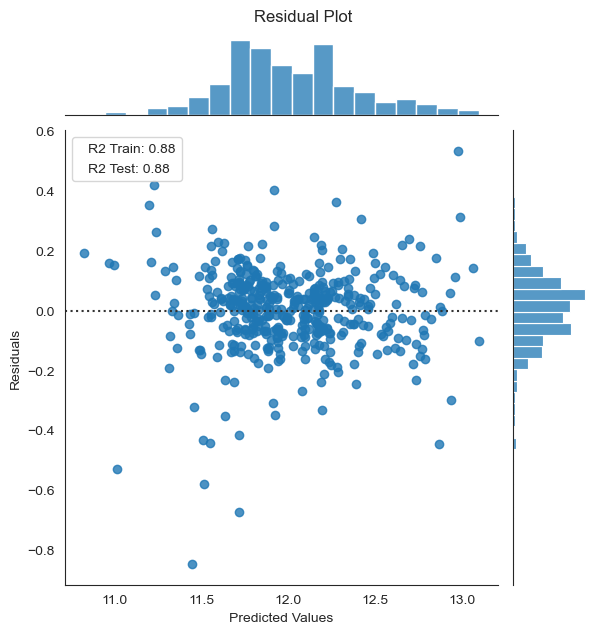

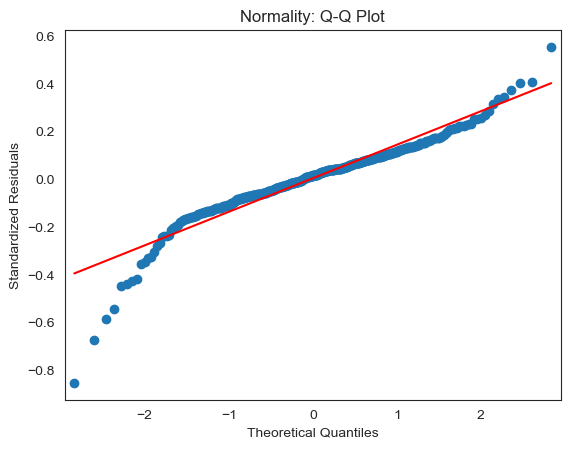

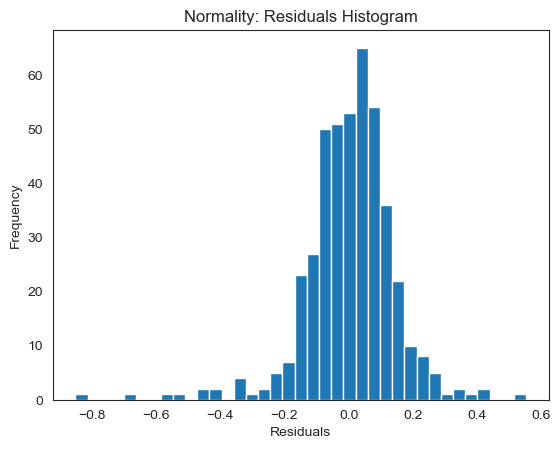

Shapiro-Wilk Test:
Test Statistic: 0.9218759536743164
p-value: 2.6132540210011164e-14
The residuals do not appear to be normally distributed (reject H0)


In [129]:
residual_plot(y_val, y_pred_val_lgbm_ts_pca, r2_train=r2_train_lgbm_ts_pca, r2_test=r2_lgbm_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

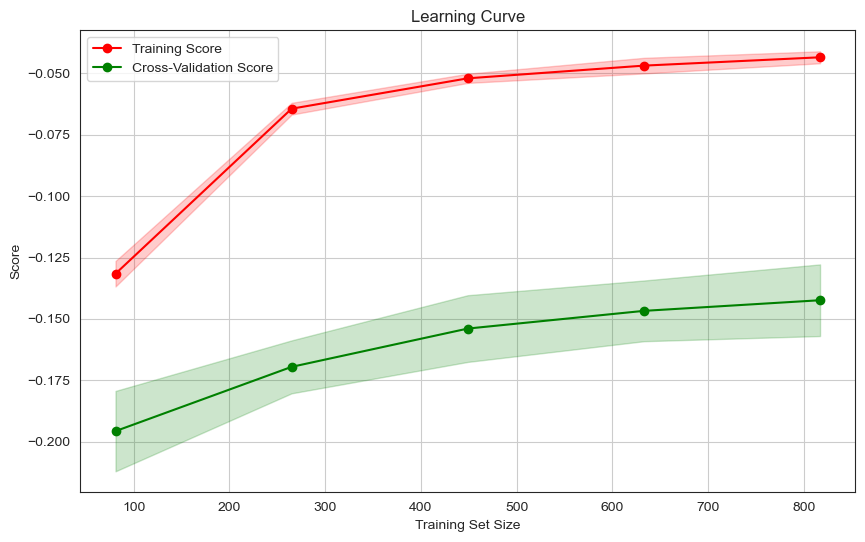

In [130]:
plot_learning_curve(pipe_lgbm_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## KNN Regressor
### With Transformer

In [131]:
#define ML models
knn = KNeighborsRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_knn_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="knn", model=knn)

# Define the hyperparameters to search over
param_grid_knn = {
    'knn__n_neighbors': np.arange(1, 31, 2),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2]
}

# Perform grid search with 5-fold cross-validation
grid_search_knn_tf = GridSearchCV(pipe_knn_tf, param_grid_knn, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_knn_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [132]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_knn_tf = round(grid_search_knn_tf.cv_results_["std_test_score"][grid_search_knn_tf.best_index_], 4)
print("Best hyperparameters: ", grid_search_knn_tf.best_params_)
print("Best score: ", grid_search_knn_tf.best_score_, f" ({std_knn_tf})")

# valuate model on validation data
r2_train_knn_tf = grid_search_knn_tf.score(X_val, y_val)

best_model_knn_tf = grid_search_knn_tf.best_estimator_
y_pred_val_knn_tf = best_model_knn_tf.predict(X_val)

# Compute the evaluation metrics
mae_knn_tf, mse_knn_tf, rmse_knn_tf, r2_knn_tf, rmsle_knn_tf, mape_knn_tf = evaluate_model(y_pred_val_knn_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "knn_tf"
evaluation_metrics['best_params_'] = grid_search_knn_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_knn_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_knn_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_knn_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_knn_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_knn_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_knn_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_knn_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}
Best score:  0.8176835308443351  (0.018)
model: knn_tf
best_params_: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}
MAE: 20936.444033
MSE: 1275144890.176282
RMSE: 35709.170953
R2_train: 0.833677
R2: 0.817265
RMSLE: 0.167975
MAPE: 11.681451


In [133]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_knn_tf, mse_knn_tf, rmse_knn_tf, r2_knn_tf, rmsle_knn_tf, mape_knn_tf = evaluate_model_log(y_pred_val_knn_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "knn_tf"
evaluation_metrics_log['best_params_'] = grid_search_knn_tf.best_params_
evaluation_metrics_log['MAE'] = f'{mae_knn_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_knn_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_knn_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_knn_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_knn_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_knn_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_knn_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: knn_tf
best_params_: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}
MAE: 0.113725
MSE: 0.028216
RMSE: 0.167975
R2_train: 0.833677
R2: 0.833677
RMSLE: 0.013103
MAPE: 0.950616


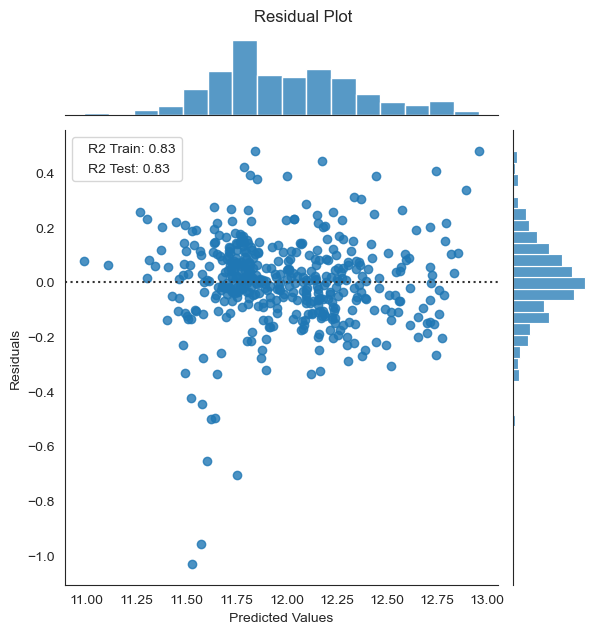

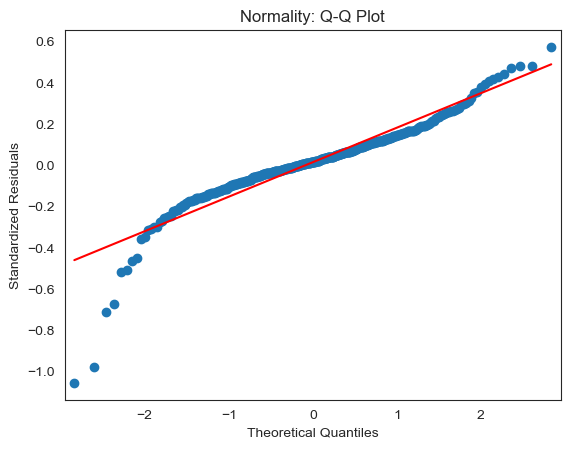

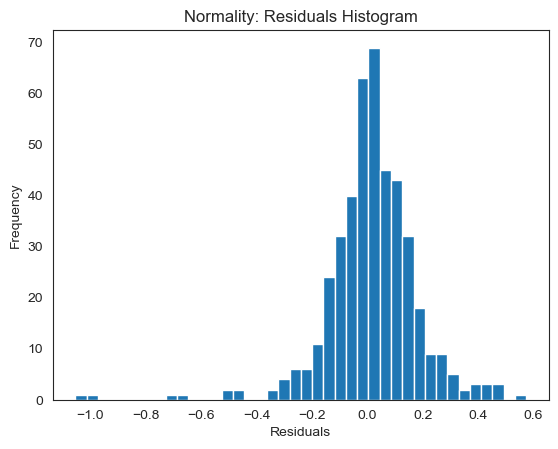

Shapiro-Wilk Test:
Test Statistic: 0.8996697664260864
p-value: 2.2572697478410097e-16
The residuals do not appear to be normally distributed (reject H0)


In [134]:
residual_plot(y_val, y_pred_val_knn_tf, r2_train=r2_train_knn_tf, r2_test=r2_knn_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

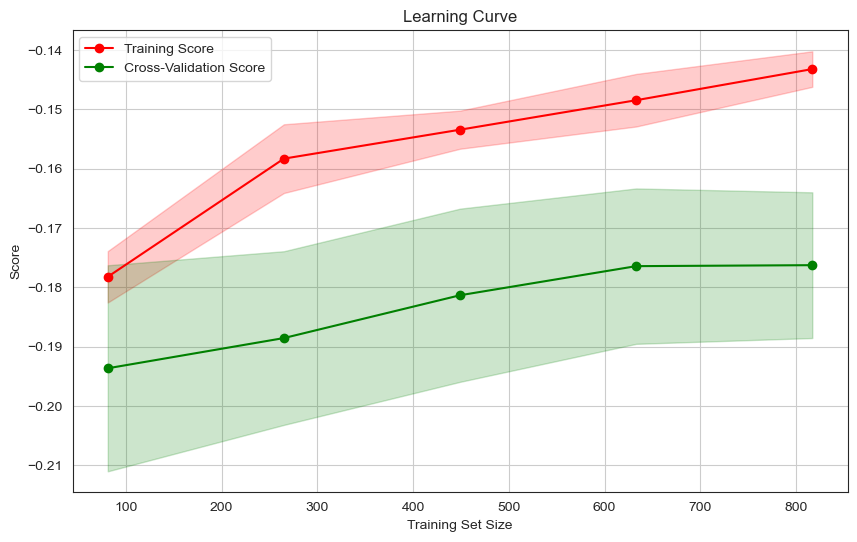

In [135]:
plot_learning_curve(pipe_knn_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [136]:
#define ML models
knn = KNeighborsRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_knn_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="knn", model=knn)

# Define the hyperparameters to search over
param_grid_knn = {
    'knn__n_neighbors': np.arange(1, 31, 2),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2]
}

# Perform grid search with 5-fold cross-validation
grid_search_knn_ts = GridSearchCV(pipe_knn_ts, param_grid_knn, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_knn_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [137]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_knn_ts = round(grid_search_knn_ts.cv_results_["std_test_score"][grid_search_knn_ts.best_index_], 4)
print("Best hyperparameters: ", grid_search_knn_ts.best_params_)
print("Best score: ", grid_search_knn_ts.best_score_, f" ({std_knn_ts})")

# valuate model on validation data
r2_train_knn_ts = grid_search_knn_ts.score(X_val, y_val)

best_model_knn_ts = grid_search_knn_ts.best_estimator_
y_pred_val_knn_ts = best_model_knn_ts.predict(X_val)

# Compute the evaluation metrics
mae_knn_ts, mse_knn_ts, rmse_knn_ts, r2_knn_ts, rmsle_knn_ts, mape_knn_ts = evaluate_model(y_pred_val_knn_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "knn_ts"
evaluation_metrics['best_params_'] = grid_search_knn_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_knn_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_knn_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_knn_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_knn_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_knn_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_knn_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_knn_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'distance'}
Best score:  0.816516209613542  (0.0163)
model: knn_ts
best_params_: {'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'distance'}
MAE: 20962.374151
MSE: 1317361469.104206
RMSE: 36295.474499
R2_train: 0.831794
R2: 0.811215
RMSLE: 0.168924
MAPE: 11.693259


In [138]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_knn_ts, mse_knn_ts, rmse_knn_ts, r2_knn_ts, rmsle_knn_ts, mape_knn_ts = evaluate_model_log(y_pred_val_knn_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "knn_ts"
evaluation_metrics_log['best_params_'] = grid_search_knn_ts.best_params_
evaluation_metrics_log['MAE'] = f'{mae_knn_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_knn_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_knn_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_knn_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_knn_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_knn_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_knn_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: knn_ts
best_params_: {'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'distance'}
MAE: 0.113838
MSE: 0.028535
RMSE: 0.168924
R2_train: 0.831794
R2: 0.831794
RMSLE: 0.013170
MAPE: 0.951657


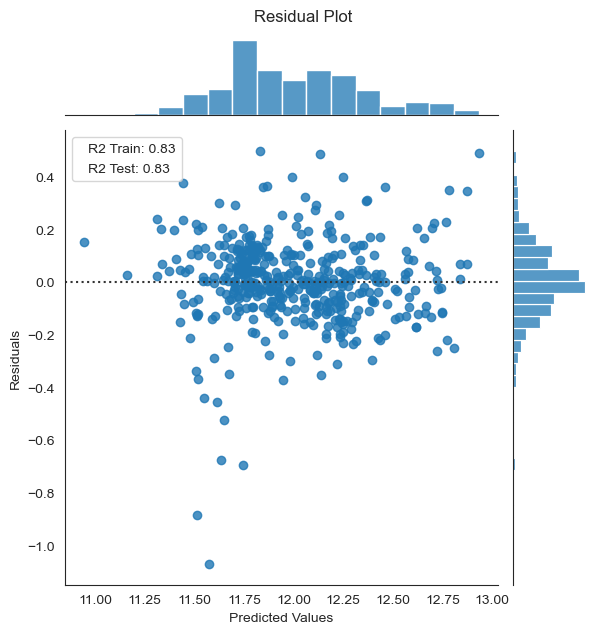

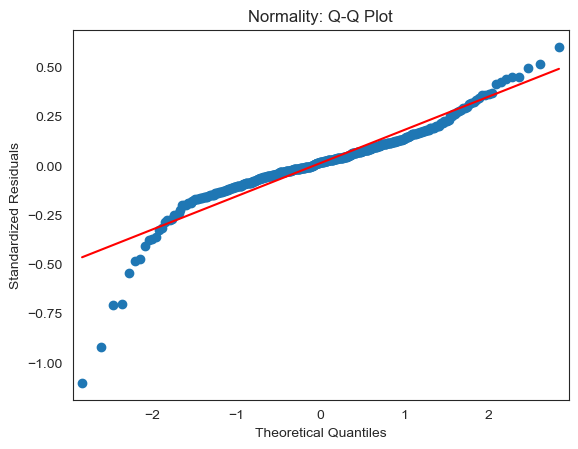

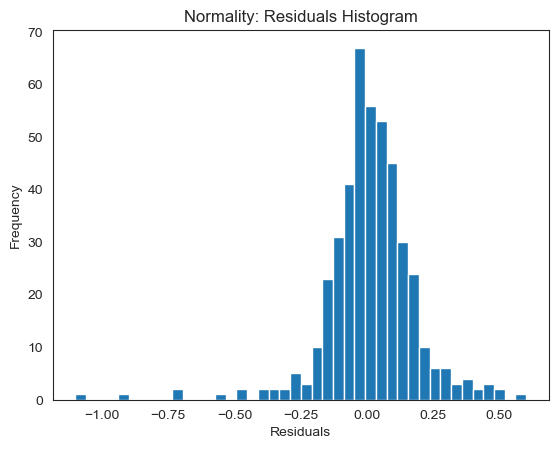

Shapiro-Wilk Test:
Test Statistic: 0.8977816700935364
p-value: 1.5619535039808574e-16
The residuals do not appear to be normally distributed (reject H0)


In [139]:
residual_plot(y_val, y_pred_val_knn_ts, r2_train=r2_train_knn_ts, r2_test=r2_knn_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

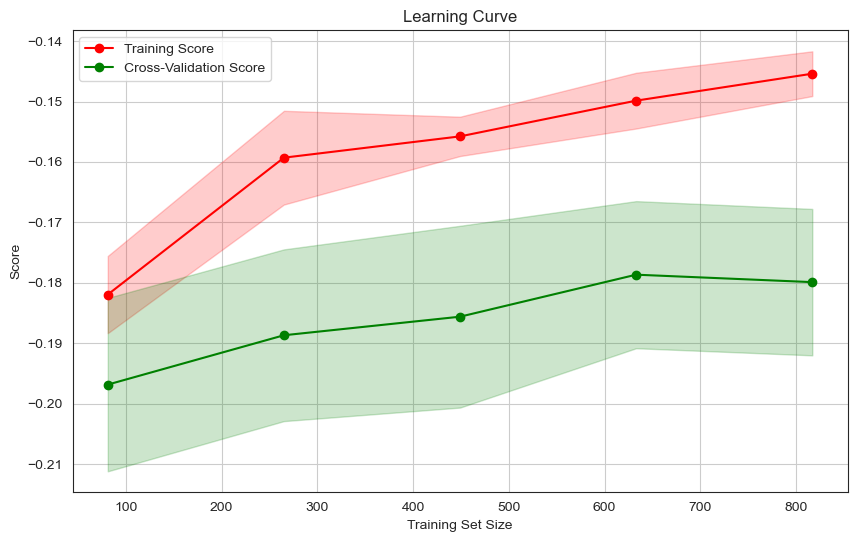

In [140]:
plot_learning_curve(pipe_knn_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [141]:
#define ML models
knn = KNeighborsRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_knn_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="knn", model=knn)

# Define the hyperparameters to search over
param_grid_knn = {
    'knn__n_neighbors': np.arange(1, 31, 2),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2]
}

# Perform grid search with 5-fold cross-validation
grid_search_knn_ts_pca = GridSearchCV(pipe_knn_ts_pca, param_grid_knn, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_knn_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [142]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_knn_ts_pca = round(grid_search_knn_ts_pca.cv_results_["std_test_score"][grid_search_knn_ts_pca.best_index_], 4)
print("Best hyperparameters: ", grid_search_knn_ts_pca.best_params_)
print("Best score: ", grid_search_knn_ts_pca.best_score_, f" ({std_knn_ts_pca})")

# valuate model on validation data
r2_train_knn_ts_pca = grid_search_knn_ts_pca.score(X_val, y_val)

best_model_knn_ts_pca = grid_search_knn_ts_pca.best_estimator_
y_pred_val_knn_ts_pca = best_model_knn_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_knn_ts_pca, mse_knn_ts_pca, rmse_knn_ts_pca, r2_knn_ts_pca, rmsle_knn_ts_pca, mape_knn_ts_pca = evaluate_model(y_pred_val_knn_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "knn_ts_pca"
evaluation_metrics['best_params_'] = grid_search_knn_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_knn_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_knn_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_knn_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_knn_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_knn_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_knn_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_knn_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'knn__n_neighbors': 17, 'knn__p': 2, 'knn__weights': 'distance'}
Best score:  0.799455614821845  (0.0142)
model: knn_ts_pca
best_params_: {'knn__n_neighbors': 17, 'knn__p': 2, 'knn__weights': 'distance'}
MAE: 22689.307824
MSE: 1516042621.518520
RMSE: 38936.391994
R2_train: 0.819419
R2: 0.782743
RMSLE: 0.175027
MAPE: 12.534370


In [143]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_knn_ts_pca, mse_knn_ts_pca, rmse_knn_ts_pca, r2_knn_ts_pca, rmsle_knn_ts_pca, mape_knn_ts_pca = evaluate_model_log(y_pred_val_knn_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "knn_ts_pca"
evaluation_metrics_log['best_params_'] = grid_search_knn_ts_pca.best_params_
evaluation_metrics_log['MAE'] = f'{mae_knn_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_knn_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_knn_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_knn_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_knn_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_knn_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_knn_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: knn_ts_pca
best_params_: {'knn__n_neighbors': 17, 'knn__p': 2, 'knn__weights': 'distance'}
MAE: 0.122219
MSE: 0.030635
RMSE: 0.175027
R2_train: 0.819419
R2: 0.819419
RMSLE: 0.013595
MAPE: 1.020644


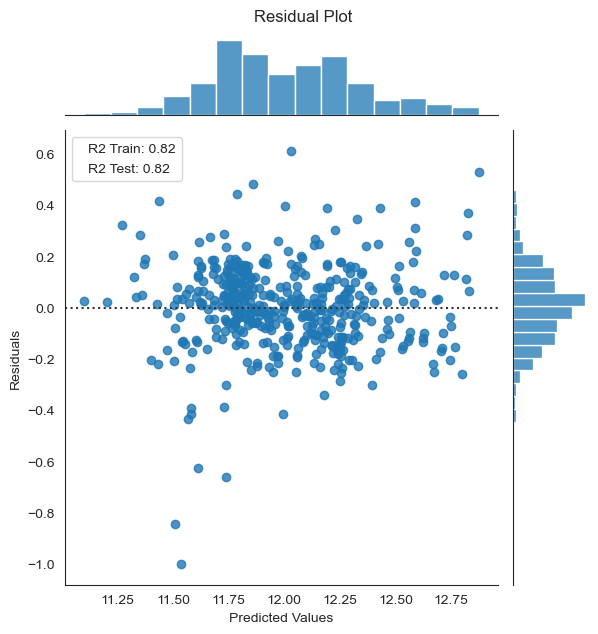

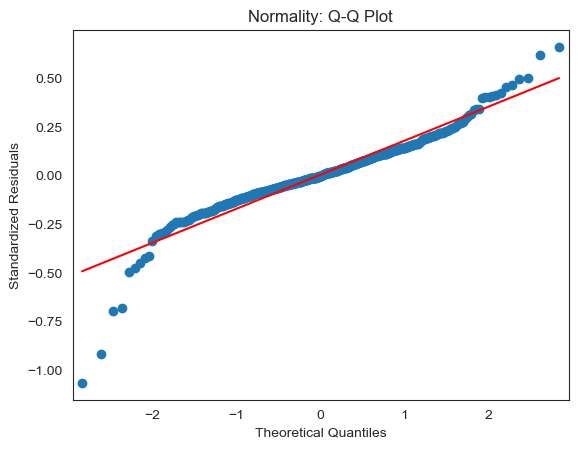

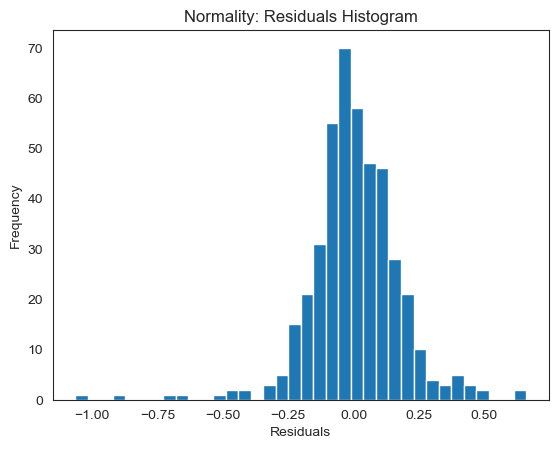

Shapiro-Wilk Test:
Test Statistic: 0.9249350428581238
p-value: 5.4016588700881926e-14
The residuals do not appear to be normally distributed (reject H0)


In [144]:
residual_plot(y_val, y_pred_val_knn_ts_pca, r2_train=r2_train_knn_ts_pca, r2_test=r2_knn_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

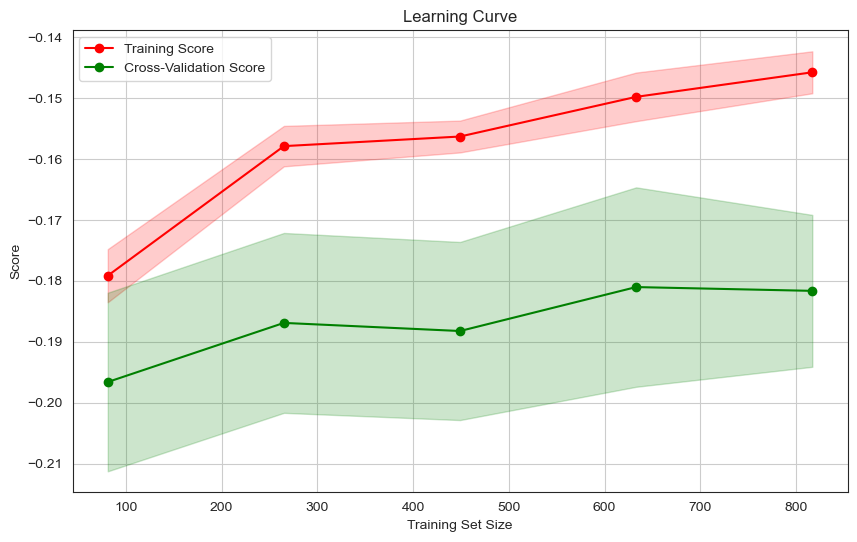

In [145]:
plot_learning_curve(pipe_knn_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## SVR
### With Transformer

In [146]:
#define ML models
svr = SVR()

#define the pipeline that includes the preprocessor and the estimator
pipe_svr_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="svr", model=svr)

# Define the hyperparameters to search over. 'Linear kernel' took so long time
param_grid_svr = {'svr__C': [10**i for i in range(-3, 4)],
                  'svr__gamma': [10**i for i in range(-3, 4)],
                  'svr__kernel': ['rbf', 'poly']
}

# Perform grid search with 5-fold cross-validation
grid_search_svr_tf = GridSearchCV(pipe_svr_tf, param_grid_svr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_svr_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__kernel': ['rbf', 'poly']},
             scoring='r2', verbose=1)

In [147]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_svr_tf = round(grid_search_svr_tf.cv_results_["std_test_score"][grid_search_svr_tf.best_index_], 4)
print("Best hyperparameters: ", grid_search_svr_tf.best_params_)
print("Best score: ", grid_search_svr_tf.best_score_, f" ({std_svr_tf})")

# valuate model on validation data
r2_train_svr_tf = grid_search_svr_tf.score(X_val, y_val)

best_model_svr_tf = grid_search_svr_tf.best_estimator_
y_pred_val_svr_tf = best_model_svr_tf.predict(X_val)

# Compute the evaluation metrics
mae_svr_tf, mse_svr_tf, rmse_svr_tf, r2_svr_tf, rmsle_svr_tf, mape_svr_tf = evaluate_model(y_pred_val_svr_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "svr_tf"
evaluation_metrics['best_params_'] = grid_search_svr_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_svr_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_svr_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_svr_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_svr_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_svr_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_svr_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_svr_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
Best score:  0.8852844255318508  (0.0234)
model: svr_tf
best_params_: {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
MAE: 16039.905345
MSE: 779369349.380200
RMSE: 27917.187347
R2_train: 0.895046
R2: 0.888312
RMSLE: 0.133435
MAPE: 9.315092


In [148]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_svr_tf, mse_svr_tf, rmse_svr_tf, r2_svr_tf, rmsle_svr_tf, mape_svr_tf = evaluate_model_log(y_pred_val_svr_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "svr_tf"
evaluation_metrics_log['best_params_'] = grid_search_svr_tf.best_params_
evaluation_metrics_log['MAE'] = f'{mae_svr_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_svr_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_svr_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_svr_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_svr_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_svr_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_svr_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: svr_tf
best_params_: {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
MAE: 0.090208
MSE: 0.017805
RMSE: 0.133435
R2_train: 0.895046
R2: 0.895046
RMSLE: 0.010474
MAPE: 0.757593


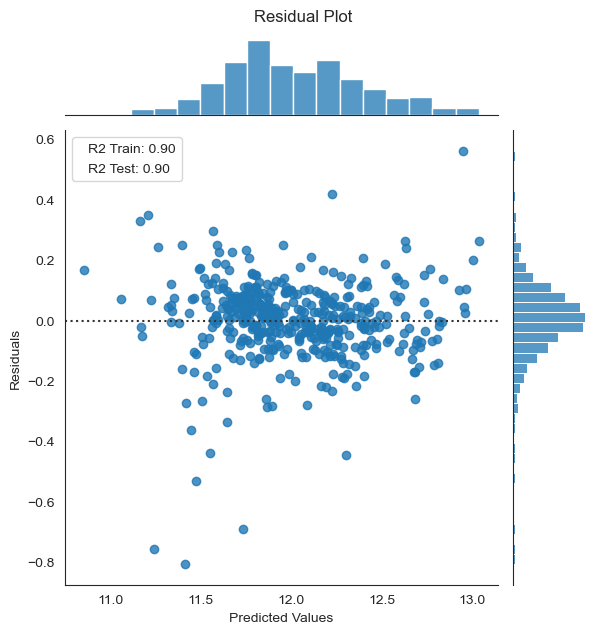

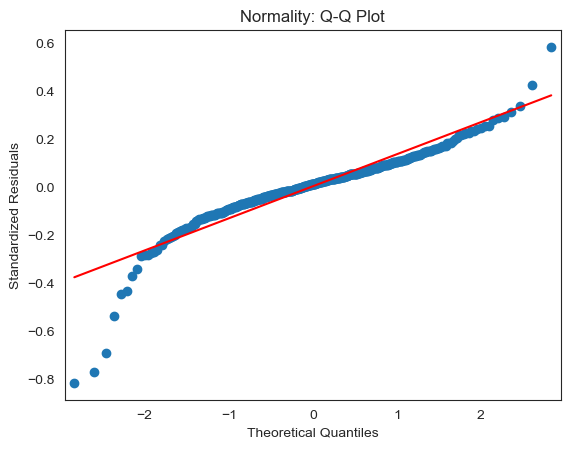

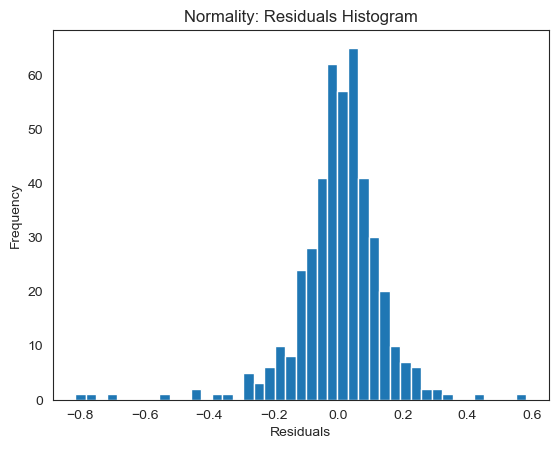

Shapiro-Wilk Test:
Test Statistic: 0.8910702466964722
p-value: 4.383620826039864e-17
The residuals do not appear to be normally distributed (reject H0)


In [149]:
residual_plot(y_val, y_pred_val_svr_tf, r2_train=r2_train_svr_tf, r2_test=r2_svr_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

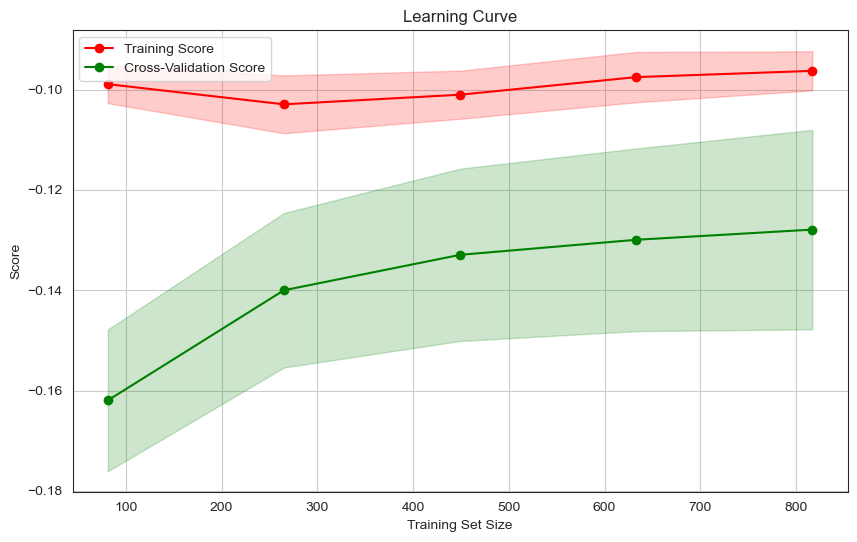

In [150]:
plot_learning_curve(pipe_svr_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [151]:
#define ML models
svr = SVR()

#define the pipeline that includes the preprocessor and the estimator
pipe_svr_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="svr", model=svr)

# Define the hyperparameters to search over
param_grid_svr = {'svr__C': [10**i for i in range(-3, 4)],
                  'svr__gamma': [10**i for i in range(-3, 4)],
                  'svr__kernel': ['rbf', 'poly']
}

# Perform grid search with 5-fold cross-validation
grid_search_svr_ts = GridSearchCV(pipe_svr_ts, param_grid_svr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_svr_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__kernel': ['rbf', 'poly']},
             scoring='r2', verbose=1)

In [152]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_svr_ts = round(grid_search_svr_ts.cv_results_["std_test_score"][grid_search_svr_ts.best_index_], 4)
print("Best hyperparameters: ", grid_search_svr_ts.best_params_)
print("Best score: ", grid_search_svr_ts.best_score_, f" ({std_svr_ts})")

# valuate model on validation data
r2_train_svr_ts = grid_search_svr_ts.score(X_val, y_val)

best_model_svr_ts = grid_search_svr_ts.best_estimator_
y_pred_val_svr_ts = best_model_svr_ts.predict(X_val)

# Compute the evaluation metrics
mae_svr_ts, mse_svr_ts, rmse_svr_ts, r2_svr_ts, rmsle_svr_ts, mape_svr_ts = evaluate_model(y_pred_val_svr_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "svr_ts"
evaluation_metrics['best_params_'] = grid_search_svr_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_svr_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_svr_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_svr_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_svr_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_svr_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_svr_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_svr_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
Best score:  0.8873833965124873  (0.0233)
model: svr_ts
best_params_: {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
MAE: 16157.628991
MSE: 780126332.738781
RMSE: 27930.741715
R2_train: 0.895738
R2: 0.888204
RMSLE: 0.132994
MAPE: 9.350080


In [153]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_svr_ts, mse_svr_ts, rmse_svr_ts, r2_svr_ts, rmsle_svr_ts, mape_svr_ts = evaluate_model_log(y_pred_val_svr_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "svr_ts"
evaluation_metrics_log['best_params_'] = grid_search_svr_ts.best_params_
evaluation_metrics_log['MAE'] = f'{mae_svr_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_svr_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_svr_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_svr_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_svr_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_svr_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_svr_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: svr_ts
best_params_: {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
MAE: 0.090762
MSE: 0.017687
RMSE: 0.132994
R2_train: 0.895738
R2: 0.895738
RMSLE: 0.010428
MAPE: 0.761929


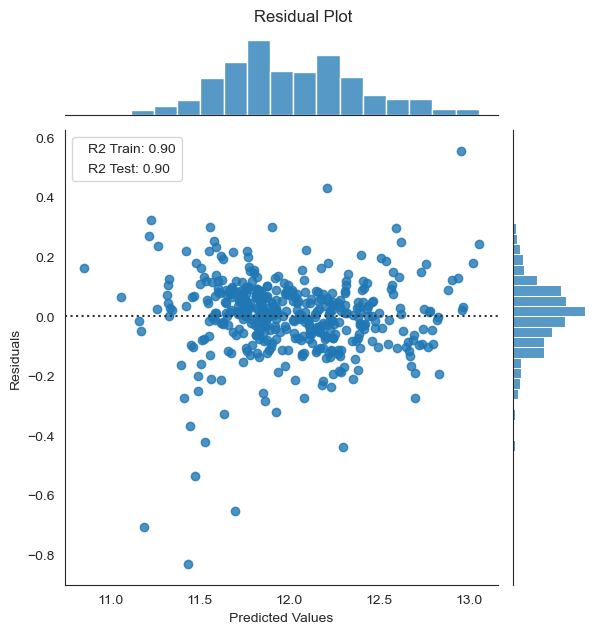

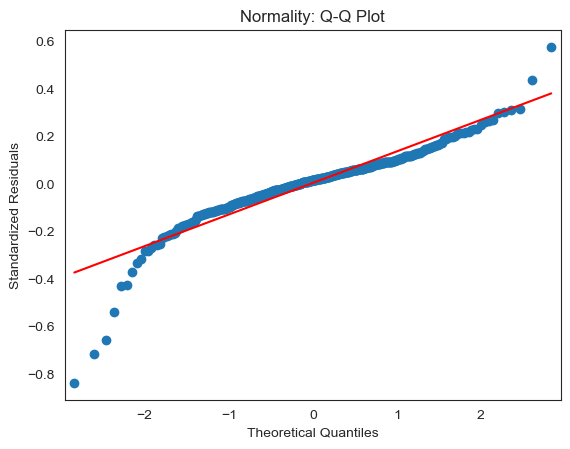

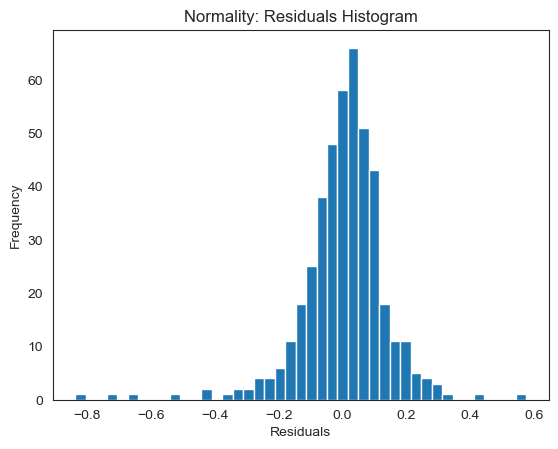

Shapiro-Wilk Test:
Test Statistic: 0.8972598910331726
p-value: 1.4120450835801993e-16
The residuals do not appear to be normally distributed (reject H0)


In [154]:
residual_plot(y_val, y_pred_val_svr_ts, r2_train=r2_train_svr_ts, r2_test=r2_svr_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

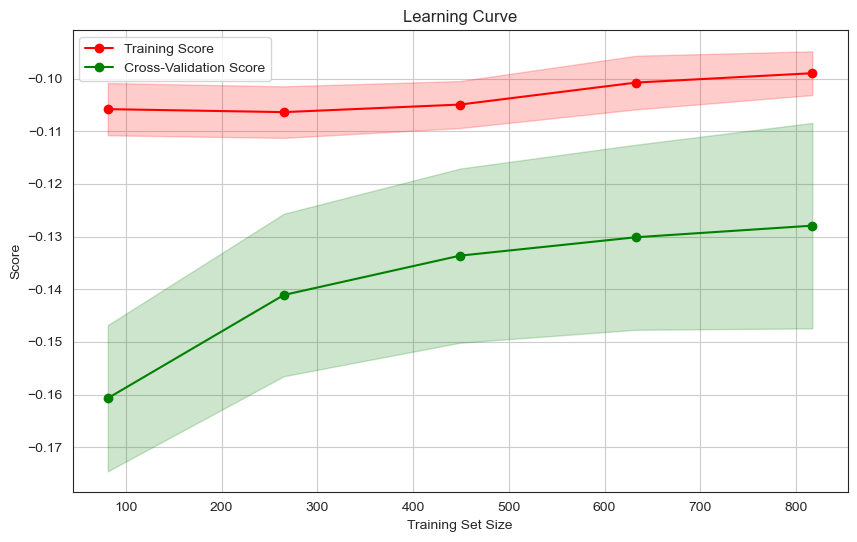

In [155]:
plot_learning_curve(pipe_svr_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [156]:
#define ML models
svr = SVR()

#define the pipeline that includes the preprocessor and the estimator
pipe_svr_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="svr", model=svr)

# Define the hyperparameters to search over
param_grid_svr = {'svr__C': [10**i for i in range(-3, 4)],
                  'svr__gamma': [10**i for i in range(-3, 4)],
                  'svr__kernel': ['rbf', 'poly']
}

# Perform grid search with 5-fold cross-validation
grid_search_svr_ts_pca = GridSearchCV(pipe_svr_ts_pca, param_grid_svr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_svr_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__kernel': ['rbf', 'poly']},
             scoring='r2', verbose=1)

In [157]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_svr_ts_pca = round(grid_search_svr_ts_pca.cv_results_["std_test_score"][grid_search_svr_ts_pca.best_index_], 4)
print("Best hyperparameters: ", grid_search_svr_ts_pca.best_params_)
print("Best score: ", grid_search_svr_ts_pca.best_score_, f" ({std_svr_ts_pca})")

# valuate model on validation data
r2_train_svr_ts_pca = grid_search_svr_ts_pca.score(X_val, y_val)

best_model_svr_ts_pca = grid_search_svr_ts_pca.best_estimator_
y_pred_val_svr_ts_pca = best_model_svr_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_svr_ts_pca, mse_svr_ts_pca, rmse_svr_ts_pca, r2_svr_ts_pca, rmsle_svr_ts_pca, mape_svr_ts_pca = evaluate_model(y_pred_val_svr_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "svr_ts_pca"
evaluation_metrics['best_params_'] = grid_search_svr_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_svr_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_svr_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_svr_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_svr_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_svr_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_svr_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_svr_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
Best score:  0.8826169627937072  (0.0202)
model: svr_ts_pca
best_params_: {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
MAE: 17558.898312
MSE: 924062351.257362
RMSE: 30398.393893
R2_train: 0.883963
R2: 0.867577
RMSLE: 0.140303
MAPE: 10.058623


In [158]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_svr_ts_pca, mse_svr_ts_pca, rmse_svr_ts_pca, r2_svr_ts_pca, rmsle_svr_ts_pca, mape_svr_ts_pca = evaluate_model_log(y_pred_val_svr_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "svr_ts_pca"
evaluation_metrics_log['best_params_'] = grid_search_svr_ts_pca.best_params_
evaluation_metrics_log['MAE'] = f'{mae_svr_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_svr_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_svr_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_svr_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_svr_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_svr_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_svr_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: svr_ts_pca
best_params_: {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
MAE: 0.097342
MSE: 0.019685
RMSE: 0.140303
R2_train: 0.883963
R2: 0.883963
RMSLE: 0.010971
MAPE: 0.816385


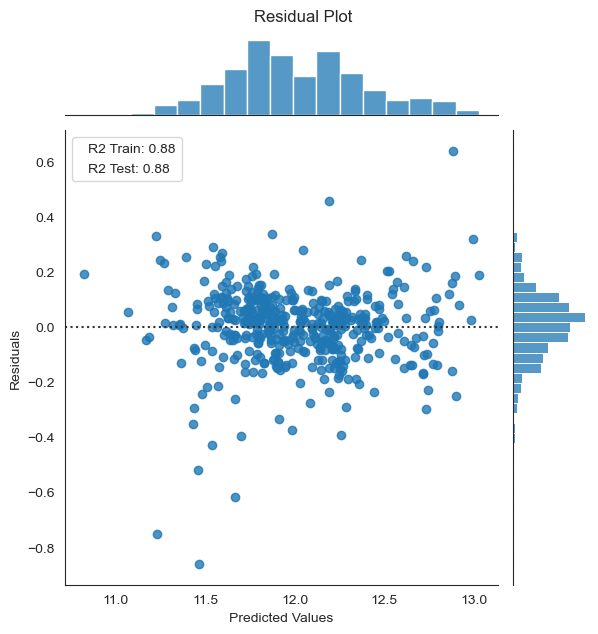

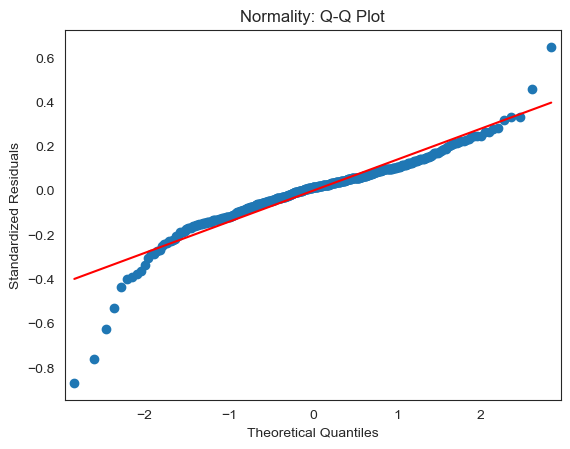

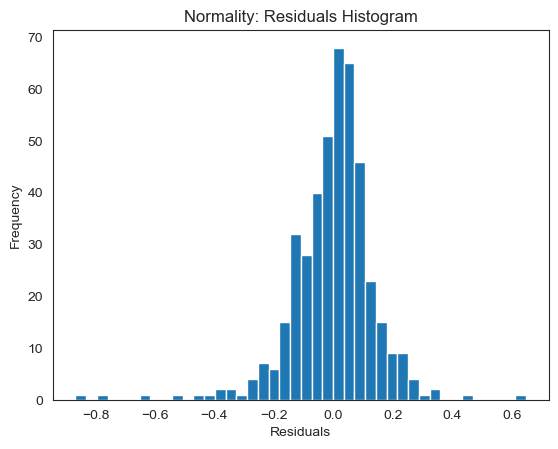

Shapiro-Wilk Test:
Test Statistic: 0.912006139755249
p-value: 2.8502953019056377e-15
The residuals do not appear to be normally distributed (reject H0)


In [159]:
residual_plot(y_val, y_pred_val_svr_ts_pca, r2_train=r2_train_svr_ts_pca, r2_test=r2_svr_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

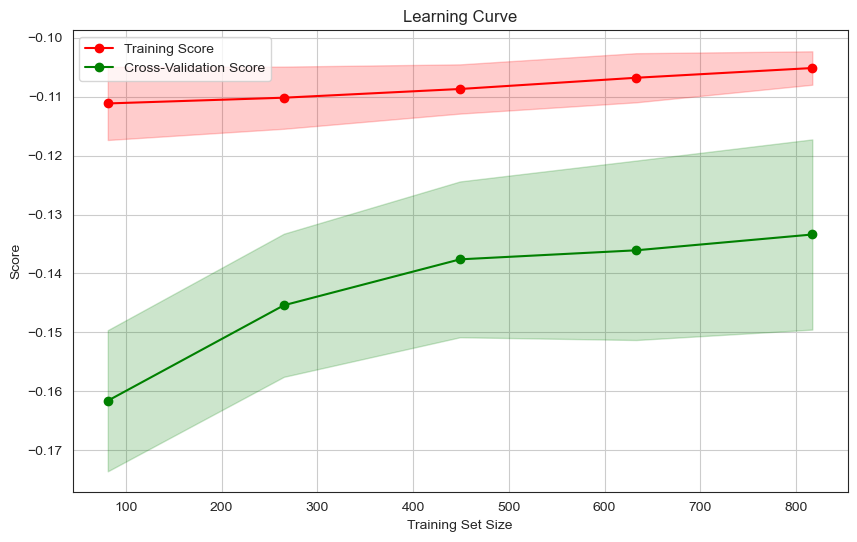

In [160]:
plot_learning_curve(pipe_svr_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Voting Regressor

- linreg ts pca
- lasso tf
- lgbm ts
- gb ts

In [168]:
from sklearn.ensemble import VotingRegressor

In [165]:
random_search_gb_ts.best_params_

{'gb__subsample': 0.7,
 'gb__n_estimators': 500,
 'gb__min_samples_split': 2,
 'gb__min_samples_leaf': 2,
 'gb__max_depth': 5,
 'gb__loss': 'huber',
 'gb__learning_rate': 0.05}

In [169]:
%%time
model1 = pipe_linreg_ts_pca

model2 = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                            use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="svr", 
                         model=SVR(
                             C = grid_search_svr_tf.best_params_["svr__C"],
                             gamma = grid_search_svr_tf.best_params_["svr__gamma"],
                             kernel = grid_search_svr_tf.best_params_["svr__kernel"]
                         )
                        )

model3 = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="gb", 
                         model=GradientBoostingRegressor(
                             subsample = random_search_gb_ts.best_params_["gb__subsample"],
#                              reg_lambda = random_search_gb_ts.best_params_["gb__reg_lambda"],
#                              reg_alpha = random_search_gb_ts.best_params_["gb__reg_alpha"],
                             n_estimators = random_search_gb_ts.best_params_["gb__n_estimators"],
                             min_samples_split= random_search_gb_ts.best_params_["gb__min_samples_split"],
                             min_samples_leaf= random_search_gb_ts.best_params_["gb__min_samples_leaf"],
                             max_depth = random_search_gb_ts.best_params_["gb__max_depth"],
                             learning_rate = random_search_gb_ts.best_params_["gb__learning_rate"],
#                              gamma = random_search_gb_ts.best_params_["gb__gamma"],
#                              colsample_bytree = random_search_gb_ts.best_params_["gb__colsample_bytree"],
                             loss= random_search_gb_ts.best_params_["gb__loss"]
                         )
                        )

model4 = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lgbm", 
                         model=LGBMRegressor(
                             subsample=random_search_lgbm_ts.best_params_["lgbm__subsample"],
                             n_estimators=random_search_lgbm_ts.best_params_["lgbm__n_estimators"],
                             max_depth=random_search_lgbm_ts.best_params_["lgbm__max_depth"],
                             learning_rate=random_search_lgbm_ts.best_params_["lgbm__learning_rate"],
                             colsample_bytree=random_search_lgbm_ts.best_params_["lgbm__colsample_bytree"]
                         )
                        )

model5 = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lasso", 
                         model=Lasso(alpha=grid_search_lasso_tf.best_params_["lasso__alpha"])
                        )

# Create the voting Regressor within a Pipeline
pipe_voting_reg = make_pipeline(
    VotingRegressor(estimators=[('lr', model1), 
#                                 ('svr', model2), 
                                ('gb', model3),
                                ('lgb', model4),
                                ('lasso', model5)
                               ])
)

# Fit the voting Regressor Pipeline to your training data
# voting_regressor_pipeline.fit(X_train, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_voting_reg, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

RMSE: 0.13 +/- 0.01
CPU times: total: 33.5 s
Wall time: 57.8 s


29468
29602
28985


In [175]:
evaluation_metrics = {}

pipe_voting_reg.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
voting_reg_pred = pipe_voting_reg.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_voting_reg = pipe_voting_reg.score(X_train_val, y_train_val)

# Compute the evaluation metrics
mae_voting_reg, mse_voting_reg, rmse_voting_reg, r2_voting_reg, rmsle_voting_reg, mape_voting_reg = evaluate_model(voting_reg_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "voting_reg"
evaluation_metrics['MAE'] = f'{mae_voting_reg:.6f}'
evaluation_metrics['MSE'] = f'{mse_voting_reg:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_voting_reg:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_voting_reg:.6f}'
evaluation_metrics['R2'] = f'{r2_voting_reg:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_voting_reg:.6f}'
evaluation_metrics['MAPE'] = f'{mape_voting_reg:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: voting_reg
MAE: 14478.220559
MSE: 616473530.328355
RMSE: 24828.885000
R2_train: 0.964984
R2: 0.911656
RMSLE: 0.120918
MAPE: 8.400106


In [176]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_voting_reg, mse_voting_reg, rmse_voting_reg, r2_voting_reg, rmsle_voting_reg, mape_voting_reg = evaluate_model_log(voting_reg_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "voting_reg"
evaluation_metrics_log['MAE'] = f'{mae_voting_reg:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_voting_reg:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_voting_reg:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_voting_reg:.6f}'
evaluation_metrics_log['R2'] = f'{r2_voting_reg:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_voting_reg:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_voting_reg:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: voting_reg
MAE: 0.081387
MSE: 0.014536
RMSE: 0.120567
R2_train: 0.964529
R2: 0.914313
RMSLE: 0.009468
MAPE: 0.683644


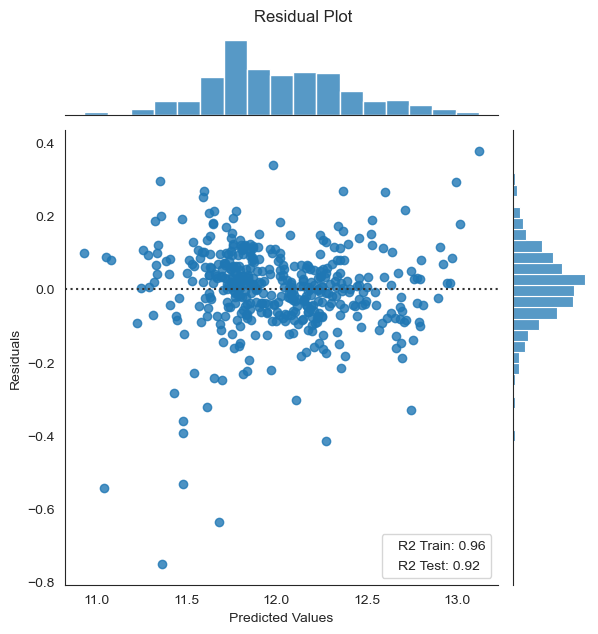

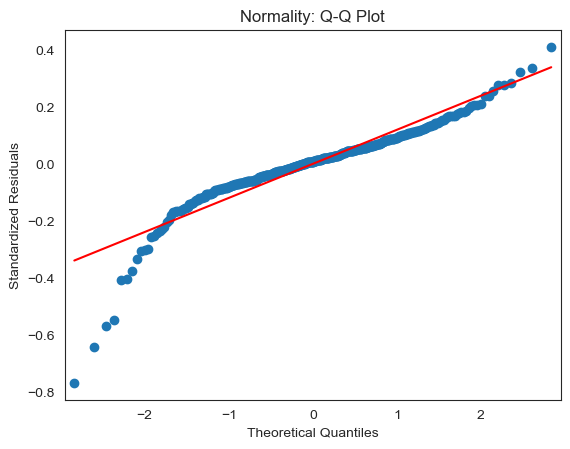

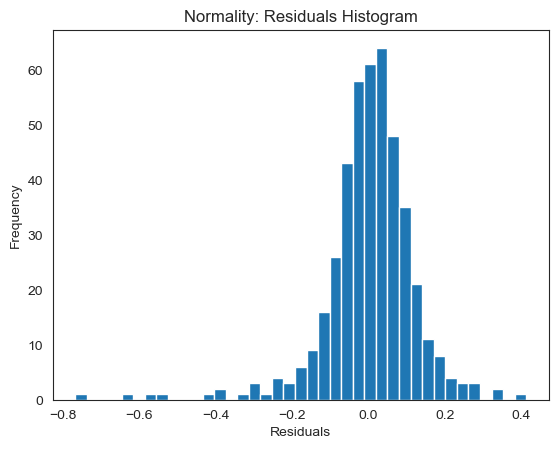

Shapiro-Wilk Test:
Test Statistic: 0.8887870907783508
p-value: 2.881940598398846e-17
The residuals do not appear to be normally distributed (reject H0)


In [173]:
residual_plot(y_val, voting_reg_pred, r2_train=r2_train_voting_reg, r2_test=r2_voting_reg)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

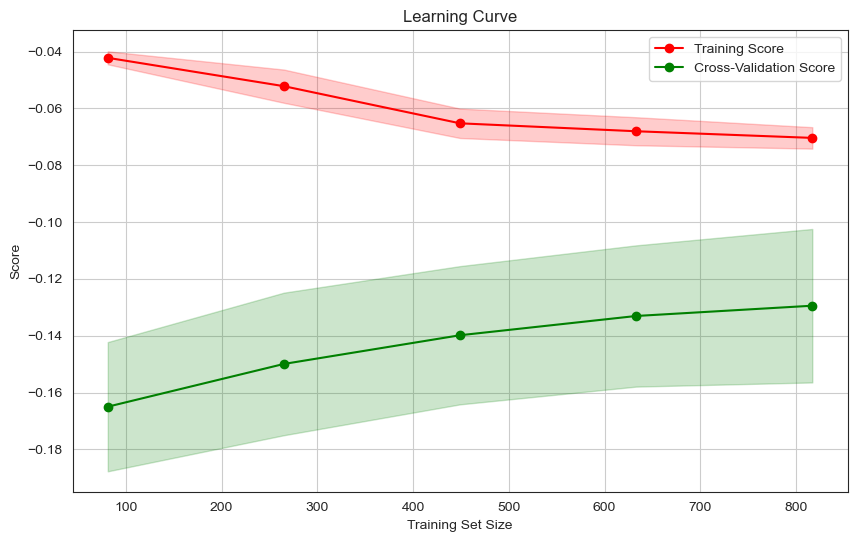

In [174]:
plot_learning_curve(pipe_voting_reg, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Stacking Regressor

In [181]:
from sklearn.ensemble import StackingRegressor

In [232]:
%%time
model1 = pipe_linreg_ts_pca

model2 = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                            use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="svr", 
                         model=SVR(
                             C = grid_search_svr_tf.best_params_["svr__C"],
                             gamma = grid_search_svr_tf.best_params_["svr__gamma"],
                             kernel = grid_search_svr_tf.best_params_["svr__kernel"]
                         )
                        )

model3 = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="gb", 
                         model=GradientBoostingRegressor(
                             subsample = random_search_gb_ts.best_params_["gb__subsample"],
#                              reg_lambda = random_search_gb_ts.best_params_["gb__reg_lambda"],
#                              reg_alpha = random_search_gb_ts.best_params_["gb__reg_alpha"],
                             n_estimators = random_search_gb_ts.best_params_["gb__n_estimators"],
                             min_samples_split= random_search_gb_ts.best_params_["gb__min_samples_split"],
                             min_samples_leaf= random_search_gb_ts.best_params_["gb__min_samples_leaf"],
                             max_depth = random_search_gb_ts.best_params_["gb__max_depth"],
                             learning_rate = random_search_gb_ts.best_params_["gb__learning_rate"],
#                              gamma = random_search_gb_ts.best_params_["gb__gamma"],
#                              colsample_bytree = random_search_gb_ts.best_params_["gb__colsample_bytree"],
                             loss= random_search_gb_ts.best_params_["gb__loss"]
                         )
                        )

model4 = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lgbm", 
                         model=LGBMRegressor(
                             subsample=random_search_lgbm_ts.best_params_["lgbm__subsample"],
                             n_estimators=random_search_lgbm_ts.best_params_["lgbm__n_estimators"],
                             max_depth=random_search_lgbm_ts.best_params_["lgbm__max_depth"],
                             learning_rate=random_search_lgbm_ts.best_params_["lgbm__learning_rate"],
                             colsample_bytree=random_search_lgbm_ts.best_params_["lgbm__colsample_bytree"]
                         )
                        )

model5 = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lasso", 
                         model=Lasso(alpha=grid_search_lasso_tf.best_params_["lasso__alpha"])
                        )

# Create the stacking Regressor within a Pipeline
pipe_stacking_reg = make_pipeline(
    StackingRegressor(estimators=[('lr', model1), 
#                                 ('svr', model2), 
                                ('xgb', model3),
                                ('lgb', model4),
                                ('lasso', model5)
                                 ],
                      final_estimator=LinearRegression(), n_jobs=-1)
)

# Fit the stacking Regressor Pipeline to your training data
# pipe_stacking_reg.fit(X_train, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_stacking_reg, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

RMSE: 0.39 +/- 0.03
CPU times: total: 6.77 s
Wall time: 4min 29s


In [195]:
evaluation_metrics = {}

pipe_stacking_reg.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
stacking_reg = pipe_stacking_reg.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_stacking_reg = pipe_stacking_reg.score(X_train_val, y_train_val)

# Compute the evaluation metrics
mae_stacking_reg, mse_stacking_reg, rmse_stacking_reg, r2_stacking_reg, rmsle_stacking_reg, mape_stacking_reg = evaluate_model(stacking_reg, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "stacking_reg"
evaluation_metrics['MAE'] = f'{mae_stacking_reg:.6f}'
evaluation_metrics['MSE'] = f'{mse_stacking_reg:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_stacking_reg:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_stacking_reg:.6f}'
evaluation_metrics['R2'] = f'{r2_stacking_reg:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_stacking_reg:.6f}'
evaluation_metrics['MAPE'] = f'{mape_stacking_reg:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

model: stacking_reg
MAE: 14333.952065
MSE: 569362330.304315
RMSE: 23861.314513
R2_train: 0.970376
R2: 0.918407
RMSLE: 0.119886
MAPE: 8.376692


model: stacking_reg
MAE: 15470.606441
MSE: 649020026.598092
RMSE: 25475.871459
R2_train: 0.953706
R2: 0.906992
RMSLE: 0.127869
MAPE: 9.107975

In [196]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_stacking_reg, mse_stacking_reg, rmse_stacking_reg, r2_stacking_reg, rmsle_stacking_reg, mape_stacking_reg = evaluate_model_log(stacking_reg, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "stacking_reg"
evaluation_metrics_log['MAE'] = f'{mae_stacking_reg:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_stacking_reg:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_stacking_reg:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_stacking_reg:.6f}'
evaluation_metrics_log['R2'] = f'{r2_stacking_reg:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_stacking_reg:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_stacking_reg:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: stacking_reg
MAE: 0.081160
MSE: 0.014373
RMSE: 0.119886
R2_train: 0.970376
R2: 0.915277
RMSLE: 0.009427
MAPE: 0.682048


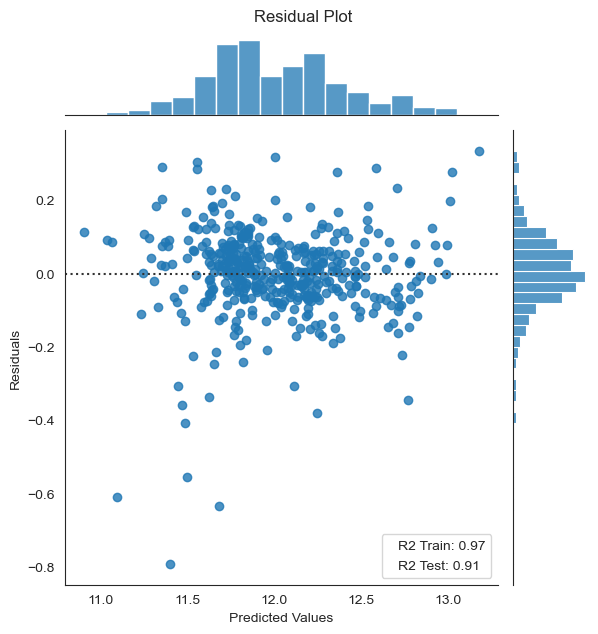

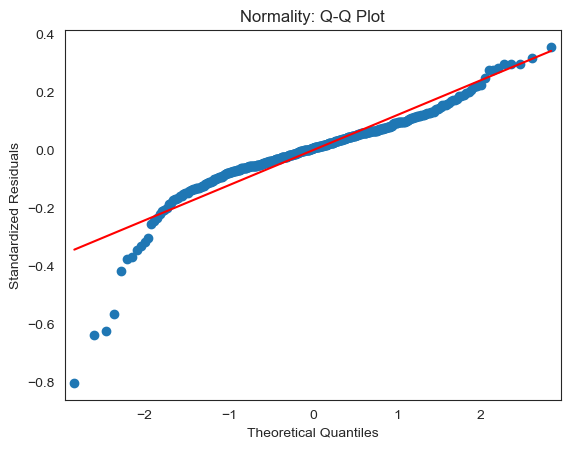

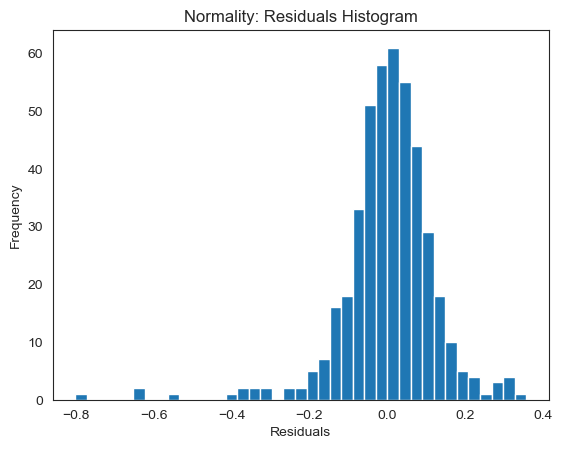

Shapiro-Wilk Test:
Test Statistic: 0.8814747929573059
p-value: 7.833238273477112e-18
The residuals do not appear to be normally distributed (reject H0)


In [187]:
residual_plot(y_val, stacking_reg, r2_train=r2_train_stacking_reg, r2_test=r2_stacking_reg)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning:

overflow encountered in reduce

C:\Users\fahmi\anaconda3\envs\ml_pro

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

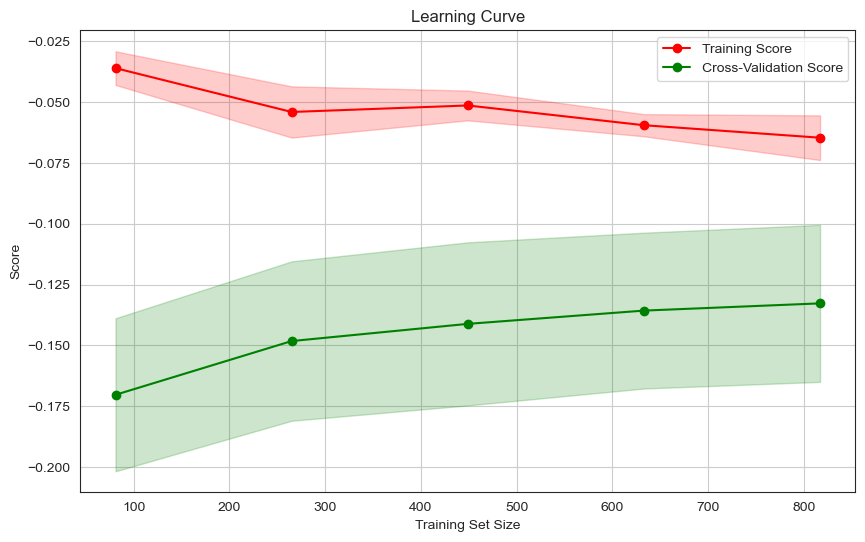

In [188]:
plot_learning_curve(pipe_stacking_reg, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Simple Averaging Model

In [193]:
class SimpleAveragingModel(BaseEstimator, TransformerMixin):
    def __init__(self, models):
        self.models = models
    
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models])
        return np.mean(predictions, axis=1)

In [225]:
%%time

# Create the list of models
models = [model1, model3, model4, model5]

# Create the Simple Averaging Model pipeline
pipe_simple_avg_model = Pipeline([
    ('averaging', SimpleAveragingModel(models))
])

# Fit the stacking Regressor Pipeline to your training data
# pipe_simple_avg_model.fit(X_train, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_simple_avg_model, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

RMSE: 0.13 +/- 0.01
CPU times: total: 37.2 s
Wall time: 1min 1s


In [226]:
evaluation_metrics = {}

pipe_simple_avg_model.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
simple_avg_model_pred = pipe_simple_avg_model.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_simple_avg_model = r2_score(y_train_val, pipe_simple_avg_model.predict(X_train_val))

# Compute the evaluation metrics
mae_simple_avg_model, mse_simple_avg_model, rmse_simple_avg_model, r2_simple_avg_model, rmsle_simple_avg_model, mape_simple_avg_model = evaluate_model(simple_avg_model_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "simple_avg_model"
evaluation_metrics['MAE'] = f'{mae_simple_avg_model:.6f}'
evaluation_metrics['MSE'] = f'{mse_simple_avg_model:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_simple_avg_model:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_simple_avg_model:.6f}'
evaluation_metrics['R2'] = f'{r2_simple_avg_model:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_simple_avg_model:.6f}'
evaluation_metrics['MAPE'] = f'{mape_simple_avg_model:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: simple_avg_model
MAE: 14372.363427
MSE: 602675455.298015
RMSE: 24549.449185
R2_train: 0.964455
R2: 0.913633
RMSLE: 0.119668
MAPE: 8.332512


In [227]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_simple_avg_model, mse_simple_avg_model, rmse_simple_avg_model, r2_simple_avg_model, rmsle_simple_avg_model, mape_simple_avg_model = evaluate_model_log(simple_avg_model_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "simple_avg_model"
evaluation_metrics_log['MAE'] = f'{mae_simple_avg_model:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_simple_avg_model:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_simple_avg_model:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_simple_avg_model:.6f}'
evaluation_metrics_log['R2'] = f'{r2_simple_avg_model:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_simple_avg_model:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_simple_avg_model:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: simple_avg_model
MAE: 0.080782
MSE: 0.014320
RMSE: 0.119668
R2_train: 0.964455
R2: 0.915585
RMSLE: 0.009398
MAPE: 0.678472


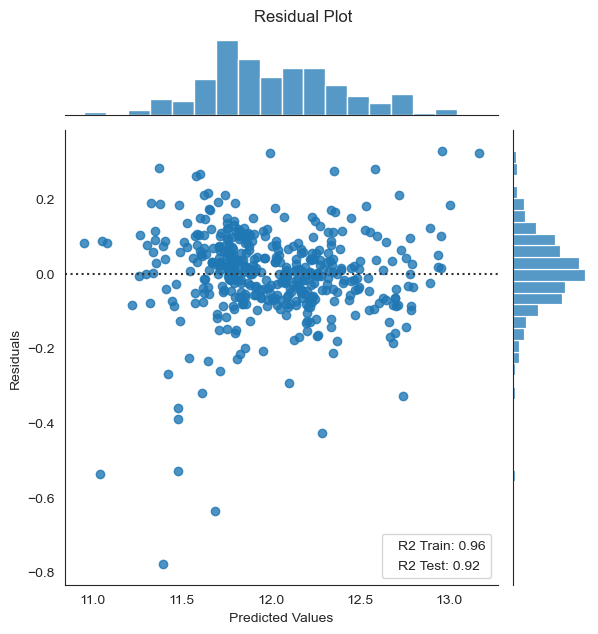

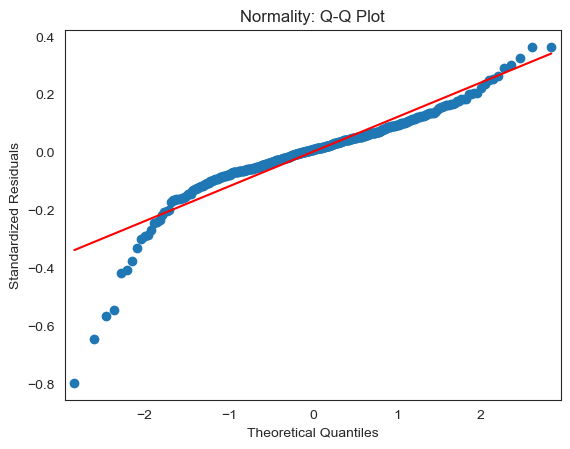

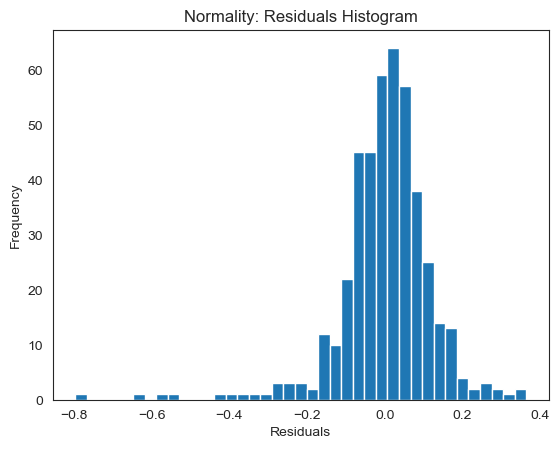

Shapiro-Wilk Test:
Test Statistic: 0.8848711252212524
p-value: 1.4238790933828524e-17
The residuals do not appear to be normally distributed (reject H0)


In [249]:
residual_plot(y_val, simple_avg_model, r2_train=r2_train_simple_avg_model, r2_test=r2_simple_avg_model)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

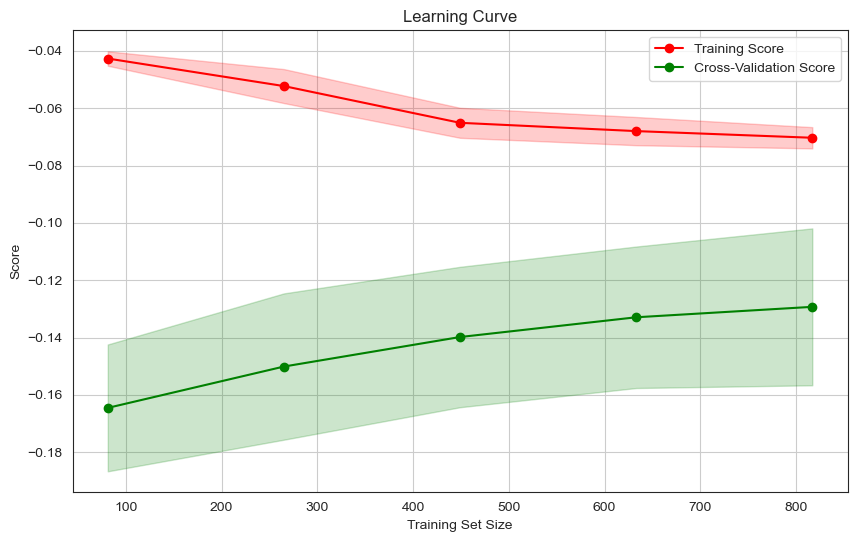

In [253]:
plot_learning_curve(pipe_simple_avg_model, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Voting Regressor with Weight

In [234]:
# Create the voting Regressor within a Pipeline
weights = [0.1, 0.2, 0.4, 0.3] 

pipe_voting_weight_reg = make_pipeline(
    VotingRegressor(estimators=[('lr', model1), 
#                                 ('svr', model2), 
                                ('gb', model3),
                                ('lgb', model4),
                                ('lasso', model5)
                               ], weights=weights)
)

# Fit the voting Regressor with Weight Pipeline to your training data
# voting_weight_regressor_pipeline.fit(X_train, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_voting_weight_reg, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

RMSE: 0.12 +/- 0.01


In [236]:
evaluation_metrics = {}

pipe_voting_weight_reg.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
voting_weight_reg_pred = pipe_voting_weight_reg.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_voting_weight_reg = pipe_voting_weight_reg.score(X_train_val, y_train_val)

# Compute the evaluation metrics
mae_voting_weight_reg, mse_voting_weight_reg, rmse_voting_weight_reg, r2_voting_weight_reg, rmsle_voting_weight_reg, mape_voting_weight_reg = evaluate_model(voting_weight_reg_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "voting_weight_reg"
evaluation_metrics['MAE'] = f'{mae_voting_weight_reg:.6f}'
evaluation_metrics['MSE'] = f'{mse_voting_weight_reg:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_voting_weight_reg:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_voting_weight_reg:.6f}'
evaluation_metrics['R2'] = f'{r2_voting_weight_reg:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_voting_weight_reg:.6f}'
evaluation_metrics['MAPE'] = f'{mape_voting_weight_reg:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: voting_weight_reg
MAE: 14243.532435
MSE: 586095013.113684
RMSE: 24209.399272
R2_train: 0.965438
R2: 0.916009
RMSLE: 0.119604
MAPE: 8.272781


In [238]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_voting_weight_reg, mse_voting_weight_reg, rmse_voting_weight_reg, r2_voting_weight_reg, rmsle_voting_weight_reg, mape_voting_weight_reg = evaluate_model_log(voting_weight_reg_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "voting_weight_reg"
evaluation_metrics_log['MAE'] = f'{mae_voting_weight_reg:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_voting_weight_reg:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_voting_weight_reg:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_voting_weight_reg:.6f}'
evaluation_metrics_log['R2'] = f'{r2_voting_weight_reg:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_voting_weight_reg:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_voting_weight_reg:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: voting_weight_reg
MAE: 0.079965
MSE: 0.014305
RMSE: 0.119604
R2_train: 0.965438
R2: 0.915676
RMSLE: 0.009405
MAPE: 0.671802


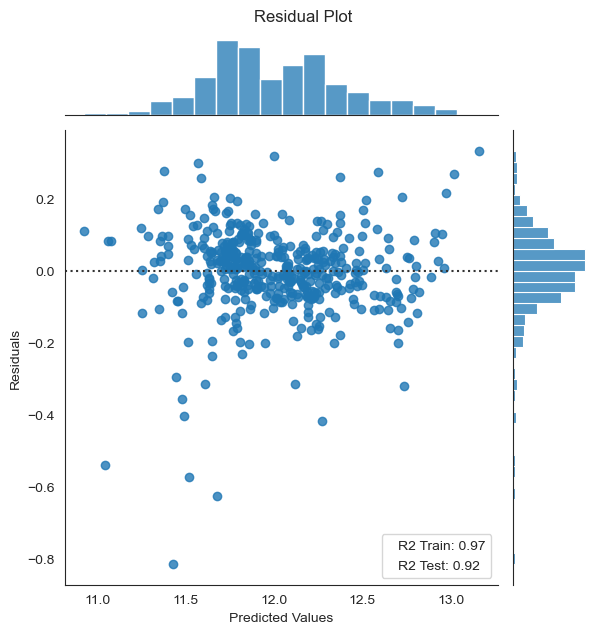

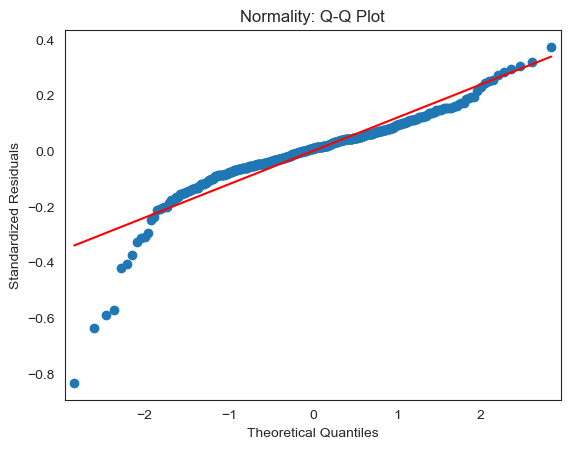

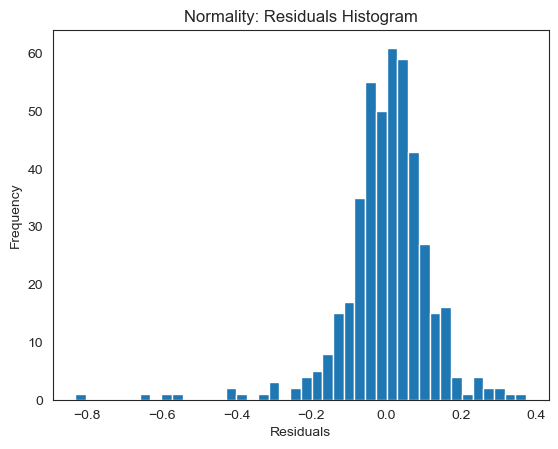

Shapiro-Wilk Test:
Test Statistic: 0.8749328255653381
p-value: 2.5639643886405512e-18
The residuals do not appear to be normally distributed (reject H0)


In [239]:
residual_plot(y_val, voting_weight_reg_pred, r2_train=r2_train_voting_weight_reg, r2_test=r2_voting_weight_reg)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

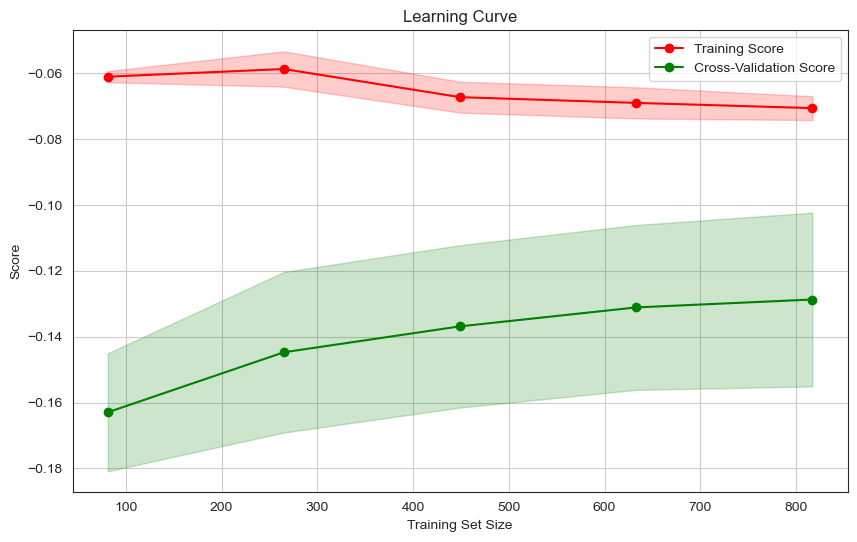

In [240]:
plot_learning_curve(pipe_voting_weight_reg, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Weighted Average Model

In [242]:
class WeightedAveragingModel:
    def __init__(self, models, weights):
        self.models = models
        self.weights = weights
    
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models])
        weighted_predictions = np.average(predictions, axis=1, weights=self.weights)
        return weighted_predictions

In [244]:
%%time

# Create the list of models
models = [model1, model3, model4, model5]

# Define the weights for each model
weights = [0.1, 0.2, 0.4, 0.3] 

# Create the weighted Averaging Model pipeline
pipe_weighted_avg_model = Pipeline([
    ('averaging', WeightedAveragingModel(models, weights))
])

# Fit the stacking Regressor Pipeline to your training data
# pipe_weighted_avg_model.fit(X_train, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_weighted_avg_model, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

RMSE: 0.13 +/- 0.01
CPU times: total: 26 s
Wall time: 38.1 s


In [245]:
evaluation_metrics = {}

pipe_weighted_avg_model.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
weighted_avg_model_pred = pipe_weighted_avg_model.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_weighted_avg_model = r2_score(y_train_val, pipe_weighted_avg_model.predict(X_train_val))

# Compute the evaluation metrics
mae_weighted_avg_model, mse_weighted_avg_model, rmse_weighted_avg_model, r2_weighted_avg_model, rmsle_weighted_avg_model, mape_weighted_avg_model = evaluate_model(weighted_avg_model_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "weighted_avg_model"
evaluation_metrics['MAE'] = f'{mae_weighted_avg_model:.6f}'
evaluation_metrics['MSE'] = f'{mse_weighted_avg_model:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_weighted_avg_model:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_weighted_avg_model:.6f}'
evaluation_metrics['R2'] = f'{r2_weighted_avg_model:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_weighted_avg_model:.6f}'
evaluation_metrics['MAPE'] = f'{mape_weighted_avg_model:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: weighted_avg_model
MAE: 14287.251775
MSE: 596883658.441171
RMSE: 24431.202558
R2_train: 0.965230
R2: 0.914463
RMSLE: 0.120604
MAPE: 8.318540


In [246]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_weighted_avg_model, mse_weighted_avg_model, rmse_weighted_avg_model, r2_weighted_avg_model, rmsle_weighted_avg_model, mape_weighted_avg_model = evaluate_model_log(weighted_avg_model_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "weighted_avg_model"
evaluation_metrics_log['MAE'] = f'{mae_weighted_avg_model:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_weighted_avg_model:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_weighted_avg_model:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_weighted_avg_model:.6f}'
evaluation_metrics_log['R2'] = f'{r2_weighted_avg_model:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_weighted_avg_model:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_weighted_avg_model:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: weighted_avg_model
MAE: 0.080366
MSE: 0.014545
RMSE: 0.120604
R2_train: 0.965230
R2: 0.914259
RMSLE: 0.009486
MAPE: 0.675305


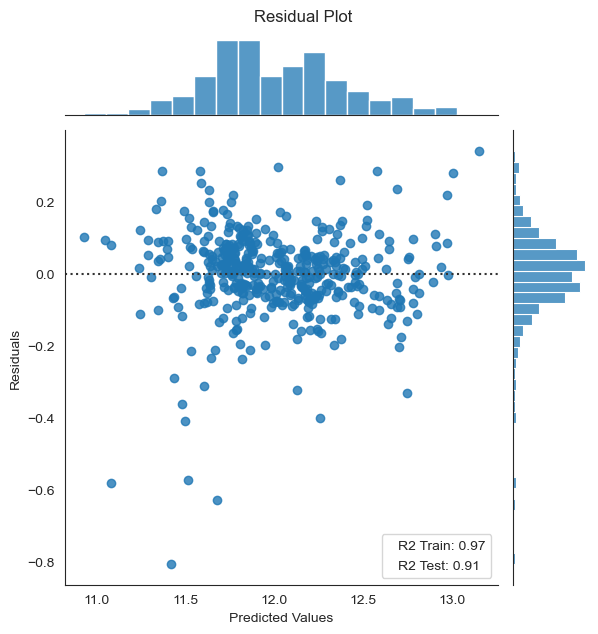

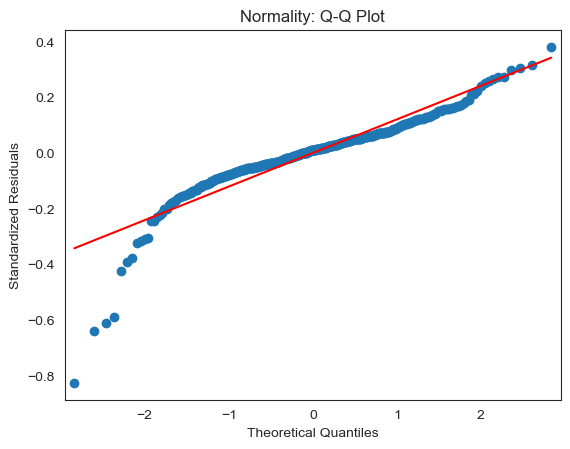

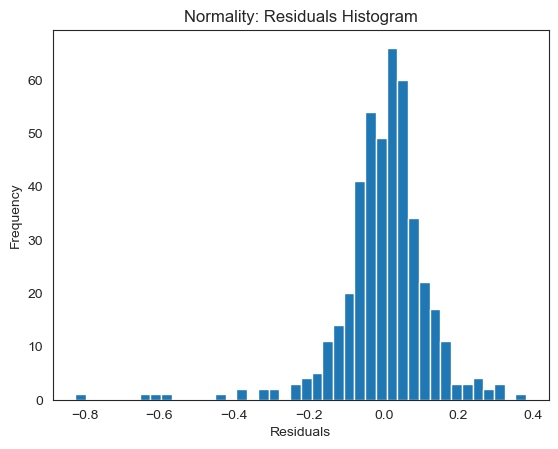

Shapiro-Wilk Test:
Test Statistic: 0.8738939166069031
p-value: 2.1557561330196137e-18
The residuals do not appear to be normally distributed (reject H0)


In [252]:
residual_plot(y_val, weighted_avg_model_pred, r2_train=r2_train_weighted_avg_model, r2_test=r2_weighted_avg_model)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

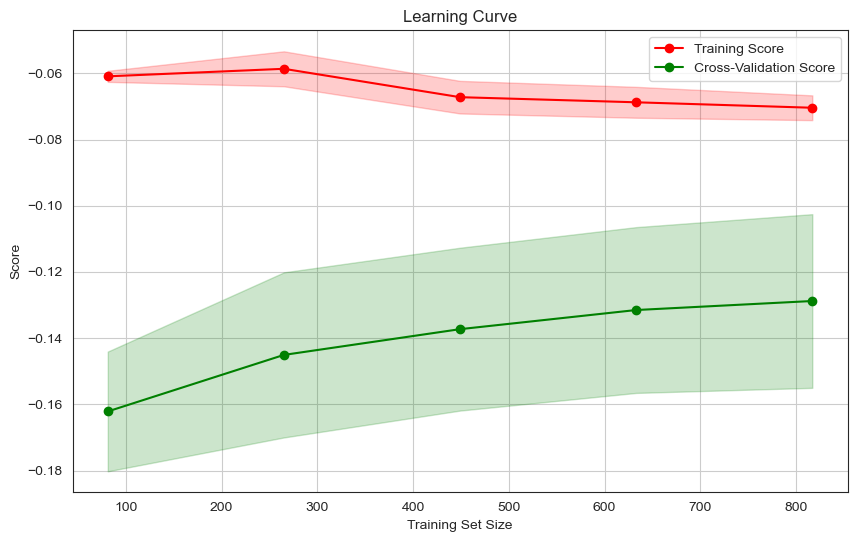

In [254]:
plot_learning_curve(pipe_weighted_avg_model, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Blending Model

In [258]:
class BlendingEnsembleModel(BaseEstimator):
    def __init__(self, models, meta_model):
        self.models = models
        self.meta_model = meta_model
    
    def fit(self, X, y):
        # Split the data into training, validation, and test sets
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Fit the individual base models on the training set
        for model in self.models:
            model.fit(X_train, y_train)
        
        # Generate predictions on the validation set using the base models
        meta_features = []
        for model in self.models:
            predictions = model.predict(X_val)
            meta_features.append(predictions)
        
        # Prepare the validation set predictions as features for the meta-model
        meta_features = np.column_stack(meta_features)
        
        # Train the meta-model on the validation set predictions
        self.meta_model.fit(meta_features, y_val)
        
        return self
    
    def predict(self, X):
        # Generate predictions on the test set using the base models
        meta_features = []
        for model in self.models:
            predictions = model.predict(X)
            meta_features.append(predictions)
        
        # Prepare the test set predictions as features for the meta-model
        meta_features = np.column_stack(meta_features)
        
        # Generate final predictions on the test set using the meta-model
        final_predictions = self.meta_model.predict(meta_features)
        
        return final_predictions
    
    def get_params(self, deep=True):
        return {'models': self.models, 'meta_model': self.meta_model}
    
    def set_params(self, **params):
        if 'models' in params:
            self.models = params['models']
        if 'meta_model' in params:
            self.meta_model = params['meta_model']
        return self


In [268]:
%%time

models=[model1, model3, model4, model5]

# Create an instance of the BlendingEnsembleModel
pipe_blending_model = BlendingEnsembleModel(models=models, 
                                       meta_model=LinearRegression())

# Fit the blending ensemble model Pipeline to your training data
# pipe_blending_model.fit(X_train, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_blending_model, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

RMSE: 0.13 +/- 0.01
CPU times: total: 25.9 s
Wall time: 36.3 s


In [269]:
evaluation_metrics = {}

pipe_blending_model.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
blending_model_pred = pipe_blending_model.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_blending_model = r2_score(y_train_val, pipe_blending_model.predict(X_train_val))

# Compute the evaluation metrics
mae_blending_model, mse_blending_model, rmse_blending_model, r2_blending_model, rmsle_blending_model, mape_blending_model = evaluate_model(blending_model_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "blending_model"
evaluation_metrics['MAE'] = f'{mae_blending_model:.6f}'
evaluation_metrics['MSE'] = f'{mse_blending_model:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_blending_model:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_blending_model:.6f}'
evaluation_metrics['R2'] = f'{r2_blending_model:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_blending_model:.6f}'
evaluation_metrics['MAPE'] = f'{mape_blending_model:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: blending_model
MAE: 14777.697601
MSE: 548369860.957602
RMSE: 23417.298327
R2_train: 0.946151
R2: 0.921416
RMSLE: 0.121721
MAPE: 8.718836


In [270]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_blending_model, mse_blending_model, rmse_blending_model, r2_blending_model, rmsle_blending_model, mape_blending_model = evaluate_model_log(blending_model_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "blending_model"
evaluation_metrics_log['MAE'] = f'{mae_blending_model:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_blending_model:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_blending_model:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_blending_model:.6f}'
evaluation_metrics_log['R2'] = f'{r2_blending_model:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_blending_model:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_blending_model:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: blending_model
MAE: 0.084670
MSE: 0.014816
RMSE: 0.121721
R2_train: 0.946151
R2: 0.912665
RMSLE: 0.009576
MAPE: 0.711798


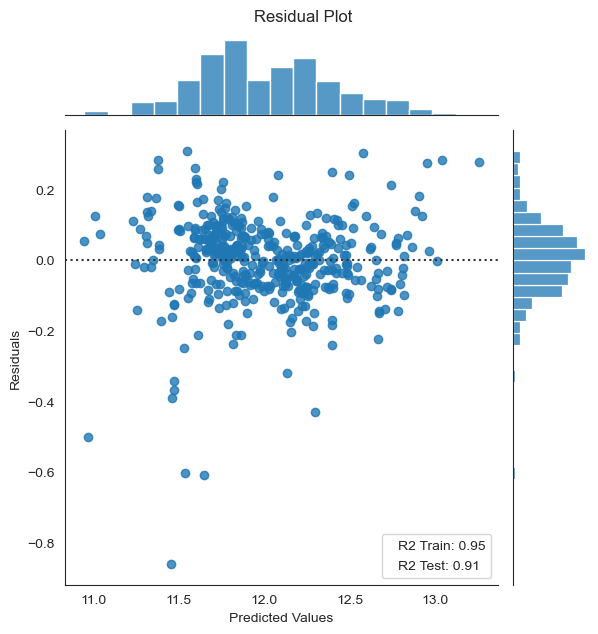

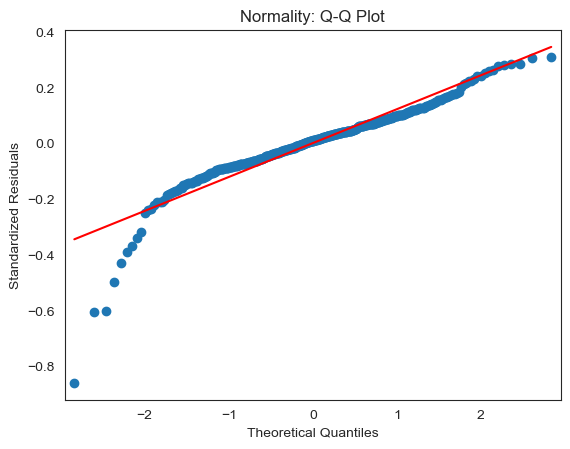

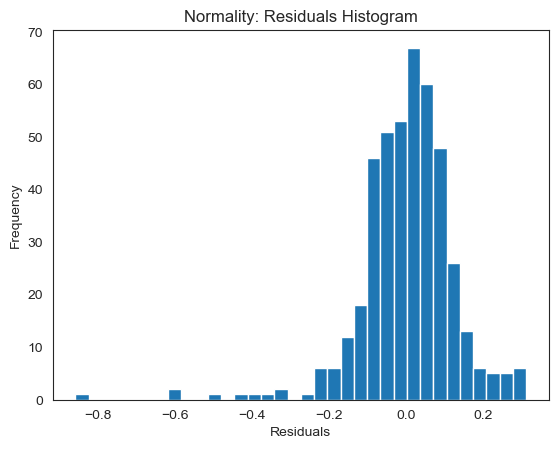

Shapiro-Wilk Test:
Test Statistic: 0.8967283964157104
p-value: 1.2746089586300648e-16
The residuals do not appear to be normally distributed (reject H0)


In [271]:
residual_plot(y_val, blending_model_pred, r2_train=r2_train_blending_model, r2_test=r2_blending_model)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

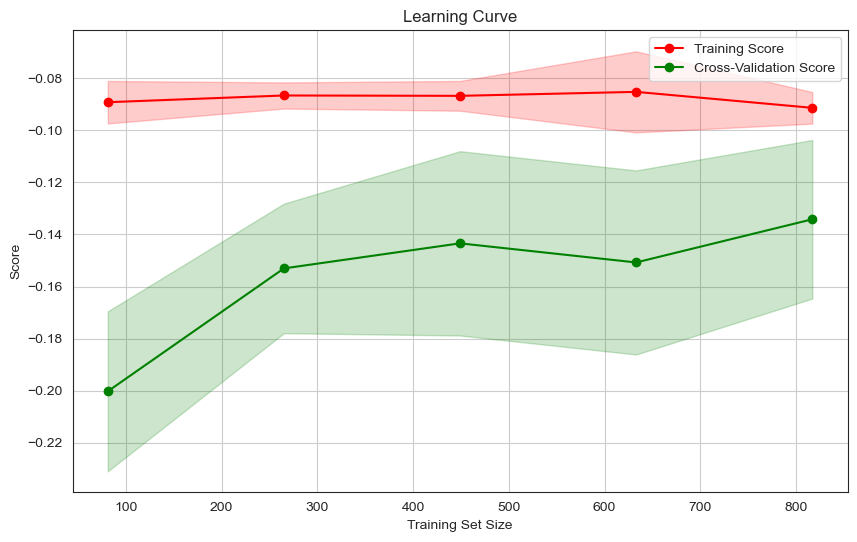

In [272]:
plot_learning_curve(pipe_blending_model, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

# Comparison Model

. Here's a brief explanation of each metric:

- Mean Absolute Error (MAE): MAE represents the average absolute difference between the predicted values and the true values. It provides a measure of the average magnitude of errors without considering their direction. Lower values indicate better performance.

- Mean Squared Error (MSE): MSE calculates the average squared difference between the predicted values and the true values. It amplifies larger errors due to the squaring operation. Like MAE, lower values indicate better performance.

- Root Mean Squared Error (RMSE): RMSE is the square root of MSE and represents the average magnitude of the prediction errors in the same units as the target variable. It is commonly used as a more interpretable measure of the model's prediction error. Again, lower values indicate better performance.

- R2 (R-squared): R2 measures the proportion of the variance in the target variable that is explained by the model. It ranges from 0 to 1, where 1 indicates a perfect fit. Higher values of R2 indicate better performance, with values close to 1 indicating that the model explains a large portion of the variance.

- R2_train: This is R2 calculated on the training data. It represents how well the model fits the training data and can be used to assess the model's training performance. It is important to also evaluate the model's performance on separate validation or test data to assess its generalization capability.

- RMSLE (Root Mean Squared Logarithmic Error): RMSLE is similar to RMSE, but it calculates the root mean squared logarithmic difference between the predicted and true values. It is commonly used when the target variable has a skewed distribution or when relative errors are more important than absolute errors.

- MAPE (Mean Absolute Percentage Error): MAPE measures the average percentage difference between the predicted and true values. It is commonly used when the relative errors are more important than absolute errors. Lower values of MAPE indicate better performance.

These metrics help assess different aspects of a regression model's performance, such as the average magnitude of errors, the proportion of explained variance, and the relative accuracy of predictions. The choice of which metrics to use depends on the specific problem, the nature of the target variable, and the evaluation criteria that are most relevant to your application.

In [273]:
models = pd.DataFrame(evaluation_metrics_models)
columns_to_convert = ['MAE', 'MSE', 'RMSE', 'R2_train', 'R2', 'RMSLE', 'MAPE']
models[columns_to_convert] = models[columns_to_convert].astype(float)
models.sort_values(by="RMSE", ascending=True).reset_index(drop=True)

model           MAE           MSE          RMSE  R2_train  \
0       blending_model  14777.697601  5.483699e+08  23417.298327  0.946151   
1         stacking_reg  14333.952065  5.693623e+08  23861.314513  0.970376   
2    voting_weight_reg  14243.532435  5.860950e+08  24209.399272  0.965438   
3   weighted_avg_model  14287.251775  5.968837e+08  24431.202558  0.965230   
4     simple_avg_model  14372.363427  6.026755e+08  24549.449185  0.964455   
5           voting_reg  14478.220559  6.164735e+08  24828.885000  0.964984   
6              lgbm_ts  15289.557725  6.403976e+08  25306.079200  0.904379   
7             lasso_tf  15004.902130  6.533989e+08  25561.669103  0.909595   
8                gb_ts  14711.564708  6.535961e+08  25565.524649  0.908655   
9             lasso_ts  14964.418464  6.536542e+08  25566.661579  0.908908   
10              krr_ts  15958.894849  6.652185e+08  25791.830289  0.908133   
11             lgbm_tf  15552.262857  6.727206e+08  25936.858089  0.898872   
12             enet_ts  15371.843383  6.727691e+08  25937.791971  0.908085   
13             enet_tf  15355.301729  6.733079e+08  25948.176993  0.908541   
14              krr_tf  15979.113893  6.747058e+08  25975.099820  0.907669   
15               gb_tf  15486.240980  6.825131e+08  26124.951612  0.901779   
16              xgb_ts  15843.141526  6.917188e+08  26300.548255  0.895524   
17              xgb_tf  16259.966859  7.299902e+08  27018.330792  0.894828   
18              svr_tf  16039.905345  7.793693e+08  27917.187347  0.895046   
19              svr_ts  16157.628991  7.801263e+08  27930.741715  0.895738   
20         enet_ts_pca  17403.720029  8.114838e+08  28486.555183  0.888388   
21        lasso_ts_pca  17477.135453  8.283559e+08  28781.172723  0.886016   
22          krr_ts_pca  18004.397594  8.292831e+08  28797.276345  0.886385   
23          xgb_ts_pca  18195.930936  8.361748e+08  28916.686927  0.878049   
24       linreg_ts_pca  18570.775689  8.811267e+08  29683.778970  0.919179   
25         lgbm_ts_pca  17859.013902  8.861940e+08  29769.010941  0.883800   
26          svr_ts_pca  17558.898312  9.240624e+08  30398.393893  0.883963   
27           gb_ts_pca  19103.706056  9.570824e+08  30936.747973  0.861572   
28              knn_tf  20936.444033  1.275145e+09  35709.170953  0.833677   
29              knn_ts  20962.374151  1.317361e+09  36295.474499  0.831794   
30          knn_ts_pca  22689.307824  1.516043e+09  38936.391994  0.819419   

          R2     RMSLE       MAPE  \
0   0.921416  0.121721   8.718836   
1   0.918407  0.119886   8.376692   
2   0.916009  0.119604   8.272781   
3   0.914463  0.120604   8.318540   
4   0.913633  0.119668   8.332512   
5   0.911656  0.120918   8.400106   
6   0.908227  0.127364   8.914480   
7   0.906364  0.123841   8.697935   
8   0.906336  0.124483   8.537417   
9   0.906328  0.124311   8.682107   
10  0.904670  0.124838   9.115562   
11  0.903595  0.130980   9.064613   
12  0.903588  0.124871   8.833332   
13  0.903511  0.124561   8.828868   
14  0.903311  0.125154   9.119008   
15  0.902192  0.129084   8.860164   
16  0.900873  0.133131   9.204923   
17  0.895388  0.133573   9.455468   
18  0.888312  0.133435   9.315092   
19  0.888204  0.132994   9.350080   
20  0.883710  0.137602  10.005786   
21  0.881292  0.139056  10.040552   
22  0.881159  0.138831  10.316520   
23  0.880171  0.143834  10.507479   
24  0.873730  0.143331  10.637767   
25  0.873003  0.140402  10.208160   
26  0.867577  0.140303  10.058623   
27  0.862845  0.153243  11.208545   
28  0.817265  0.167975  11.681451   
29  0.811215  0.168924  11.693259   
30  0.782743  0.175027  12.534370   

                                         best_params_  
0                                                 NaN  
1                                                 NaN  
2                                                 NaN  
3                                                 NaN  
4                                                 NaN  

In [274]:
models_log = pd.DataFrame(evaluation_metrics_log_models)
columns_to_convert = ['MAE', 'MSE', 'RMSE', 'R2_train', 'R2', 'RMSLE', 'MAPE']
models_log[columns_to_convert] = models_log[columns_to_convert].astype(float)
models_log.sort_values(by="RMSE", ascending=True).reset_index(drop=True)

model           MAE           MSE          RMSE  R2_train  \
0    voting_weight_reg  7.996500e-02  1.430500e-02  1.196040e-01  0.965438   
1     simple_avg_model  8.078200e-02  1.432000e-02  1.196680e-01  0.964455   
2         stacking_reg  8.116000e-02  1.437300e-02  1.198860e-01  0.970376   
3           voting_reg  8.138700e-02  1.453600e-02  1.205670e-01  0.964529   
4   weighted_avg_model  8.036600e-02  1.454500e-02  1.206040e-01  0.965230   
5       blending_model  8.467000e-02  1.481600e-02  1.217210e-01  0.946151   
6             lasso_tf  8.406200e-02  1.533700e-02  1.238410e-01  0.909595   
7             lasso_ts  8.382300e-02  1.545300e-02  1.243110e-01  0.908908   
8                gb_ts  8.243100e-02  1.549600e-02  1.244830e-01  0.908655   
9              enet_tf  8.552400e-02  1.551500e-02  1.245610e-01  0.908541   
10              krr_ts  8.907400e-02  1.558500e-02  1.248380e-01  0.908133   
11             enet_ts  8.551900e-02  1.559300e-02  1.248710e-01  0.908085   
12              krr_tf  8.912700e-02  1.566300e-02  1.251540e-01  0.907669   
13             lgbm_ts  8.606100e-02  1.622200e-02  1.273640e-01  0.904379   
14               gb_tf  8.561300e-02  1.666300e-02  1.290840e-01  0.901779   
15             lgbm_tf  8.726500e-02  1.715600e-02  1.309800e-01  0.898872   
16              svr_ts  9.076200e-02  1.768700e-02  1.329940e-01  0.895738   
17              xgb_ts  8.907400e-02  1.772400e-02  1.331310e-01  0.895524   
18              svr_tf  9.020800e-02  1.780500e-02  1.334350e-01  0.895046   
19              xgb_tf  9.070700e-02  1.784200e-02  1.335730e-01  0.894828   
20         enet_ts_pca  9.734900e-02  1.893400e-02  1.376020e-01  0.888388   
21          krr_ts_pca  1.013090e-01  1.927400e-02  1.388310e-01  0.886385   
22        lasso_ts_pca  9.747000e-02  1.933700e-02  1.390560e-01  0.886016   
23          svr_ts_pca  9.734200e-02  1.968500e-02  1.403030e-01  0.883963   
24         lgbm_ts_pca  9.945300e-02  1.971300e-02  1.404020e-01  0.883800   
25       linreg_ts_pca  1.044280e-01  2.054400e-02  1.433310e-01  0.919179   
26          xgb_ts_pca  1.019620e-01  2.068800e-02  1.438340e-01  0.878049   
27           gb_ts_pca  1.067750e-01  2.348400e-02  1.532430e-01  0.861572   
28              knn_tf  1.137250e-01  2.821600e-02  1.679750e-01  0.833677   
29              knn_ts  1.138380e-01  2.853500e-02  1.689240e-01  0.831794   
30          knn_ts_pca  1.222190e-01  3.063500e-02  1.750270e-01  0.819419   
31           linreg_tf  5.586611e+07  3.523698e+17  5.936075e+08  0.930484   

              R2     RMSLE          MAPE  \
0   9.156760e-01  0.009405  6.718020e-01   
1   9.155850e-01  0.009398  6.784720e-01   
2   9.152770e-01  0.009427  6.820480e-01   
3   9.143130e-01  0.009468  6.836440e-01   
4   9.142590e-01  0.009486  6.753050e-01   
5   9.126650e-01  0.009576  7.117980e-01   
6   9.095950e-01  0.009719  7.058820e-01   
7   9.089080e-01  0.009760  7.039590e-01   
8   9.086550e-01  0.009759  6.923120e-01   
9   9.085410e-01  0.009768  7.176580e-01   
10  9.081330e-01  0.009738  7.463820e-01   
11  9.080850e-01  0.009795  7.176100e-01   
12  9.076690e-01  0.009759  7.468090e-01   
13  9.043790e-01  0.010013  7.230450e-01   
14  9.017790e-01  0.010114  7.180780e-01   
15  8.988720e-01  0.010298  7.332600e-01   
16  8.957380e-01  0.010428  7.619290e-01   
17  8.955240e-01  0.010454  7.480480e-01   
18  8.950460e-01  0.010474  7.575930e-01   
19  8.948280e-01  0.010485  7.615350e-01   
20  8.883880e-01  0.010757  8.161720e-01   
21  8.863850e-01  0.010806  8.485570e-01   
22  8.860160e-01  0.010886  8.173670e-01   
23  8.839630e-01  0.010971  8.163850e-01   
24  8.838000e-01  0.010973  8.338310e-01   
25  8.789010e-01  0.011138  8.742610e-01   
26  8.780490e-01  0.011259  8.552220e-01   
27  8.615720e-01  0.011988  8.962880e-01   
28  8.336770e-01  0.013103  9.506160e-01   
29  8.317940e-01  0.013170  9.516570e-01   
30  8.194190e-01  0.013595  1.020644e+00   
31 -2.077114e+18  1.787867  4.7155

In [267]:
evaluation_metrics_log_models = evaluation_metrics_log_models[:-1]
evaluation_metrics_log_models

[{'model': 'linreg_tf',
  'MAE': '55866114.461174',
  'MSE': '352369809976990336.000000',
  'RMSE': '593607454.448637',
  'R2_train': '0.930484',
  'R2': '-2077114021186789376.000000',
  'RMSLE': '1.787867',
  'MAPE': '471556347.781795'},
 {'model': 'linreg_ts_pca',
  'MAE': '0.104428',
  'MSE': '0.020544',
  'RMSE': '0.143331',
  'R2_train': '0.919179',
  'R2': '0.878901',
  'RMSLE': '0.011138',
  'MAPE': '0.874261'},
 {'model': 'lasso_tf',
  'best_params_': {'lasso__alpha': 0.001},
  'MAE': '0.084062',
  'MSE': '0.015337',
  'RMSE': '0.123841',
  'R2_train': '0.909595',
  'R2': '0.909595',
  'RMSLE': '0.009719',
  'MAPE': '0.705882'},
 {'model': 'lasso_ts',
  'best_params_': {'lasso__alpha': 0.001},
  'MAE': '0.083823',
  'MSE': '0.015453',
  'RMSE': '0.124311',
  'R2_train': '0.908908',
  'R2': '0.908908',
  'RMSLE': '0.009760',
  'MAPE': '0.703959'},
 {'model': 'lasso_ts_pca',
  'best_params_': {'lasso__alpha': 0.001},
  'MAE': '0.097470',
  'MSE': '0.019337',
  'RMSE': '0.139056',

In [179]:
models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         27 non-null     object 
 1   MAE           27 non-null     float64
 2   MSE           27 non-null     float64
 3   RMSE          27 non-null     float64
 4   R2_train      27 non-null     float64
 5   R2            27 non-null     float64
 6   RMSLE         27 non-null     float64
 7   MAPE          27 non-null     float64
 8   best_params_  24 non-null     object 
dtypes: float64(7), object(2)
memory usage: 2.0+ KB


In [223]:
evaluation_metrics_models

[{'model': 'linreg_ts_pca',
  'MAE': '18570.775689',
  'MSE': '881126733.911360',
  'RMSE': '29683.778970',
  'R2_train': '0.919179',
  'R2': '0.873730',
  'RMSLE': '0.143331',
  'MAPE': '10.637767'},
 {'model': 'lasso_tf',
  'best_params_': {'lasso__alpha': 0.001},
  'MAE': '15004.902130',
  'MSE': '653398927.332075',
  'RMSE': '25561.669103',
  'R2_train': '0.909595',
  'R2': '0.906364',
  'RMSLE': '0.123841',
  'MAPE': '8.697935'},
 {'model': 'lasso_ts',
  'best_params_': {'lasso__alpha': 0.001},
  'MAE': '14964.418464',
  'MSE': '653654184.301026',
  'RMSE': '25566.661579',
  'R2_train': '0.908908',
  'R2': '0.906328',
  'RMSLE': '0.124311',
  'MAPE': '8.682107'},
 {'model': 'lasso_ts_pca',
  'best_params_': {'lasso__alpha': 0.001},
  'MAE': '17477.135453',
  'MSE': '828355903.292463',
  'RMSE': '28781.172723',
  'R2_train': '0.886016',
  'R2': '0.881292',
  'RMSLE': '0.139056',
  'MAPE': '10.040552'},
 {'model': 'krr_tf',
  'best_params_': {'krr__alpha': 0.1,
   'krr__degree': 1,


In [276]:
models.to_csv("Comparison-model-result.csv", index=False)
models_log.to_csv("Comparison-ylog-model-result.csv", index=False)

In [ ]:
np.expm1(0.2)

In [ ]:
np.log1p(24170.630541)

In [219]:
models = models[models["model"] == "simple_avg_model"]